## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

Site #        S_m2    WGS84 N   WGS 84 E Origin Dominant_specias  \
0      1  500.343869  51.435741  30.107979      n            Birch   
1      2   99.932806  51.434093  30.108523      a             Pine   
2      3   99.932806  51.434163  30.109196      a             Pine   
3      4  500.343869  51.434217  30.110484      a             Pine   
4      5  249.965218  51.434056  30.111980      a             Pine   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ln_Sr_wood  ...  idm_g_Q25  \
0            920       6.824          10300       9.240  ...   0.042167   
1           3600       8.189          15100       9.622  ...   0.040919   
2           4360       8.380          14600       9.589  ...   0.042397   
3           3420       8.137          12700       9.449  ...   0.043719   
4           2200       7.696          12100       9.401  ...   0.040659   

   idm_g_Q50  idm_g_Q75  idm_b_MIN idm_b_MAX  idm_b_MEAN  idm_b_STD  \
0   0.050549   0.062270   0.017730  0.408966    0.059749   0.030217   
1   0.048889   0.060698   0.020078  0.258602    0.057223   0.025515   
2   0.050463   0.060603   0.020761  0.156265    0.056571   0.016629   
3   0.052974   0.066027   0.017239  0.327465    0.060880   0.023964   
4   0.049303   0.061803   0.014276  0.274420    0.057902   0.024283   

   idm_b_Q25  idm_b_Q50  idm_b_Q75  
0   0.043539   0.052312   0.064544  
1   0.043035   0.050941   0.062608  
2   0.045142   0.053495   0.064635  
3   0.046111   0.055601   0.069182  
4   0.043045   0.051566   0.065078  

[5 rows x 164 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0        4.771            1.792                -0.211            -0.261   
1        5.808            2.496                -0.073             0.392   
2        5.796            2.546                 0.030             0.501   
3        5.826            2.643                 0.000             0.419   
4        6.059            2.643                 0.122             0.647   

   ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  g_MAX  \
0              -2.040          1.932     0.85    12.233545   19.097736    243   
1              -0.139          2.674     1.00    14.964220   17.704655    248   
2              -0.030          2.734     1.00    15.329449   17.559893    240   
3              -0.431          2.785     0.97    15.392742   20.676994    244   
4              -0.386          2.809     1.00    17.944009   21.851387    243   

   contr_g_MAX  
0  2961.898193  
1  2218.239746  
2  2220.297119  
3  3033.770752  
4  3003.818848

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
count   103.000000       103.000000            103.000000        103.000000   
mean      4.981961         1.863184             -0.327942         -0.063369   
std       1.264300         1.198731              0.866380          0.795365   
min       1.609000        -1.347000             -2.659000         -2.408000   
25%       4.677000         1.584500             -0.554000         -0.386500   
50%       5.342000         2.294000             -0.051000          0.182000   
75%       5.875000         2.663000              0.207000          0.495000   
max       6.457000         3.428000              1.384000          1.756000   

       ln_M_foliage_kg_m2  ln_M_AG_kg_m2     %_cover  mf_chm_MEAN  mf_chm_MAX  \
count          103.000000     103.000000  103.000000   103.000000  103.000000   
mean            -1.015971       2.086126    0.808738    13.045021   17.907784   
std              0.799205       1.067542    0.276653     6.609366    7.523377   
min             -3.507000      -0.693000    0.090000     1.293138    2.733019   
25%             -1.609000       1.758000    0.745000     8.206727   11.615798   
50%             -0.844000       2.442000    0.960000    13.072916   18.269344   
75%             -0.364000       2.809000    1.000000    17.432255   22.751595   
max              0.157000       3.515000    1.000000    28.916548   36.355442   

            g_MAX  contr_g_MAX  
count  103.000000   103.000000  
mean   240.572816  3008.938899  
std      9.358442   876.023529  
min    194.000000   815.342712  
25%    236.500000  2464.687256  
50%    243.000000  2994.793701  
75%    247.000000  3464.970947  
max    253.000000  6230.940918

# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_foliage_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  \

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

%_cover  mf_chm_MEAN  mf_chm_MAX  g_MAX  contr_g_MAX
0     0.85    12.233545   19.097736    243  2961.898193
1     1.00    14.964220   17.704655    248  2218.239746
2     1.00    15.329449   17.559893    240  2220.297119
3     0.97    15.392742   20.676994    244  3033.770752
4     1.00    17.944009   21.851387    243  3003.818848

In [11]:
# Columns in "y" data collections
y.head()

ln_M_foliage_kg_m2
0              -2.040
1              -0.139
2              -0.030
3              -0.431
4              -0.386

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.13656354852628427, 0.483533588123773, 0.5334366437459974]
    Mean: 0.385
    Std: 0.177

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.70641485 0.72138606 0.51063792]
    Mean: 0.646
    Std: 0.096

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5150360778808594, 0.511330657914281, 0.47297338302696446]
    Mean: 0.500
    Std: 0.019

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6164078606364067                    # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.46457263110215186                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.026157819305236585                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 151          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.458494354105843                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6164078606364067
Gamma: 0.46457263110215186
Learning_rate: 0.026157819305236585
Max_depth: 4
N_estimators: 151
Subsample: 0.458494354105843


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.68138	validation_1-rmse:1.65201
[1]	validation_0-rmse:1.64865	validation_1-rmse:1.62217
[2]	validation_0-rmse:1.61017	validation_1-rmse:1.58436
[3]	validation_0-rmse:1.57447	validation_1-rmse:1.54794


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54012	validation_1-rmse:1.51042
[5]	validation_0-rmse:1.50983	validation_1-rmse:1.47911
[6]	validation_0-rmse:1.47764	validation_1-rmse:1.44644
[7]	validation_0-rmse:1.44854	validation_1-rmse:1.41451
[8]	validation_0-rmse:1.42073	validation_1-rmse:1.38403
[9]	validation_0-rmse:1.39587	validation_1-rmse:1.36144
[10]	validation_0-rmse:1.36924	validation_1-rmse:1.33059
[11]	validation_0-rmse:1.34091	validation_1-rmse:1.30300
[12]	validation_0-rmse:1.31590	validation_1-rmse:1.27301
[13]	validation_0-rmse:1.29291	validation_1-rmse:1.25131
[14]	validation_0-rmse:1.26523	validation_1-rmse:1.22234
[15]	validation_0-rmse:1.24116	validation_1-rmse:1.19695
[16]	validation_0-rmse:1.21673	validation_1-rmse:1.17064
[17]	validation_0-rmse:1.19487	validation_1-rmse:1.15059
[18]	validation_0-rmse:1.17270	validation_1-rmse:1.13055
[19]	validation_0-rmse:1.14899	validation_1-rmse:1.10836
[20]	validation_0-rmse:1.12835	validation_1-rmse:1.09012
[21]	validation_0-rmse:1.10449	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70113	validation_1-rmse:1.57042
[1]	validation_0-rmse:1.66659	validation_1-rmse:1.54137


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.62922	validation_1-rmse:1.51240
[3]	validation_0-rmse:1.59369	validation_1-rmse:1.48423
[4]	validation_0-rmse:1.56135	validation_1-rmse:1.45508
[5]	validation_0-rmse:1.52677	validation_1-rmse:1.42692
[6]	validation_0-rmse:1.49520	validation_1-rmse:1.40307
[7]	validation_0-rmse:1.47042	validation_1-rmse:1.37876
[8]	validation_0-rmse:1.44167	validation_1-rmse:1.35104
[9]	validation_0-rmse:1.41450	validation_1-rmse:1.32758
[10]	validation_0-rmse:1.38979	validation_1-rmse:1.30765
[11]	validation_0-rmse:1.36243	validation_1-rmse:1.28667
[12]	validation_0-rmse:1.33839	validation_1-rmse:1.26695
[13]	validation_0-rmse:1.31478	validation_1-rmse:1.24334
[14]	validation_0-rmse:1.28742	validation_1-rmse:1.21983
[15]	validation_0-rmse:1.26187	validation_1-rmse:1.20099
[16]	validation_0-rmse:1.23676	validation_1-rmse:1.18246
[17]	validation_0-rmse:1.21285	validation_1-rmse:1.16178
[18]	validation_0-rmse:1.19201	validation_1-rmse:1.14538
[19]	validation_0-rmse:1.16942	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67273	validation_1-rmse:1.69013
[1]	validation_0-rmse:1.63855	validation_1-rmse:1.65562
[2]	validation_0-rmse:1.60151	validation_1-rmse:1.61515
[3]	validation_0-rmse:1.56596	validation_1-rmse:1.57689
[4]	validation_0-rmse:1.53440	validation_1-rmse:1.54434
[5]	validation_0-rmse:1.50252	validation_1-rmse:1.51263
[6]	validation_0-rmse:1.46980	validation_1-rmse:1.48035
[7]	validation_0-rmse:1.44103	validation_1-rmse:1.45218
[8]	validation_0-rmse:1.41461	validation_1-rmse:1.42737
[9]	validation_0-rmse:1.38922	validation_1-rmse:1.39995
[10]	validation_0-rmse:1.36059	validation_1-rmse:1.37113


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.33655	validation_1-rmse:1.34886
[12]	validation_0-rmse:1.31110	validation_1-rmse:1.32522
[13]	validation_0-rmse:1.28343	validation_1-rmse:1.29653
[14]	validation_0-rmse:1.25941	validation_1-rmse:1.27170
[15]	validation_0-rmse:1.23417	validation_1-rmse:1.24430
[16]	validation_0-rmse:1.21392	validation_1-rmse:1.22280
[17]	validation_0-rmse:1.19029	validation_1-rmse:1.19653
[18]	validation_0-rmse:1.16695	validation_1-rmse:1.17087
[19]	validation_0-rmse:1.14502	validation_1-rmse:1.14615
[20]	validation_0-rmse:1.12390	validation_1-rmse:1.12427
[21]	validation_0-rmse:1.10042	validation_1-rmse:1.09908
[22]	validation_0-rmse:1.07850	validation_1-rmse:1.07391
[23]	validation_0-rmse:1.05949	validation_1-rmse:1.05427
[24]	validation_0-rmse:1.04158	validation_1-rmse:1.03490
[25]	validation_0-rmse:1.02274	validation_1-rmse:1.01385
[26]	validation_0-rmse:1.00347	validation_1-rmse:0.99663
[27]	validation_0-rmse:0.98669	validation_1-rmse:0.98081
[28]	validation_0-rmse:0.96962	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70447	validation_1-rmse:1.57842
[1]	validation_0-rmse:1.67798	validation_1-rmse:1.55165
[2]	validation_0-rmse:1.63945	validation_1-rmse:1.51560
[3]	validation_0-rmse:1.60900	validation_1-rmse:1.48402
[4]	validation_0-rmse:1.57502	validation_1-rmse:1.45073
[5]	validation_0-rmse:1.54590	validation_1-rmse:1.42213


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.51255	validation_1-rmse:1.39033
[7]	validation_0-rmse:1.48583	validation_1-rmse:1.36330
[8]	validation_0-rmse:1.45816	validation_1-rmse:1.33884
[9]	validation_0-rmse:1.43476	validation_1-rmse:1.31540
[10]	validation_0-rmse:1.40853	validation_1-rmse:1.29812
[11]	validation_0-rmse:1.37972	validation_1-rmse:1.27010
[12]	validation_0-rmse:1.35206	validation_1-rmse:1.24648
[13]	validation_0-rmse:1.32612	validation_1-rmse:1.22913
[14]	validation_0-rmse:1.29789	validation_1-rmse:1.20130
[15]	validation_0-rmse:1.27277	validation_1-rmse:1.17622
[16]	validation_0-rmse:1.24897	validation_1-rmse:1.15371
[17]	validation_0-rmse:1.22542	validation_1-rmse:1.13077
[18]	validation_0-rmse:1.20412	validation_1-rmse:1.11268
[19]	validation_0-rmse:1.18092	validation_1-rmse:1.09069
[20]	validation_0-rmse:1.15736	validation_1-rmse:1.07137
[21]	validation_0-rmse:1.13698	validation_1-rmse:1.05337
[22]	validation_0-rmse:1.11486	validation_1-rmse:1.03180
[23]	validation_0-rmse:1.09628	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67301	validation_1-rmse:1.68471
[1]	validation_0-rmse:1.63863	validation_1-rmse:1.64547
[2]	validation_0-rmse:1.60256	validation_1-rmse:1.60711
[3]	validation_0-rmse:1.56610	validation_1-rmse:1.56994
[4]	validation_0-rmse:1.53876	validation_1-rmse:1.54212
[5]	validation_0-rmse:1.50364	validation_1-rmse:1.50757
[6]	validation_0-rmse:1.47409	validation_1-rmse:1.47669
[7]	validation_0-rmse:1.44406	validation_1-rmse:1.44637
[8]	validation_0-rmse:1.41652	validation_1-rmse:1.41592


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38771	validation_1-rmse:1.38373
[10]	validation_0-rmse:1.36119	validation_1-rmse:1.36641
[11]	validation_0-rmse:1.33150	validation_1-rmse:1.33518
[12]	validation_0-rmse:1.30486	validation_1-rmse:1.31396
[13]	validation_0-rmse:1.28029	validation_1-rmse:1.28979
[14]	validation_0-rmse:1.25489	validation_1-rmse:1.26666
[15]	validation_0-rmse:1.22674	validation_1-rmse:1.24000
[16]	validation_0-rmse:1.20034	validation_1-rmse:1.21276
[17]	validation_0-rmse:1.17937	validation_1-rmse:1.19039
[18]	validation_0-rmse:1.15753	validation_1-rmse:1.16721
[19]	validation_0-rmse:1.13513	validation_1-rmse:1.14535
[20]	validation_0-rmse:1.11667	validation_1-rmse:1.12795
[21]	validation_0-rmse:1.09514	validation_1-rmse:1.10471
[22]	validation_0-rmse:1.07832	validation_1-rmse:1.09029
[23]	validation_0-rmse:1.05677	validation_1-rmse:1.06849
[24]	validation_0-rmse:1.04057	validation_1-rmse:1.05305
[25]	validation_0-rmse:1.02202	validation_1-rmse:1.03839
[26]	validation_0-rmse:1.00808	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68648	validation_1-rmse:1.62653
[1]	validation_0-rmse:1.65018	validation_1-rmse:1.59576
[2]	validation_0-rmse:1.61634	validation_1-rmse:1.56454
[3]	validation_0-rmse:1.58230	validation_1-rmse:1.53365
[4]	validation_0-rmse:1.55013	validation_1-rmse:1.50566
[5]	validation_0-rmse:1.51856	validation_1-rmse:1.47643
[6]	validation_0-rmse:1.48564	validation_1-rmse:1.44526
[7]	validation_0-rmse:1.45359	validation_1-rmse:1.42134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.42539	validation_1-rmse:1.39771
[9]	validation_0-rmse:1.39959	validation_1-rmse:1.37515
[10]	validation_0-rmse:1.37301	validation_1-rmse:1.35420
[11]	validation_0-rmse:1.34471	validation_1-rmse:1.32361
[12]	validation_0-rmse:1.31779	validation_1-rmse:1.30358
[13]	validation_0-rmse:1.29306	validation_1-rmse:1.28424
[14]	validation_0-rmse:1.26770	validation_1-rmse:1.26338
[15]	validation_0-rmse:1.24077	validation_1-rmse:1.23837
[16]	validation_0-rmse:1.21654	validation_1-rmse:1.21599
[17]	validation_0-rmse:1.19387	validation_1-rmse:1.19787
[18]	validation_0-rmse:1.17192	validation_1-rmse:1.17950
[19]	validation_0-rmse:1.14581	validation_1-rmse:1.15963
[20]	validation_0-rmse:1.12078	validation_1-rmse:1.13941
[21]	validation_0-rmse:1.10051	validation_1-rmse:1.12270
[22]	validation_0-rmse:1.07816	validation_1-rmse:1.10705
[23]	validation_0-rmse:1.05838	validation_1-rmse:1.08944
[24]	validation_0-rmse:1.03916	validation_1-rmse:1.07147
[25]	validation_0-rmse:1.02299	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68800	validation_1-rmse:1.63112
[1]	validation_0-rmse:1.65287	validation_1-rmse:1.60335
[2]	validation_0-rmse:1.61590	validation_1-rmse:1.57244
[3]	validation_0-rmse:1.58035	validation_1-rmse:1.54153
[4]	validation_0-rmse:1.54553	validation_1-rmse:1.51242
[5]	validation_0-rmse:1.51669	validation_1-rmse:1.48544
[6]	validation_0-rmse:1.48481	validation_1-rmse:1.46138


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.45197	validation_1-rmse:1.43540
[8]	validation_0-rmse:1.42017	validation_1-rmse:1.40975
[9]	validation_0-rmse:1.39114	validation_1-rmse:1.38614
[10]	validation_0-rmse:1.36188	validation_1-rmse:1.36193
[11]	validation_0-rmse:1.33341	validation_1-rmse:1.33807
[12]	validation_0-rmse:1.30732	validation_1-rmse:1.31795
[13]	validation_0-rmse:1.28218	validation_1-rmse:1.29577
[14]	validation_0-rmse:1.25480	validation_1-rmse:1.27348
[15]	validation_0-rmse:1.23224	validation_1-rmse:1.25891
[16]	validation_0-rmse:1.20617	validation_1-rmse:1.23467
[17]	validation_0-rmse:1.18458	validation_1-rmse:1.21767
[18]	validation_0-rmse:1.15822	validation_1-rmse:1.19728
[19]	validation_0-rmse:1.13481	validation_1-rmse:1.18074
[20]	validation_0-rmse:1.11401	validation_1-rmse:1.16465
[21]	validation_0-rmse:1.09413	validation_1-rmse:1.14822
[22]	validation_0-rmse:1.07172	validation_1-rmse:1.13311
[23]	validation_0-rmse:1.05137	validation_1-rmse:1.11795
[24]	validation_0-rmse:1.03377	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62493	validation_1-rmse:1.85720
[1]	validation_0-rmse:1.59548	validation_1-rmse:1.82589
[2]	validation_0-rmse:1.55867	validation_1-rmse:1.78440


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52236	validation_1-rmse:1.74467
[4]	validation_0-rmse:1.49180	validation_1-rmse:1.71185
[5]	validation_0-rmse:1.45988	validation_1-rmse:1.67582
[6]	validation_0-rmse:1.42999	validation_1-rmse:1.64224
[7]	validation_0-rmse:1.39999	validation_1-rmse:1.61165
[8]	validation_0-rmse:1.37527	validation_1-rmse:1.58623
[9]	validation_0-rmse:1.34967	validation_1-rmse:1.55628
[10]	validation_0-rmse:1.32260	validation_1-rmse:1.53223
[11]	validation_0-rmse:1.29938	validation_1-rmse:1.50884
[12]	validation_0-rmse:1.27814	validation_1-rmse:1.48770
[13]	validation_0-rmse:1.25605	validation_1-rmse:1.46451
[14]	validation_0-rmse:1.22762	validation_1-rmse:1.43268
[15]	validation_0-rmse:1.20147	validation_1-rmse:1.40246
[16]	validation_0-rmse:1.17798	validation_1-rmse:1.37476
[17]	validation_0-rmse:1.15670	validation_1-rmse:1.35682
[18]	validation_0-rmse:1.13720	validation_1-rmse:1.33538
[19]	validation_0-rmse:1.11652	validation_1-rmse:1.31533
[20]	validation_0-rmse:1.09624	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68516	validation_1-rmse:1.63789
[1]	validation_0-rmse:1.65471	validation_1-rmse:1.60310
[2]	validation_0-rmse:1.61799	validation_1-rmse:1.56683
[3]	validation_0-rmse:1.58586	validation_1-rmse:1.53246
[4]	validation_0-rmse:1.55443	validation_1-rmse:1.49910
[5]	validation_0-rmse:1.52183	validation_1-rmse:1.46742


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.48630	validation_1-rmse:1.43324
[7]	validation_0-rmse:1.45867	validation_1-rmse:1.40439
[8]	validation_0-rmse:1.42910	validation_1-rmse:1.36843
[9]	validation_0-rmse:1.40271	validation_1-rmse:1.34146
[10]	validation_0-rmse:1.37389	validation_1-rmse:1.31196
[11]	validation_0-rmse:1.34325	validation_1-rmse:1.28075
[12]	validation_0-rmse:1.31498	validation_1-rmse:1.24872
[13]	validation_0-rmse:1.28982	validation_1-rmse:1.22048
[14]	validation_0-rmse:1.26302	validation_1-rmse:1.19274
[15]	validation_0-rmse:1.23895	validation_1-rmse:1.16980
[16]	validation_0-rmse:1.21589	validation_1-rmse:1.14767
[17]	validation_0-rmse:1.19400	validation_1-rmse:1.12473
[18]	validation_0-rmse:1.17386	validation_1-rmse:1.10317
[19]	validation_0-rmse:1.15132	validation_1-rmse:1.08173
[20]	validation_0-rmse:1.12986	validation_1-rmse:1.06448
[21]	validation_0-rmse:1.10612	validation_1-rmse:1.03815
[22]	validation_0-rmse:1.08549	validation_1-rmse:1.01789
[23]	validation_0-rmse:1.06571	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73862	validation_1-rmse:1.39358
[1]	validation_0-rmse:1.70529	validation_1-rmse:1.37036
[2]	validation_0-rmse:1.66769	validation_1-rmse:1.34039
[3]	validation_0-rmse:1.63160	validation_1-rmse:1.30646
[4]	validation_0-rmse:1.59933	validation_1-rmse:1.27737
[5]	validation_0-rmse:1.57105	validation_1-rmse:1.25383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.53801	validation_1-rmse:1.22732
[7]	validation_0-rmse:1.50774	validation_1-rmse:1.19972
[8]	validation_0-rmse:1.47755	validation_1-rmse:1.16909
[9]	validation_0-rmse:1.45033	validation_1-rmse:1.14849
[10]	validation_0-rmse:1.42036	validation_1-rmse:1.12055
[11]	validation_0-rmse:1.39238	validation_1-rmse:1.09736
[12]	validation_0-rmse:1.36606	validation_1-rmse:1.07566
[13]	validation_0-rmse:1.34335	validation_1-rmse:1.04863
[14]	validation_0-rmse:1.31578	validation_1-rmse:1.02472
[15]	validation_0-rmse:1.28740	validation_1-rmse:1.00286
[16]	validation_0-rmse:1.26260	validation_1-rmse:0.98102
[17]	validation_0-rmse:1.23620	validation_1-rmse:0.95702
[18]	validation_0-rmse:1.21456	validation_1-rmse:0.93791
[19]	validation_0-rmse:1.19402	validation_1-rmse:0.92185
[20]	validation_0-rmse:1.17433	validation_1-rmse:0.90703
[21]	validation_0-rmse:1.14961	validation_1-rmse:0.88874
[22]	validation_0-rmse:1.12903	validation_1-rmse:0.87120
[23]	validation_0-rmse:1.10822	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65498	validation_1-rmse:1.75136
[1]	validation_0-rmse:1.62098	validation_1-rmse:1.72174
[2]	validation_0-rmse:1.58857	validation_1-rmse:1.69050
[3]	validation_0-rmse:1.55386	validation_1-rmse:1.65612
[4]	validation_0-rmse:1.52320	validation_1-rmse:1.62542
[5]	validation_0-rmse:1.48893	validation_1-rmse:1.59196
[6]	validation_0-rmse:1.45547	validation_1-rmse:1.56002
[7]	validation_0-rmse:1.42578	validation_1-rmse:1.53221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.39709	validation_1-rmse:1.50535
[9]	validation_0-rmse:1.37341	validation_1-rmse:1.48180
[10]	validation_0-rmse:1.34615	validation_1-rmse:1.45503
[11]	validation_0-rmse:1.32167	validation_1-rmse:1.43194
[12]	validation_0-rmse:1.29809	validation_1-rmse:1.41270
[13]	validation_0-rmse:1.27380	validation_1-rmse:1.39039
[14]	validation_0-rmse:1.25235	validation_1-rmse:1.36778
[15]	validation_0-rmse:1.22728	validation_1-rmse:1.34186
[16]	validation_0-rmse:1.20195	validation_1-rmse:1.31684
[17]	validation_0-rmse:1.17942	validation_1-rmse:1.29685
[18]	validation_0-rmse:1.15405	validation_1-rmse:1.27310
[19]	validation_0-rmse:1.13430	validation_1-rmse:1.25532
[20]	validation_0-rmse:1.11127	validation_1-rmse:1.23477
[21]	validation_0-rmse:1.09379	validation_1-rmse:1.21531
[22]	validation_0-rmse:1.07443	validation_1-rmse:1.19715
[23]	validation_0-rmse:1.05528	validation_1-rmse:1.17952
[24]	validation_0-rmse:1.03805	validation_1-rmse:1.16289
[25]	validation_0-rmse:1.01937	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68747	validation_1-rmse:1.63369
[1]	validation_0-rmse:1.65575	validation_1-rmse:1.60839
[2]	validation_0-rmse:1.62137	validation_1-rmse:1.57428


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59158	validation_1-rmse:1.54274
[4]	validation_0-rmse:1.56034	validation_1-rmse:1.51341
[5]	validation_0-rmse:1.52766	validation_1-rmse:1.48058
[6]	validation_0-rmse:1.49566	validation_1-rmse:1.45577
[7]	validation_0-rmse:1.46718	validation_1-rmse:1.42858
[8]	validation_0-rmse:1.43976	validation_1-rmse:1.40571
[9]	validation_0-rmse:1.41403	validation_1-rmse:1.37945
[10]	validation_0-rmse:1.38654	validation_1-rmse:1.35018
[11]	validation_0-rmse:1.36325	validation_1-rmse:1.33006
[12]	validation_0-rmse:1.33214	validation_1-rmse:1.30481
[13]	validation_0-rmse:1.30678	validation_1-rmse:1.28251
[14]	validation_0-rmse:1.28045	validation_1-rmse:1.25586
[15]	validation_0-rmse:1.25577	validation_1-rmse:1.22988
[16]	validation_0-rmse:1.23320	validation_1-rmse:1.20873
[17]	validation_0-rmse:1.20866	validation_1-rmse:1.18841
[18]	validation_0-rmse:1.18422	validation_1-rmse:1.16287
[19]	validation_0-rmse:1.16036	validation_1-rmse:1.13877
[20]	validation_0-rmse:1.13825	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66689	validation_1-rmse:1.71224
[1]	validation_0-rmse:1.63767	validation_1-rmse:1.68192
[2]	validation_0-rmse:1.60042	validation_1-rmse:1.64296
[3]	validation_0-rmse:1.56637	validation_1-rmse:1.60651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53651	validation_1-rmse:1.57450
[5]	validation_0-rmse:1.50230	validation_1-rmse:1.53855
[6]	validation_0-rmse:1.46918	validation_1-rmse:1.50426
[7]	validation_0-rmse:1.43994	validation_1-rmse:1.47612
[8]	validation_0-rmse:1.41056	validation_1-rmse:1.44450
[9]	validation_0-rmse:1.38137	validation_1-rmse:1.41546
[10]	validation_0-rmse:1.35833	validation_1-rmse:1.39588
[11]	validation_0-rmse:1.32816	validation_1-rmse:1.36623
[12]	validation_0-rmse:1.30228	validation_1-rmse:1.33972
[13]	validation_0-rmse:1.27668	validation_1-rmse:1.31521
[14]	validation_0-rmse:1.25067	validation_1-rmse:1.28858
[15]	validation_0-rmse:1.22825	validation_1-rmse:1.26478
[16]	validation_0-rmse:1.20578	validation_1-rmse:1.23996
[17]	validation_0-rmse:1.18172	validation_1-rmse:1.21385
[18]	validation_0-rmse:1.15758	validation_1-rmse:1.18877
[19]	validation_0-rmse:1.13760	validation_1-rmse:1.17017
[20]	validation_0-rmse:1.12022	validation_1-rmse:1.15816
[21]	validation_0-rmse:1.10097	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64998	validation_1-rmse:1.76583
[1]	validation_0-rmse:1.61377	validation_1-rmse:1.73140


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58086	validation_1-rmse:1.69351
[3]	validation_0-rmse:1.54710	validation_1-rmse:1.65786
[4]	validation_0-rmse:1.51619	validation_1-rmse:1.62091
[5]	validation_0-rmse:1.48503	validation_1-rmse:1.58580
[6]	validation_0-rmse:1.45216	validation_1-rmse:1.55113
[7]	validation_0-rmse:1.42132	validation_1-rmse:1.51918
[8]	validation_0-rmse:1.39190	validation_1-rmse:1.48464
[9]	validation_0-rmse:1.36297	validation_1-rmse:1.45719
[10]	validation_0-rmse:1.33722	validation_1-rmse:1.43148
[11]	validation_0-rmse:1.31134	validation_1-rmse:1.39964
[12]	validation_0-rmse:1.28523	validation_1-rmse:1.36941
[13]	validation_0-rmse:1.26241	validation_1-rmse:1.34280
[14]	validation_0-rmse:1.23635	validation_1-rmse:1.31328
[15]	validation_0-rmse:1.21150	validation_1-rmse:1.28609
[16]	validation_0-rmse:1.18728	validation_1-rmse:1.26094
[17]	validation_0-rmse:1.16642	validation_1-rmse:1.23619
[18]	validation_0-rmse:1.14394	validation_1-rmse:1.21364
[19]	validation_0-rmse:1.12178	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72767	validation_1-rmse:1.44787
[1]	validation_0-rmse:1.68840	validation_1-rmse:1.41092


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65328	validation_1-rmse:1.37808
[3]	validation_0-rmse:1.61588	validation_1-rmse:1.34433
[4]	validation_0-rmse:1.58624	validation_1-rmse:1.31523
[5]	validation_0-rmse:1.55327	validation_1-rmse:1.28445
[6]	validation_0-rmse:1.51913	validation_1-rmse:1.25057
[7]	validation_0-rmse:1.49051	validation_1-rmse:1.22011
[8]	validation_0-rmse:1.46052	validation_1-rmse:1.19111
[9]	validation_0-rmse:1.43003	validation_1-rmse:1.16012
[10]	validation_0-rmse:1.40769	validation_1-rmse:1.13494
[11]	validation_0-rmse:1.37905	validation_1-rmse:1.10655
[12]	validation_0-rmse:1.35544	validation_1-rmse:1.08573
[13]	validation_0-rmse:1.33071	validation_1-rmse:1.06418
[14]	validation_0-rmse:1.30497	validation_1-rmse:1.04215
[15]	validation_0-rmse:1.27860	validation_1-rmse:1.01826
[16]	validation_0-rmse:1.24951	validation_1-rmse:0.99002
[17]	validation_0-rmse:1.22476	validation_1-rmse:0.96893
[18]	validation_0-rmse:1.19977	validation_1-rmse:0.94684
[19]	validation_0-rmse:1.17669	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62442	validation_1-rmse:1.85222
[1]	validation_0-rmse:1.59056	validation_1-rmse:1.81689
[2]	validation_0-rmse:1.55498	validation_1-rmse:1.77721
[3]	validation_0-rmse:1.52208	validation_1-rmse:1.74030
[4]	validation_0-rmse:1.49840	validation_1-rmse:1.72022
[5]	validation_0-rmse:1.46496	validation_1-rmse:1.68386
[6]	validation_0-rmse:1.43756	validation_1-rmse:1.65299
[7]	validation_0-rmse:1.41159	validation_1-rmse:1.62312
[8]	validation_0-rmse:1.38715	validation_1-rmse:1.60201
[9]	validation_0-rmse:1.35910	validation_1-rmse:1.56968
[10]	validation_0-rmse:1.33148	validation_1-rmse:1.54246
[11]	validation_0-rmse:1.30114	validation_1-rmse:1.50735
[12]	validation_0-rmse:1.27273	validation_1-rmse:1.47822
[13]	validation_0-rmse:1.24564	validation_1-rmse:1.45258
[14]	validation_0-rmse:1.22078	validation_1-rmse:1.42692
[15]	validation_0-rmse:1.19732	validation_1-rmse:1.40262
[16]	validation_0-rmse:1.17465	validation_1-rmse:1.37893
[17]	validation_0-rmse:1.15339	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67171	validation_1-rmse:1.69139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63671	validation_1-rmse:1.66385
[2]	validation_0-rmse:1.59919	validation_1-rmse:1.62895
[3]	validation_0-rmse:1.56371	validation_1-rmse:1.60202
[4]	validation_0-rmse:1.52801	validation_1-rmse:1.57587
[5]	validation_0-rmse:1.49514	validation_1-rmse:1.54790
[6]	validation_0-rmse:1.46306	validation_1-rmse:1.51986
[7]	validation_0-rmse:1.43247	validation_1-rmse:1.49318
[8]	validation_0-rmse:1.40096	validation_1-rmse:1.46947
[9]	validation_0-rmse:1.37540	validation_1-rmse:1.44544
[10]	validation_0-rmse:1.34985	validation_1-rmse:1.42733
[11]	validation_0-rmse:1.32339	validation_1-rmse:1.40578
[12]	validation_0-rmse:1.29756	validation_1-rmse:1.38356
[13]	validation_0-rmse:1.27168	validation_1-rmse:1.36303
[14]	validation_0-rmse:1.24434	validation_1-rmse:1.33791
[15]	validation_0-rmse:1.21750	validation_1-rmse:1.31435
[16]	validation_0-rmse:1.19142	validation_1-rmse:1.29546
[17]	validation_0-rmse:1.16683	validation_1-rmse:1.27877
[18]	validation_0-rmse:1.14165	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71538	validation_1-rmse:1.48817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67976	validation_1-rmse:1.45135
[2]	validation_0-rmse:1.64387	validation_1-rmse:1.42329
[3]	validation_0-rmse:1.61087	validation_1-rmse:1.39345
[4]	validation_0-rmse:1.57915	validation_1-rmse:1.36499
[5]	validation_0-rmse:1.54298	validation_1-rmse:1.33252
[6]	validation_0-rmse:1.51041	validation_1-rmse:1.30315
[7]	validation_0-rmse:1.48565	validation_1-rmse:1.27970
[8]	validation_0-rmse:1.45884	validation_1-rmse:1.25347
[9]	validation_0-rmse:1.42895	validation_1-rmse:1.22626
[10]	validation_0-rmse:1.40092	validation_1-rmse:1.20638
[11]	validation_0-rmse:1.37222	validation_1-rmse:1.17872
[12]	validation_0-rmse:1.34456	validation_1-rmse:1.14729
[13]	validation_0-rmse:1.32039	validation_1-rmse:1.12111
[14]	validation_0-rmse:1.29151	validation_1-rmse:1.09450
[15]	validation_0-rmse:1.26682	validation_1-rmse:1.07132
[16]	validation_0-rmse:1.24389	validation_1-rmse:1.04849
[17]	validation_0-rmse:1.22302	validation_1-rmse:1.02747
[18]	validation_0-rmse:1.20144	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67587	validation_1-rmse:1.67100
[1]	validation_0-rmse:1.64199	validation_1-rmse:1.63859
[2]	validation_0-rmse:1.60922	validation_1-rmse:1.60727
[3]	validation_0-rmse:1.57730	validation_1-rmse:1.57685
[4]	validation_0-rmse:1.54300	validation_1-rmse:1.54390
[5]	validation_0-rmse:1.51330	validation_1-rmse:1.51644
[6]	validation_0-rmse:1.47961	validation_1-rmse:1.48698
[7]	validation_0-rmse:1.44694	validation_1-rmse:1.45918
[8]	validation_0-rmse:1.41709	validation_1-rmse:1.43349
[9]	validation_0-rmse:1.38938	validation_1-rmse:1.40987
[10]	validation_0-rmse:1.36138	validation_1-rmse:1.38581
[11]	validation_0-rmse:1.33353	validation_1-rmse:1.36188
[12]	validation_0-rmse:1.30675	validation_1-rmse:1.33837
[13]	validation_0-rmse:1.28452	validation_1-rmse:1.32000
[14]	validation_0-rmse:1.26084	validation_1-rmse:1.29621
[15]	validation_0-rmse:1.23638	validation_1-rmse:1.27219
[16]	validation_0-rmse:1.21280	validation_1-rmse:1.24748
[17]	validation_0-rmse:1.18946	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66766	validation_1-rmse:1.69970


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63418	validation_1-rmse:1.66826
[2]	validation_0-rmse:1.59993	validation_1-rmse:1.63029
[3]	validation_0-rmse:1.56683	validation_1-rmse:1.59787
[4]	validation_0-rmse:1.53727	validation_1-rmse:1.56953
[5]	validation_0-rmse:1.50567	validation_1-rmse:1.53624
[6]	validation_0-rmse:1.47256	validation_1-rmse:1.50389
[7]	validation_0-rmse:1.44107	validation_1-rmse:1.47173
[8]	validation_0-rmse:1.41239	validation_1-rmse:1.44099
[9]	validation_0-rmse:1.38482	validation_1-rmse:1.41338
[10]	validation_0-rmse:1.35872	validation_1-rmse:1.38794
[11]	validation_0-rmse:1.33359	validation_1-rmse:1.36170
[12]	validation_0-rmse:1.30672	validation_1-rmse:1.33667
[13]	validation_0-rmse:1.28439	validation_1-rmse:1.31594
[14]	validation_0-rmse:1.26017	validation_1-rmse:1.29204
[15]	validation_0-rmse:1.23544	validation_1-rmse:1.26792
[16]	validation_0-rmse:1.21202	validation_1-rmse:1.24218
[17]	validation_0-rmse:1.19152	validation_1-rmse:1.22233
[18]	validation_0-rmse:1.16710	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66764	validation_1-rmse:1.70029


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63213	validation_1-rmse:1.66540
[2]	validation_0-rmse:1.59806	validation_1-rmse:1.62972
[3]	validation_0-rmse:1.56600	validation_1-rmse:1.59512
[4]	validation_0-rmse:1.53432	validation_1-rmse:1.56524
[5]	validation_0-rmse:1.50056	validation_1-rmse:1.52842
[6]	validation_0-rmse:1.46862	validation_1-rmse:1.49474
[7]	validation_0-rmse:1.43954	validation_1-rmse:1.46473
[8]	validation_0-rmse:1.40720	validation_1-rmse:1.43156
[9]	validation_0-rmse:1.37747	validation_1-rmse:1.40225
[10]	validation_0-rmse:1.35105	validation_1-rmse:1.37626
[11]	validation_0-rmse:1.32209	validation_1-rmse:1.34574
[12]	validation_0-rmse:1.29645	validation_1-rmse:1.32049
[13]	validation_0-rmse:1.26927	validation_1-rmse:1.29324
[14]	validation_0-rmse:1.24097	validation_1-rmse:1.26306
[15]	validation_0-rmse:1.21452	validation_1-rmse:1.23633
[16]	validation_0-rmse:1.19366	validation_1-rmse:1.21486
[17]	validation_0-rmse:1.17281	validation_1-rmse:1.19151
[18]	validation_0-rmse:1.15201	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77941	validation_1-rmse:1.18333
[1]	validation_0-rmse:1.74480	validation_1-rmse:1.14815
[2]	validation_0-rmse:1.70324	validation_1-rmse:1.11702
[3]	validation_0-rmse:1.66761	validation_1-rmse:1.08945
[4]	validation_0-rmse:1.63232	validation_1-rmse:1.05587
[5]	validation_0-rmse:1.59489	validation_1-rmse:1.02926
[6]	validation_0-rmse:1.56097	validation_1-rmse:1.00714
[7]	validation_0-rmse:1.52831	validation_1-rmse:0.97797
[8]	validation_0-rmse:1.49553	validation_1-rmse:0.94875
[9]	validation_0-rmse:1.46146	validation_1-rmse:0.91814
[10]	validation_0-rmse:1.43417	validation_1-rmse:0.89775
[11]	validation_0-rmse:1.40735	validation_1-rmse:0.87966
[12]	validation_0-rmse:1.38114	validation_1-rmse:0.85617
[13]	validation_0-rmse:1.35439	validation_1-rmse:0.83449
[14]	validation_0-rmse:1.32455	validation_1-rmse:0.81290
[15]	validation_0-rmse:1.29749	validation_1-rmse:0.79484
[16]	validation_0-rmse:1.27136	validation_1-rmse:0.77827
[17]	validation_0-rmse:1.24296	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66155	validation_1-rmse:1.72505


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62688	validation_1-rmse:1.68598
[2]	validation_0-rmse:1.59192	validation_1-rmse:1.65241
[3]	validation_0-rmse:1.55508	validation_1-rmse:1.61641
[4]	validation_0-rmse:1.52365	validation_1-rmse:1.58476
[5]	validation_0-rmse:1.48916	validation_1-rmse:1.55320
[6]	validation_0-rmse:1.45847	validation_1-rmse:1.52655
[7]	validation_0-rmse:1.42952	validation_1-rmse:1.49735
[8]	validation_0-rmse:1.40007	validation_1-rmse:1.46920
[9]	validation_0-rmse:1.37453	validation_1-rmse:1.44773
[10]	validation_0-rmse:1.34657	validation_1-rmse:1.42134
[11]	validation_0-rmse:1.32396	validation_1-rmse:1.39949
[12]	validation_0-rmse:1.29557	validation_1-rmse:1.37260
[13]	validation_0-rmse:1.26971	validation_1-rmse:1.34449
[14]	validation_0-rmse:1.24304	validation_1-rmse:1.31639
[15]	validation_0-rmse:1.21959	validation_1-rmse:1.29312
[16]	validation_0-rmse:1.19502	validation_1-rmse:1.27106
[17]	validation_0-rmse:1.17245	validation_1-rmse:1.25018
[18]	validation_0-rmse:1.14830	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69083	validation_1-rmse:1.61109


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65447	validation_1-rmse:1.57535
[2]	validation_0-rmse:1.61668	validation_1-rmse:1.54600
[3]	validation_0-rmse:1.58236	validation_1-rmse:1.51468
[4]	validation_0-rmse:1.55147	validation_1-rmse:1.48991
[5]	validation_0-rmse:1.51978	validation_1-rmse:1.46145
[6]	validation_0-rmse:1.49045	validation_1-rmse:1.43537
[7]	validation_0-rmse:1.46081	validation_1-rmse:1.40804
[8]	validation_0-rmse:1.42833	validation_1-rmse:1.38205
[9]	validation_0-rmse:1.39958	validation_1-rmse:1.35309
[10]	validation_0-rmse:1.36813	validation_1-rmse:1.32288
[11]	validation_0-rmse:1.33806	validation_1-rmse:1.29614
[12]	validation_0-rmse:1.31164	validation_1-rmse:1.27950
[13]	validation_0-rmse:1.28811	validation_1-rmse:1.25612
[14]	validation_0-rmse:1.26542	validation_1-rmse:1.24036
[15]	validation_0-rmse:1.24187	validation_1-rmse:1.22097
[16]	validation_0-rmse:1.21996	validation_1-rmse:1.20087
[17]	validation_0-rmse:1.19817	validation_1-rmse:1.17932
[18]	validation_0-rmse:1.17504	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62168	validation_1-rmse:1.87111


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58608	validation_1-rmse:1.83270
[2]	validation_0-rmse:1.54980	validation_1-rmse:1.79502
[3]	validation_0-rmse:1.51445	validation_1-rmse:1.75777
[4]	validation_0-rmse:1.48660	validation_1-rmse:1.72645
[5]	validation_0-rmse:1.45353	validation_1-rmse:1.69169
[6]	validation_0-rmse:1.42690	validation_1-rmse:1.66247
[7]	validation_0-rmse:1.39808	validation_1-rmse:1.63251
[8]	validation_0-rmse:1.37221	validation_1-rmse:1.60621
[9]	validation_0-rmse:1.34558	validation_1-rmse:1.57845
[10]	validation_0-rmse:1.31761	validation_1-rmse:1.55091
[11]	validation_0-rmse:1.29121	validation_1-rmse:1.52172
[12]	validation_0-rmse:1.26550	validation_1-rmse:1.49852
[13]	validation_0-rmse:1.23902	validation_1-rmse:1.47034
[14]	validation_0-rmse:1.21649	validation_1-rmse:1.44531
[15]	validation_0-rmse:1.19106	validation_1-rmse:1.42004
[16]	validation_0-rmse:1.16929	validation_1-rmse:1.39922
[17]	validation_0-rmse:1.14695	validation_1-rmse:1.37139
[18]	validation_0-rmse:1.12673	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72385	validation_1-rmse:1.46919


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68456	validation_1-rmse:1.42987
[2]	validation_0-rmse:1.64986	validation_1-rmse:1.39703
[3]	validation_0-rmse:1.61561	validation_1-rmse:1.36725
[4]	validation_0-rmse:1.58726	validation_1-rmse:1.34179
[5]	validation_0-rmse:1.55505	validation_1-rmse:1.31270
[6]	validation_0-rmse:1.52300	validation_1-rmse:1.28382
[7]	validation_0-rmse:1.48966	validation_1-rmse:1.25194
[8]	validation_0-rmse:1.45619	validation_1-rmse:1.21969
[9]	validation_0-rmse:1.42708	validation_1-rmse:1.19170
[10]	validation_0-rmse:1.39900	validation_1-rmse:1.16312
[11]	validation_0-rmse:1.36886	validation_1-rmse:1.13659
[12]	validation_0-rmse:1.33931	validation_1-rmse:1.10833
[13]	validation_0-rmse:1.31233	validation_1-rmse:1.08006
[14]	validation_0-rmse:1.28497	validation_1-rmse:1.05604
[15]	validation_0-rmse:1.25795	validation_1-rmse:1.03138
[16]	validation_0-rmse:1.23372	validation_1-rmse:1.01284
[17]	validation_0-rmse:1.20851	validation_1-rmse:0.98805
[18]	validation_0-rmse:1.18387	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68754	validation_1-rmse:1.60132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65708	validation_1-rmse:1.57163
[2]	validation_0-rmse:1.62058	validation_1-rmse:1.53996
[3]	validation_0-rmse:1.58380	validation_1-rmse:1.49957
[4]	validation_0-rmse:1.55171	validation_1-rmse:1.46963
[5]	validation_0-rmse:1.51774	validation_1-rmse:1.44040
[6]	validation_0-rmse:1.48643	validation_1-rmse:1.41194
[7]	validation_0-rmse:1.45435	validation_1-rmse:1.38478
[8]	validation_0-rmse:1.42512	validation_1-rmse:1.35762
[9]	validation_0-rmse:1.39639	validation_1-rmse:1.33061
[10]	validation_0-rmse:1.37282	validation_1-rmse:1.30618
[11]	validation_0-rmse:1.34508	validation_1-rmse:1.27953
[12]	validation_0-rmse:1.32020	validation_1-rmse:1.25614
[13]	validation_0-rmse:1.29412	validation_1-rmse:1.23591
[14]	validation_0-rmse:1.27029	validation_1-rmse:1.21753
[15]	validation_0-rmse:1.24611	validation_1-rmse:1.19594
[16]	validation_0-rmse:1.22129	validation_1-rmse:1.17894
[17]	validation_0-rmse:1.20004	validation_1-rmse:1.15842
[18]	validation_0-rmse:1.17697	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66474	validation_1-rmse:1.71145


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62925	validation_1-rmse:1.67366
[2]	validation_0-rmse:1.59567	validation_1-rmse:1.64521
[3]	validation_0-rmse:1.56161	validation_1-rmse:1.61626
[4]	validation_0-rmse:1.52863	validation_1-rmse:1.58421
[5]	validation_0-rmse:1.49872	validation_1-rmse:1.55835
[6]	validation_0-rmse:1.46743	validation_1-rmse:1.52889
[7]	validation_0-rmse:1.43756	validation_1-rmse:1.49961
[8]	validation_0-rmse:1.40938	validation_1-rmse:1.47017
[9]	validation_0-rmse:1.38366	validation_1-rmse:1.44649
[10]	validation_0-rmse:1.35561	validation_1-rmse:1.42077
[11]	validation_0-rmse:1.32824	validation_1-rmse:1.39773
[12]	validation_0-rmse:1.30483	validation_1-rmse:1.37416
[13]	validation_0-rmse:1.28018	validation_1-rmse:1.35121
[14]	validation_0-rmse:1.25488	validation_1-rmse:1.32781
[15]	validation_0-rmse:1.22827	validation_1-rmse:1.30379
[16]	validation_0-rmse:1.20455	validation_1-rmse:1.28569
[17]	validation_0-rmse:1.18242	validation_1-rmse:1.26342
[18]	validation_0-rmse:1.16024	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59784	validation_1-rmse:1.94350


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56559	validation_1-rmse:1.90937
[2]	validation_0-rmse:1.53043	validation_1-rmse:1.86858
[3]	validation_0-rmse:1.50021	validation_1-rmse:1.83190
[4]	validation_0-rmse:1.47029	validation_1-rmse:1.80482
[5]	validation_0-rmse:1.43551	validation_1-rmse:1.76422
[6]	validation_0-rmse:1.40800	validation_1-rmse:1.73100
[7]	validation_0-rmse:1.38010	validation_1-rmse:1.69898
[8]	validation_0-rmse:1.35372	validation_1-rmse:1.67111
[9]	validation_0-rmse:1.32367	validation_1-rmse:1.64156
[10]	validation_0-rmse:1.29797	validation_1-rmse:1.61205
[11]	validation_0-rmse:1.27180	validation_1-rmse:1.58358
[12]	validation_0-rmse:1.25179	validation_1-rmse:1.56133
[13]	validation_0-rmse:1.23060	validation_1-rmse:1.54220
[14]	validation_0-rmse:1.20652	validation_1-rmse:1.51411
[15]	validation_0-rmse:1.18350	validation_1-rmse:1.48798
[16]	validation_0-rmse:1.16096	validation_1-rmse:1.46477
[17]	validation_0-rmse:1.13697	validation_1-rmse:1.44079
[18]	validation_0-rmse:1.11686	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72375	validation_1-rmse:1.45681
[1]	validation_0-rmse:1.68939	validation_1-rmse:1.42540


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65328	validation_1-rmse:1.38946
[3]	validation_0-rmse:1.62037	validation_1-rmse:1.35537
[4]	validation_0-rmse:1.58687	validation_1-rmse:1.32087
[5]	validation_0-rmse:1.55291	validation_1-rmse:1.28548
[6]	validation_0-rmse:1.52081	validation_1-rmse:1.25343
[7]	validation_0-rmse:1.48804	validation_1-rmse:1.22112
[8]	validation_0-rmse:1.46030	validation_1-rmse:1.19604
[9]	validation_0-rmse:1.43239	validation_1-rmse:1.16857
[10]	validation_0-rmse:1.40440	validation_1-rmse:1.13836
[11]	validation_0-rmse:1.37901	validation_1-rmse:1.11368
[12]	validation_0-rmse:1.35530	validation_1-rmse:1.09330
[13]	validation_0-rmse:1.32852	validation_1-rmse:1.06592
[14]	validation_0-rmse:1.30158	validation_1-rmse:1.04033
[15]	validation_0-rmse:1.27445	validation_1-rmse:1.01467
[16]	validation_0-rmse:1.25215	validation_1-rmse:0.99315
[17]	validation_0-rmse:1.22859	validation_1-rmse:0.96918
[18]	validation_0-rmse:1.20551	validation_1-rmse:0.94694
[19]	validation_0-rmse:1.18129	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66624	validation_1-rmse:1.71679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63143	validation_1-rmse:1.68538
[2]	validation_0-rmse:1.59522	validation_1-rmse:1.65113
[3]	validation_0-rmse:1.56056	validation_1-rmse:1.61555
[4]	validation_0-rmse:1.52908	validation_1-rmse:1.58484
[5]	validation_0-rmse:1.49924	validation_1-rmse:1.55527
[6]	validation_0-rmse:1.46703	validation_1-rmse:1.52229
[7]	validation_0-rmse:1.43884	validation_1-rmse:1.49768
[8]	validation_0-rmse:1.41107	validation_1-rmse:1.47005
[9]	validation_0-rmse:1.38227	validation_1-rmse:1.44315
[10]	validation_0-rmse:1.35447	validation_1-rmse:1.42022
[11]	validation_0-rmse:1.32741	validation_1-rmse:1.39346
[12]	validation_0-rmse:1.30210	validation_1-rmse:1.36800
[13]	validation_0-rmse:1.27626	validation_1-rmse:1.34576
[14]	validation_0-rmse:1.24858	validation_1-rmse:1.31846
[15]	validation_0-rmse:1.22306	validation_1-rmse:1.29315
[16]	validation_0-rmse:1.19928	validation_1-rmse:1.27010
[17]	validation_0-rmse:1.17819	validation_1-rmse:1.24682
[18]	validation_0-rmse:1.15252	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74123	validation_1-rmse:1.39831
[1]	validation_0-rmse:1.70664	validation_1-rmse:1.36374
[2]	validation_0-rmse:1.66989	validation_1-rmse:1.33468
[3]	validation_0-rmse:1.63756	validation_1-rmse:1.30886
[4]	validation_0-rmse:1.60479	validation_1-rmse:1.28089
[5]	validation_0-rmse:1.57271	validation_1-rmse:1.25797
[6]	validation_0-rmse:1.53822	validation_1-rmse:1.23011
[7]	validation_0-rmse:1.50727	validation_1-rmse:1.20275
[8]	validation_0-rmse:1.47201	validation_1-rmse:1.17049
[9]	validation_0-rmse:1.44097	validation_1-rmse:1.13850
[10]	validation_0-rmse:1.41489	validation_1-rmse:1.11210
[11]	validation_0-rmse:1.38613	validation_1-rmse:1.08868
[12]	validation_0-rmse:1.36021	validation_1-rmse:1.06453
[13]	validation_0-rmse:1.33307	validation_1-rmse:1.04328
[14]	validation_0-rmse:1.30855	validation_1-rmse:1.02633
[15]	validation_0-rmse:1.28322	validation_1-rmse:1.00595
[16]	validation_0-rmse:1.25672	validation_1-rmse:0.98396
[17]	validation_0-rmse:1.23531	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70337	validation_1-rmse:1.57327


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66912	validation_1-rmse:1.54467
[2]	validation_0-rmse:1.63509	validation_1-rmse:1.51606
[3]	validation_0-rmse:1.59738	validation_1-rmse:1.48416
[4]	validation_0-rmse:1.56546	validation_1-rmse:1.45229
[5]	validation_0-rmse:1.53142	validation_1-rmse:1.42339
[6]	validation_0-rmse:1.50013	validation_1-rmse:1.39730
[7]	validation_0-rmse:1.47335	validation_1-rmse:1.37122
[8]	validation_0-rmse:1.44208	validation_1-rmse:1.34476
[9]	validation_0-rmse:1.41531	validation_1-rmse:1.32174
[10]	validation_0-rmse:1.38780	validation_1-rmse:1.29486
[11]	validation_0-rmse:1.36421	validation_1-rmse:1.27479
[12]	validation_0-rmse:1.34039	validation_1-rmse:1.25128
[13]	validation_0-rmse:1.31234	validation_1-rmse:1.22757
[14]	validation_0-rmse:1.28878	validation_1-rmse:1.20702
[15]	validation_0-rmse:1.26333	validation_1-rmse:1.18605
[16]	validation_0-rmse:1.23829	validation_1-rmse:1.16474
[17]	validation_0-rmse:1.21887	validation_1-rmse:1.14954
[18]	validation_0-rmse:1.19333	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70016	validation_1-rmse:1.55977
[1]	validation_0-rmse:1.66487	validation_1-rmse:1.53332
[2]	validation_0-rmse:1.62813	validation_1-rmse:1.49136
[3]	validation_0-rmse:1.59398	validation_1-rmse:1.45290
[4]	validation_0-rmse:1.55891	validation_1-rmse:1.41888
[5]	validation_0-rmse:1.52530	validation_1-rmse:1.38223
[6]	validation_0-rmse:1.49331	validation_1-rmse:1.34716
[7]	validation_0-rmse:1.46565	validation_1-rmse:1.31903
[8]	validation_0-rmse:1.43960	validation_1-rmse:1.29184
[9]	validation_0-rmse:1.40446	validation_1-rmse:1.25626
[10]	validation_0-rmse:1.37783	validation_1-rmse:1.22850
[11]	validation_0-rmse:1.34878	validation_1-rmse:1.19648
[12]	validation_0-rmse:1.32594	validation_1-rmse:1.17333
[13]	validation_0-rmse:1.30062	validation_1-rmse:1.15335
[14]	validation_0-rmse:1.27532	validation_1-rmse:1.12784
[15]	validation_0-rmse:1.25431	validation_1-rmse:1.10627
[16]	validation_0-rmse:1.22840	validation_1-rmse:1.07906
[17]	validation_0-rmse:1.20468	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67211	validation_1-rmse:1.70563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63607	validation_1-rmse:1.67135
[2]	validation_0-rmse:1.60306	validation_1-rmse:1.64348
[3]	validation_0-rmse:1.57091	validation_1-rmse:1.61456
[4]	validation_0-rmse:1.53755	validation_1-rmse:1.58263
[5]	validation_0-rmse:1.50521	validation_1-rmse:1.55339
[6]	validation_0-rmse:1.46879	validation_1-rmse:1.51971
[7]	validation_0-rmse:1.44142	validation_1-rmse:1.49430
[8]	validation_0-rmse:1.41130	validation_1-rmse:1.46493
[9]	validation_0-rmse:1.38618	validation_1-rmse:1.44374
[10]	validation_0-rmse:1.35913	validation_1-rmse:1.41943
[11]	validation_0-rmse:1.33324	validation_1-rmse:1.39253
[12]	validation_0-rmse:1.31120	validation_1-rmse:1.36893
[13]	validation_0-rmse:1.28616	validation_1-rmse:1.34577
[14]	validation_0-rmse:1.25979	validation_1-rmse:1.32112
[15]	validation_0-rmse:1.23624	validation_1-rmse:1.30012
[16]	validation_0-rmse:1.20947	validation_1-rmse:1.27551
[17]	validation_0-rmse:1.18836	validation_1-rmse:1.25709
[18]	validation_0-rmse:1.16383	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72632	validation_1-rmse:1.46159
[1]	validation_0-rmse:1.69155	validation_1-rmse:1.43205
[2]	validation_0-rmse:1.65298	validation_1-rmse:1.39830
[3]	validation_0-rmse:1.61812	validation_1-rmse:1.36524
[4]	validation_0-rmse:1.58073	validation_1-rmse:1.33681
[5]	validation_0-rmse:1.54651	validation_1-rmse:1.30586
[6]	validation_0-rmse:1.51410	validation_1-rmse:1.27736
[7]	validation_0-rmse:1.48348	validation_1-rmse:1.25294
[8]	validation_0-rmse:1.45416	validation_1-rmse:1.22425
[9]	validation_0-rmse:1.42313	validation_1-rmse:1.19822
[10]	validation_0-rmse:1.39407	validation_1-rmse:1.17732
[11]	validation_0-rmse:1.36405	validation_1-rmse:1.15396
[12]	validation_0-rmse:1.33353	validation_1-rmse:1.12753
[13]	validation_0-rmse:1.30988	validation_1-rmse:1.10735
[14]	validation_0-rmse:1.28390	validation_1-rmse:1.08834
[15]	validation_0-rmse:1.25807	validation_1-rmse:1.06754
[16]	validation_0-rmse:1.23432	validation_1-rmse:1.04737
[17]	validation_0-rmse:1.21415	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64182	validation_1-rmse:1.80107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60806	validation_1-rmse:1.76512
[2]	validation_0-rmse:1.57225	validation_1-rmse:1.72606
[3]	validation_0-rmse:1.53811	validation_1-rmse:1.68883
[4]	validation_0-rmse:1.50688	validation_1-rmse:1.65849
[5]	validation_0-rmse:1.47578	validation_1-rmse:1.62436
[6]	validation_0-rmse:1.44494	validation_1-rmse:1.59145
[7]	validation_0-rmse:1.41710	validation_1-rmse:1.56405
[8]	validation_0-rmse:1.38738	validation_1-rmse:1.53484
[9]	validation_0-rmse:1.35921	validation_1-rmse:1.50675
[10]	validation_0-rmse:1.33587	validation_1-rmse:1.48170
[11]	validation_0-rmse:1.30976	validation_1-rmse:1.45280
[12]	validation_0-rmse:1.28437	validation_1-rmse:1.42849
[13]	validation_0-rmse:1.25979	validation_1-rmse:1.40385
[14]	validation_0-rmse:1.23442	validation_1-rmse:1.37903
[15]	validation_0-rmse:1.21081	validation_1-rmse:1.35651
[16]	validation_0-rmse:1.18699	validation_1-rmse:1.33105
[17]	validation_0-rmse:1.16305	validation_1-rmse:1.30739
[18]	validation_0-rmse:1.14091	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68576	validation_1-rmse:1.62647


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65149	validation_1-rmse:1.59029
[2]	validation_0-rmse:1.61456	validation_1-rmse:1.55259
[3]	validation_0-rmse:1.57931	validation_1-rmse:1.51746
[4]	validation_0-rmse:1.54861	validation_1-rmse:1.48424
[5]	validation_0-rmse:1.51610	validation_1-rmse:1.45286
[6]	validation_0-rmse:1.48540	validation_1-rmse:1.42204
[7]	validation_0-rmse:1.45896	validation_1-rmse:1.39402
[8]	validation_0-rmse:1.42833	validation_1-rmse:1.36684
[9]	validation_0-rmse:1.40410	validation_1-rmse:1.34641
[10]	validation_0-rmse:1.37749	validation_1-rmse:1.31741
[11]	validation_0-rmse:1.35096	validation_1-rmse:1.29096
[12]	validation_0-rmse:1.32411	validation_1-rmse:1.26223
[13]	validation_0-rmse:1.30200	validation_1-rmse:1.24314
[14]	validation_0-rmse:1.27838	validation_1-rmse:1.22039
[15]	validation_0-rmse:1.25623	validation_1-rmse:1.19752
[16]	validation_0-rmse:1.23131	validation_1-rmse:1.17144
[17]	validation_0-rmse:1.20642	validation_1-rmse:1.14428
[18]	validation_0-rmse:1.18504	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64550	validation_1-rmse:1.79507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61135	validation_1-rmse:1.76416
[2]	validation_0-rmse:1.57579	validation_1-rmse:1.72738
[3]	validation_0-rmse:1.54361	validation_1-rmse:1.69439
[4]	validation_0-rmse:1.51276	validation_1-rmse:1.66400
[5]	validation_0-rmse:1.47582	validation_1-rmse:1.62497
[6]	validation_0-rmse:1.44518	validation_1-rmse:1.59223
[7]	validation_0-rmse:1.41890	validation_1-rmse:1.56588
[8]	validation_0-rmse:1.38655	validation_1-rmse:1.53311
[9]	validation_0-rmse:1.35520	validation_1-rmse:1.50663
[10]	validation_0-rmse:1.32689	validation_1-rmse:1.48336
[11]	validation_0-rmse:1.30136	validation_1-rmse:1.45764
[12]	validation_0-rmse:1.27551	validation_1-rmse:1.43207
[13]	validation_0-rmse:1.24903	validation_1-rmse:1.40934
[14]	validation_0-rmse:1.22399	validation_1-rmse:1.38272
[15]	validation_0-rmse:1.19862	validation_1-rmse:1.35580
[16]	validation_0-rmse:1.17625	validation_1-rmse:1.33218
[17]	validation_0-rmse:1.15452	validation_1-rmse:1.31934
[18]	validation_0-rmse:1.13182	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55578	validation_1-rmse:2.08579


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52513	validation_1-rmse:2.05388
[2]	validation_0-rmse:1.49389	validation_1-rmse:2.01821
[3]	validation_0-rmse:1.46167	validation_1-rmse:1.97765
[4]	validation_0-rmse:1.43286	validation_1-rmse:1.94804
[5]	validation_0-rmse:1.40464	validation_1-rmse:1.91619
[6]	validation_0-rmse:1.37473	validation_1-rmse:1.88038
[7]	validation_0-rmse:1.35032	validation_1-rmse:1.85617
[8]	validation_0-rmse:1.32202	validation_1-rmse:1.82791
[9]	validation_0-rmse:1.29476	validation_1-rmse:1.80078
[10]	validation_0-rmse:1.27152	validation_1-rmse:1.77969
[11]	validation_0-rmse:1.24434	validation_1-rmse:1.75072
[12]	validation_0-rmse:1.22064	validation_1-rmse:1.72639
[13]	validation_0-rmse:1.19622	validation_1-rmse:1.70256
[14]	validation_0-rmse:1.17202	validation_1-rmse:1.67652
[15]	validation_0-rmse:1.14791	validation_1-rmse:1.64715
[16]	validation_0-rmse:1.12244	validation_1-rmse:1.61737
[17]	validation_0-rmse:1.10095	validation_1-rmse:1.59951
[18]	validation_0-rmse:1.07932	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68860	validation_1-rmse:1.61592


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65299	validation_1-rmse:1.57971
[2]	validation_0-rmse:1.61896	validation_1-rmse:1.54614
[3]	validation_0-rmse:1.58537	validation_1-rmse:1.51557
[4]	validation_0-rmse:1.55398	validation_1-rmse:1.48291
[5]	validation_0-rmse:1.51954	validation_1-rmse:1.44721
[6]	validation_0-rmse:1.48642	validation_1-rmse:1.41361
[7]	validation_0-rmse:1.46142	validation_1-rmse:1.38827
[8]	validation_0-rmse:1.43164	validation_1-rmse:1.35521
[9]	validation_0-rmse:1.39906	validation_1-rmse:1.32101
[10]	validation_0-rmse:1.37313	validation_1-rmse:1.30162
[11]	validation_0-rmse:1.34617	validation_1-rmse:1.27533
[12]	validation_0-rmse:1.32297	validation_1-rmse:1.25368
[13]	validation_0-rmse:1.30353	validation_1-rmse:1.23496
[14]	validation_0-rmse:1.27554	validation_1-rmse:1.20627
[15]	validation_0-rmse:1.24604	validation_1-rmse:1.17809
[16]	validation_0-rmse:1.22039	validation_1-rmse:1.15467
[17]	validation_0-rmse:1.19762	validation_1-rmse:1.13188
[18]	validation_0-rmse:1.17460	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64295	validation_1-rmse:1.79519


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60964	validation_1-rmse:1.76611
[2]	validation_0-rmse:1.57512	validation_1-rmse:1.73223
[3]	validation_0-rmse:1.54223	validation_1-rmse:1.69870
[4]	validation_0-rmse:1.51012	validation_1-rmse:1.66891
[5]	validation_0-rmse:1.47826	validation_1-rmse:1.63646
[6]	validation_0-rmse:1.44305	validation_1-rmse:1.60281
[7]	validation_0-rmse:1.41487	validation_1-rmse:1.57205
[8]	validation_0-rmse:1.38612	validation_1-rmse:1.54010
[9]	validation_0-rmse:1.35964	validation_1-rmse:1.51163
[10]	validation_0-rmse:1.33755	validation_1-rmse:1.48781
[11]	validation_0-rmse:1.31395	validation_1-rmse:1.46362
[12]	validation_0-rmse:1.28903	validation_1-rmse:1.43613
[13]	validation_0-rmse:1.26537	validation_1-rmse:1.40992
[14]	validation_0-rmse:1.23680	validation_1-rmse:1.38301
[15]	validation_0-rmse:1.21504	validation_1-rmse:1.35836
[16]	validation_0-rmse:1.19249	validation_1-rmse:1.33389
[17]	validation_0-rmse:1.17053	validation_1-rmse:1.31223
[18]	validation_0-rmse:1.14804	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61716	validation_1-rmse:1.89016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58289	validation_1-rmse:1.85207
[2]	validation_0-rmse:1.54936	validation_1-rmse:1.81383
[3]	validation_0-rmse:1.51340	validation_1-rmse:1.77317
[4]	validation_0-rmse:1.48176	validation_1-rmse:1.73402
[5]	validation_0-rmse:1.45245	validation_1-rmse:1.69879
[6]	validation_0-rmse:1.42438	validation_1-rmse:1.66705
[7]	validation_0-rmse:1.39610	validation_1-rmse:1.63241
[8]	validation_0-rmse:1.36831	validation_1-rmse:1.60414
[9]	validation_0-rmse:1.34330	validation_1-rmse:1.57397
[10]	validation_0-rmse:1.31952	validation_1-rmse:1.54417
[11]	validation_0-rmse:1.29148	validation_1-rmse:1.51369
[12]	validation_0-rmse:1.26393	validation_1-rmse:1.48326
[13]	validation_0-rmse:1.23953	validation_1-rmse:1.45024
[14]	validation_0-rmse:1.21456	validation_1-rmse:1.42227
[15]	validation_0-rmse:1.19297	validation_1-rmse:1.39748
[16]	validation_0-rmse:1.16990	validation_1-rmse:1.37036
[17]	validation_0-rmse:1.14968	validation_1-rmse:1.34430
[18]	validation_0-rmse:1.12765	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68592	validation_1-rmse:1.62796


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65155	validation_1-rmse:1.59221
[2]	validation_0-rmse:1.61555	validation_1-rmse:1.55160
[3]	validation_0-rmse:1.58352	validation_1-rmse:1.51745
[4]	validation_0-rmse:1.54880	validation_1-rmse:1.48065
[5]	validation_0-rmse:1.51660	validation_1-rmse:1.44654
[6]	validation_0-rmse:1.48839	validation_1-rmse:1.41682
[7]	validation_0-rmse:1.45913	validation_1-rmse:1.38582
[8]	validation_0-rmse:1.43238	validation_1-rmse:1.35673
[9]	validation_0-rmse:1.40351	validation_1-rmse:1.32575
[10]	validation_0-rmse:1.37805	validation_1-rmse:1.29998
[11]	validation_0-rmse:1.35259	validation_1-rmse:1.27148
[12]	validation_0-rmse:1.32692	validation_1-rmse:1.24566
[13]	validation_0-rmse:1.30352	validation_1-rmse:1.22057
[14]	validation_0-rmse:1.27766	validation_1-rmse:1.19208
[15]	validation_0-rmse:1.25301	validation_1-rmse:1.16482
[16]	validation_0-rmse:1.22910	validation_1-rmse:1.13862
[17]	validation_0-rmse:1.20824	validation_1-rmse:1.11914
[18]	validation_0-rmse:1.18489	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65901	validation_1-rmse:1.73909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62624	validation_1-rmse:1.71200
[2]	validation_0-rmse:1.59460	validation_1-rmse:1.68138
[3]	validation_0-rmse:1.55961	validation_1-rmse:1.65012
[4]	validation_0-rmse:1.52502	validation_1-rmse:1.61342
[5]	validation_0-rmse:1.49311	validation_1-rmse:1.58329
[6]	validation_0-rmse:1.46013	validation_1-rmse:1.55074
[7]	validation_0-rmse:1.43132	validation_1-rmse:1.52348
[8]	validation_0-rmse:1.40078	validation_1-rmse:1.49167
[9]	validation_0-rmse:1.37416	validation_1-rmse:1.46841
[10]	validation_0-rmse:1.34971	validation_1-rmse:1.44219
[11]	validation_0-rmse:1.32228	validation_1-rmse:1.41637
[12]	validation_0-rmse:1.29692	validation_1-rmse:1.39014
[13]	validation_0-rmse:1.27183	validation_1-rmse:1.36351
[14]	validation_0-rmse:1.24672	validation_1-rmse:1.34031
[15]	validation_0-rmse:1.22224	validation_1-rmse:1.31763
[16]	validation_0-rmse:1.19840	validation_1-rmse:1.29514
[17]	validation_0-rmse:1.17306	validation_1-rmse:1.27445
[18]	validation_0-rmse:1.14911	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67052	validation_1-rmse:1.70142
[1]	validation_0-rmse:1.63779	validation_1-rmse:1.66955
[2]	validation_0-rmse:1.59992	validation_1-rmse:1.63747
[3]	validation_0-rmse:1.56521	validation_1-rmse:1.60277
[4]	validation_0-rmse:1.53062	validation_1-rmse:1.57519
[5]	validation_0-rmse:1.49794	validation_1-rmse:1.54238
[6]	validation_0-rmse:1.46833	validation_1-rmse:1.51691
[7]	validation_0-rmse:1.44247	validation_1-rmse:1.48894
[8]	validation_0-rmse:1.41421	validation_1-rmse:1.46970
[9]	validation_0-rmse:1.38681	validation_1-rmse:1.44675
[10]	validation_0-rmse:1.36150	validation_1-rmse:1.41851
[11]	validation_0-rmse:1.33493	validation_1-rmse:1.39119
[12]	validation_0-rmse:1.30931	validation_1-rmse:1.36309
[13]	validation_0-rmse:1.28622	validation_1-rmse:1.34308


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.25829	validation_1-rmse:1.31458
[15]	validation_0-rmse:1.23554	validation_1-rmse:1.29294
[16]	validation_0-rmse:1.20882	validation_1-rmse:1.26656
[17]	validation_0-rmse:1.18656	validation_1-rmse:1.24670
[18]	validation_0-rmse:1.16202	validation_1-rmse:1.22381
[19]	validation_0-rmse:1.13955	validation_1-rmse:1.20062
[20]	validation_0-rmse:1.11838	validation_1-rmse:1.18050
[21]	validation_0-rmse:1.09874	validation_1-rmse:1.16043
[22]	validation_0-rmse:1.07746	validation_1-rmse:1.14331
[23]	validation_0-rmse:1.05614	validation_1-rmse:1.12433
[24]	validation_0-rmse:1.03566	validation_1-rmse:1.10553
[25]	validation_0-rmse:1.01460	validation_1-rmse:1.08912
[26]	validation_0-rmse:1.00116	validation_1-rmse:1.07426
[27]	validation_0-rmse:0.98455	validation_1-rmse:1.05857
[28]	validation_0-rmse:0.96942	validation_1-rmse:1.04411
[29]	validation_0-rmse:0.95635	validation_1-rmse:1.02982
[30]	validation_0-rmse:0.94476	validation_1-rmse:1.01962
[31]	validation_0-rmse:0.92798	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67238	validation_1-rmse:1.67149
[1]	validation_0-rmse:1.63711	validation_1-rmse:1.63697
[2]	validation_0-rmse:1.60454	validation_1-rmse:1.60710
[3]	validation_0-rmse:1.57076	validation_1-rmse:1.57364
[4]	validation_0-rmse:1.54321	validation_1-rmse:1.54803
[5]	validation_0-rmse:1.51081	validation_1-rmse:1.51528
[6]	validation_0-rmse:1.48039	validation_1-rmse:1.48521
[7]	validation_0-rmse:1.45035	validation_1-rmse:1.45560
[8]	validation_0-rmse:1.42370	validation_1-rmse:1.42956
[9]	validation_0-rmse:1.40003	validation_1-rmse:1.40610
[10]	validation_0-rmse:1.37032	validation_1-rmse:1.37453


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.34365	validation_1-rmse:1.34860
[12]	validation_0-rmse:1.31953	validation_1-rmse:1.32729
[13]	validation_0-rmse:1.29329	validation_1-rmse:1.29909
[14]	validation_0-rmse:1.26825	validation_1-rmse:1.27862
[15]	validation_0-rmse:1.24278	validation_1-rmse:1.25803
[16]	validation_0-rmse:1.21853	validation_1-rmse:1.23495
[17]	validation_0-rmse:1.19659	validation_1-rmse:1.21321
[18]	validation_0-rmse:1.17429	validation_1-rmse:1.19394
[19]	validation_0-rmse:1.15268	validation_1-rmse:1.17314
[20]	validation_0-rmse:1.13386	validation_1-rmse:1.15438
[21]	validation_0-rmse:1.11196	validation_1-rmse:1.13376
[22]	validation_0-rmse:1.09158	validation_1-rmse:1.11340
[23]	validation_0-rmse:1.07520	validation_1-rmse:1.09851
[24]	validation_0-rmse:1.05682	validation_1-rmse:1.08216
[25]	validation_0-rmse:1.03822	validation_1-rmse:1.06433
[26]	validation_0-rmse:1.02066	validation_1-rmse:1.04707
[27]	validation_0-rmse:1.00148	validation_1-rmse:1.02897
[28]	validation_0-rmse:0.98253	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72975	validation_1-rmse:1.44240
[1]	validation_0-rmse:1.69813	validation_1-rmse:1.40900
[2]	validation_0-rmse:1.65870	validation_1-rmse:1.37078
[3]	validation_0-rmse:1.62629	validation_1-rmse:1.33805
[4]	validation_0-rmse:1.59288	validation_1-rmse:1.30755
[5]	validation_0-rmse:1.55925	validation_1-rmse:1.27440
[6]	validation_0-rmse:1.52693	validation_1-rmse:1.24533
[7]	validation_0-rmse:1.49506	validation_1-rmse:1.21564
[8]	validation_0-rmse:1.46315	validation_1-rmse:1.18682


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.43294	validation_1-rmse:1.15814
[10]	validation_0-rmse:1.40605	validation_1-rmse:1.13280
[11]	validation_0-rmse:1.37848	validation_1-rmse:1.10854
[12]	validation_0-rmse:1.35003	validation_1-rmse:1.08176
[13]	validation_0-rmse:1.32656	validation_1-rmse:1.06584
[14]	validation_0-rmse:1.30404	validation_1-rmse:1.04475
[15]	validation_0-rmse:1.27881	validation_1-rmse:1.02151
[16]	validation_0-rmse:1.25333	validation_1-rmse:0.99834
[17]	validation_0-rmse:1.23082	validation_1-rmse:0.97692
[18]	validation_0-rmse:1.20829	validation_1-rmse:0.95651
[19]	validation_0-rmse:1.18562	validation_1-rmse:0.93480
[20]	validation_0-rmse:1.16183	validation_1-rmse:0.91320
[21]	validation_0-rmse:1.14032	validation_1-rmse:0.89726
[22]	validation_0-rmse:1.11740	validation_1-rmse:0.87555
[23]	validation_0-rmse:1.09853	validation_1-rmse:0.86060
[24]	validation_0-rmse:1.07758	validation_1-rmse:0.84118
[25]	validation_0-rmse:1.06156	validation_1-rmse:0.82823
[26]	validation_0-rmse:1.04277	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65211	validation_1-rmse:1.74857
[1]	validation_0-rmse:1.62070	validation_1-rmse:1.71424
[2]	validation_0-rmse:1.58767	validation_1-rmse:1.67437
[3]	validation_0-rmse:1.55116	validation_1-rmse:1.62958
[4]	validation_0-rmse:1.51985	validation_1-rmse:1.59924
[5]	validation_0-rmse:1.48719	validation_1-rmse:1.55891
[6]	validation_0-rmse:1.45662	validation_1-rmse:1.52388
[7]	validation_0-rmse:1.42580	validation_1-rmse:1.49715
[8]	validation_0-rmse:1.39644	validation_1-rmse:1.46766
[9]	validation_0-rmse:1.37075	validation_1-rmse:1.44157
[10]	validation_0-rmse:1.34353	validation_1-rmse:1.41580


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31484	validation_1-rmse:1.38539
[12]	validation_0-rmse:1.29091	validation_1-rmse:1.35856
[13]	validation_0-rmse:1.26521	validation_1-rmse:1.33143
[14]	validation_0-rmse:1.24130	validation_1-rmse:1.30468
[15]	validation_0-rmse:1.21730	validation_1-rmse:1.27755
[16]	validation_0-rmse:1.19125	validation_1-rmse:1.24650
[17]	validation_0-rmse:1.17042	validation_1-rmse:1.22766
[18]	validation_0-rmse:1.14567	validation_1-rmse:1.20082
[19]	validation_0-rmse:1.12542	validation_1-rmse:1.17782
[20]	validation_0-rmse:1.10539	validation_1-rmse:1.16154
[21]	validation_0-rmse:1.08320	validation_1-rmse:1.14158
[22]	validation_0-rmse:1.06294	validation_1-rmse:1.11849
[23]	validation_0-rmse:1.04347	validation_1-rmse:1.09935
[24]	validation_0-rmse:1.02061	validation_1-rmse:1.07432
[25]	validation_0-rmse:1.00069	validation_1-rmse:1.05433
[26]	validation_0-rmse:0.98424	validation_1-rmse:1.03854
[27]	validation_0-rmse:0.96542	validation_1-rmse:1.02186
[28]	validation_0-rmse:0.94726	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69796	validation_1-rmse:1.58270
[1]	validation_0-rmse:1.66228	validation_1-rmse:1.54671
[2]	validation_0-rmse:1.62746	validation_1-rmse:1.51683
[3]	validation_0-rmse:1.59396	validation_1-rmse:1.48684
[4]	validation_0-rmse:1.56296	validation_1-rmse:1.45760
[5]	validation_0-rmse:1.52890	validation_1-rmse:1.42626
[6]	validation_0-rmse:1.49879	validation_1-rmse:1.39995
[7]	validation_0-rmse:1.47001	validation_1-rmse:1.37135
[8]	validation_0-rmse:1.43848	validation_1-rmse:1.34310
[9]	validation_0-rmse:1.41078	validation_1-rmse:1.31559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.38147	validation_1-rmse:1.28603
[11]	validation_0-rmse:1.35327	validation_1-rmse:1.26117
[12]	validation_0-rmse:1.32795	validation_1-rmse:1.23926
[13]	validation_0-rmse:1.30479	validation_1-rmse:1.21609
[14]	validation_0-rmse:1.27996	validation_1-rmse:1.19452
[15]	validation_0-rmse:1.25647	validation_1-rmse:1.17393
[16]	validation_0-rmse:1.23166	validation_1-rmse:1.15324
[17]	validation_0-rmse:1.21300	validation_1-rmse:1.13552
[18]	validation_0-rmse:1.18686	validation_1-rmse:1.11121
[19]	validation_0-rmse:1.16306	validation_1-rmse:1.09230
[20]	validation_0-rmse:1.14068	validation_1-rmse:1.07491
[21]	validation_0-rmse:1.11914	validation_1-rmse:1.05655
[22]	validation_0-rmse:1.10283	validation_1-rmse:1.04206
[23]	validation_0-rmse:1.08379	validation_1-rmse:1.02393
[24]	validation_0-rmse:1.06135	validation_1-rmse:1.00460
[25]	validation_0-rmse:1.04012	validation_1-rmse:0.98127
[26]	validation_0-rmse:1.02310	validation_1-rmse:0.96604
[27]	validation_0-rmse:1.00594	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69740	validation_1-rmse:1.58478
[1]	validation_0-rmse:1.66298	validation_1-rmse:1.55487
[2]	validation_0-rmse:1.63139	validation_1-rmse:1.52710
[3]	validation_0-rmse:1.59934	validation_1-rmse:1.50012
[4]	validation_0-rmse:1.56681	validation_1-rmse:1.46861
[5]	validation_0-rmse:1.53384	validation_1-rmse:1.44029
[6]	validation_0-rmse:1.50207	validation_1-rmse:1.41299
[7]	validation_0-rmse:1.46658	validation_1-rmse:1.37896
[8]	validation_0-rmse:1.44040	validation_1-rmse:1.35235
[9]	validation_0-rmse:1.41220	validation_1-rmse:1.32408
[10]	validation_0-rmse:1.38327	validation_1-rmse:1.30065


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.35378	validation_1-rmse:1.27379
[12]	validation_0-rmse:1.32813	validation_1-rmse:1.24572
[13]	validation_0-rmse:1.29996	validation_1-rmse:1.22038
[14]	validation_0-rmse:1.27237	validation_1-rmse:1.19135
[15]	validation_0-rmse:1.24525	validation_1-rmse:1.16214
[16]	validation_0-rmse:1.21975	validation_1-rmse:1.14296
[17]	validation_0-rmse:1.19885	validation_1-rmse:1.12144
[18]	validation_0-rmse:1.17441	validation_1-rmse:1.09567
[19]	validation_0-rmse:1.15402	validation_1-rmse:1.07711
[20]	validation_0-rmse:1.13547	validation_1-rmse:1.06449
[21]	validation_0-rmse:1.11668	validation_1-rmse:1.05006
[22]	validation_0-rmse:1.09801	validation_1-rmse:1.03492
[23]	validation_0-rmse:1.07874	validation_1-rmse:1.01365
[24]	validation_0-rmse:1.05925	validation_1-rmse:0.99854
[25]	validation_0-rmse:1.04068	validation_1-rmse:0.98850
[26]	validation_0-rmse:1.02357	validation_1-rmse:0.97584
[27]	validation_0-rmse:1.00606	validation_1-rmse:0.96401
[28]	validation_0-rmse:0.98576	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73522	validation_1-rmse:1.41098
[1]	validation_0-rmse:1.70076	validation_1-rmse:1.38188
[2]	validation_0-rmse:1.66616	validation_1-rmse:1.34541
[3]	validation_0-rmse:1.63296	validation_1-rmse:1.30905
[4]	validation_0-rmse:1.59676	validation_1-rmse:1.27751
[5]	validation_0-rmse:1.55916	validation_1-rmse:1.23825
[6]	validation_0-rmse:1.52572	validation_1-rmse:1.20148
[7]	validation_0-rmse:1.49606	validation_1-rmse:1.17342
[8]	validation_0-rmse:1.46606	validation_1-rmse:1.14339
[9]	validation_0-rmse:1.43394	validation_1-rmse:1.11270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.40928	validation_1-rmse:1.09368
[11]	validation_0-rmse:1.37917	validation_1-rmse:1.06514
[12]	validation_0-rmse:1.35125	validation_1-rmse:1.04236
[13]	validation_0-rmse:1.32422	validation_1-rmse:1.01440
[14]	validation_0-rmse:1.29541	validation_1-rmse:0.98740
[15]	validation_0-rmse:1.26836	validation_1-rmse:0.96045
[16]	validation_0-rmse:1.24543	validation_1-rmse:0.93664
[17]	validation_0-rmse:1.22376	validation_1-rmse:0.91510
[18]	validation_0-rmse:1.20225	validation_1-rmse:0.89278
[19]	validation_0-rmse:1.17788	validation_1-rmse:0.87103
[20]	validation_0-rmse:1.15559	validation_1-rmse:0.85345
[21]	validation_0-rmse:1.13648	validation_1-rmse:0.83425
[22]	validation_0-rmse:1.11098	validation_1-rmse:0.80986
[23]	validation_0-rmse:1.08898	validation_1-rmse:0.79082
[24]	validation_0-rmse:1.07079	validation_1-rmse:0.77290
[25]	validation_0-rmse:1.05525	validation_1-rmse:0.75813
[26]	validation_0-rmse:1.03557	validation_1-rmse:0.74425
[27]	validation_0-rmse:1.01460	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71643	validation_1-rmse:1.48501
[1]	validation_0-rmse:1.68036	validation_1-rmse:1.45169
[2]	validation_0-rmse:1.64605	validation_1-rmse:1.42065
[3]	validation_0-rmse:1.61218	validation_1-rmse:1.39022
[4]	validation_0-rmse:1.58030	validation_1-rmse:1.35862
[5]	validation_0-rmse:1.54569	validation_1-rmse:1.32850
[6]	validation_0-rmse:1.51129	validation_1-rmse:1.29631
[7]	validation_0-rmse:1.47934	validation_1-rmse:1.26931
[8]	validation_0-rmse:1.45231	validation_1-rmse:1.24705
[9]	validation_0-rmse:1.42320	validation_1-rmse:1.21843
[10]	validation_0-rmse:1.39670	validation_1-rmse:1.19539


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.36983	validation_1-rmse:1.17128
[12]	validation_0-rmse:1.34165	validation_1-rmse:1.14310
[13]	validation_0-rmse:1.31337	validation_1-rmse:1.11401
[14]	validation_0-rmse:1.28932	validation_1-rmse:1.09336
[15]	validation_0-rmse:1.26537	validation_1-rmse:1.06977
[16]	validation_0-rmse:1.24049	validation_1-rmse:1.04740
[17]	validation_0-rmse:1.21846	validation_1-rmse:1.03137
[18]	validation_0-rmse:1.19702	validation_1-rmse:1.01370
[19]	validation_0-rmse:1.17309	validation_1-rmse:0.99451
[20]	validation_0-rmse:1.15184	validation_1-rmse:0.97246
[21]	validation_0-rmse:1.13661	validation_1-rmse:0.96102
[22]	validation_0-rmse:1.11489	validation_1-rmse:0.94392
[23]	validation_0-rmse:1.09272	validation_1-rmse:0.92504
[24]	validation_0-rmse:1.07535	validation_1-rmse:0.91124
[25]	validation_0-rmse:1.05706	validation_1-rmse:0.89656
[26]	validation_0-rmse:1.03893	validation_1-rmse:0.88251
[27]	validation_0-rmse:1.02016	validation_1-rmse:0.86514
[28]	validation_0-rmse:1.00031	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66597	validation_1-rmse:1.71442
[1]	validation_0-rmse:1.63152	validation_1-rmse:1.68270
[2]	validation_0-rmse:1.59573	validation_1-rmse:1.64445
[3]	validation_0-rmse:1.56012	validation_1-rmse:1.60707
[4]	validation_0-rmse:1.52756	validation_1-rmse:1.57563
[5]	validation_0-rmse:1.49581	validation_1-rmse:1.54277
[6]	validation_0-rmse:1.46698	validation_1-rmse:1.51144
[7]	validation_0-rmse:1.44005	validation_1-rmse:1.48466
[8]	validation_0-rmse:1.41139	validation_1-rmse:1.45570
[9]	validation_0-rmse:1.37939	validation_1-rmse:1.42711
[10]	validation_0-rmse:1.34986	validation_1-rmse:1.39588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31758	validation_1-rmse:1.36316
[12]	validation_0-rmse:1.29326	validation_1-rmse:1.34199
[13]	validation_0-rmse:1.26748	validation_1-rmse:1.32079
[14]	validation_0-rmse:1.24417	validation_1-rmse:1.29598
[15]	validation_0-rmse:1.21694	validation_1-rmse:1.26711
[16]	validation_0-rmse:1.19179	validation_1-rmse:1.24149
[17]	validation_0-rmse:1.17194	validation_1-rmse:1.22119
[18]	validation_0-rmse:1.15279	validation_1-rmse:1.20262
[19]	validation_0-rmse:1.12907	validation_1-rmse:1.17787
[20]	validation_0-rmse:1.10988	validation_1-rmse:1.16097
[21]	validation_0-rmse:1.08827	validation_1-rmse:1.13899
[22]	validation_0-rmse:1.06747	validation_1-rmse:1.11722
[23]	validation_0-rmse:1.04876	validation_1-rmse:1.09858
[24]	validation_0-rmse:1.02944	validation_1-rmse:1.07839
[25]	validation_0-rmse:1.01047	validation_1-rmse:1.06145
[26]	validation_0-rmse:0.99579	validation_1-rmse:1.04546
[27]	validation_0-rmse:0.97641	validation_1-rmse:1.02459
[28]	validation_0-rmse:0.95857	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69139	validation_1-rmse:1.58540
[1]	validation_0-rmse:1.65572	validation_1-rmse:1.55574
[2]	validation_0-rmse:1.62426	validation_1-rmse:1.52602
[3]	validation_0-rmse:1.58963	validation_1-rmse:1.49339
[4]	validation_0-rmse:1.55665	validation_1-rmse:1.46325
[5]	validation_0-rmse:1.52599	validation_1-rmse:1.43407
[6]	validation_0-rmse:1.49042	validation_1-rmse:1.39931
[7]	validation_0-rmse:1.46083	validation_1-rmse:1.37085
[8]	validation_0-rmse:1.43062	validation_1-rmse:1.34783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.40635	validation_1-rmse:1.32923
[10]	validation_0-rmse:1.38057	validation_1-rmse:1.30704
[11]	validation_0-rmse:1.35110	validation_1-rmse:1.28118
[12]	validation_0-rmse:1.32422	validation_1-rmse:1.25462
[13]	validation_0-rmse:1.29721	validation_1-rmse:1.23060
[14]	validation_0-rmse:1.27139	validation_1-rmse:1.20862
[15]	validation_0-rmse:1.24968	validation_1-rmse:1.18966
[16]	validation_0-rmse:1.22409	validation_1-rmse:1.16274
[17]	validation_0-rmse:1.20333	validation_1-rmse:1.14770
[18]	validation_0-rmse:1.17691	validation_1-rmse:1.12133
[19]	validation_0-rmse:1.15626	validation_1-rmse:1.10165
[20]	validation_0-rmse:1.13528	validation_1-rmse:1.08522
[21]	validation_0-rmse:1.11461	validation_1-rmse:1.06804
[22]	validation_0-rmse:1.09757	validation_1-rmse:1.05146
[23]	validation_0-rmse:1.07744	validation_1-rmse:1.03101
[24]	validation_0-rmse:1.05742	validation_1-rmse:1.01636
[25]	validation_0-rmse:1.03914	validation_1-rmse:0.99998
[26]	validation_0-rmse:1.01934	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73619	validation_1-rmse:1.40838
[1]	validation_0-rmse:1.70425	validation_1-rmse:1.37838
[2]	validation_0-rmse:1.66670	validation_1-rmse:1.34750
[3]	validation_0-rmse:1.62925	validation_1-rmse:1.31634


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59476	validation_1-rmse:1.28499
[5]	validation_0-rmse:1.56145	validation_1-rmse:1.25598
[6]	validation_0-rmse:1.52942	validation_1-rmse:1.22876
[7]	validation_0-rmse:1.49791	validation_1-rmse:1.20116
[8]	validation_0-rmse:1.47013	validation_1-rmse:1.17940
[9]	validation_0-rmse:1.43874	validation_1-rmse:1.15133
[10]	validation_0-rmse:1.41301	validation_1-rmse:1.12924
[11]	validation_0-rmse:1.38589	validation_1-rmse:1.10621
[12]	validation_0-rmse:1.36261	validation_1-rmse:1.09017
[13]	validation_0-rmse:1.33764	validation_1-rmse:1.06727
[14]	validation_0-rmse:1.30820	validation_1-rmse:1.04057
[15]	validation_0-rmse:1.28477	validation_1-rmse:1.01994
[16]	validation_0-rmse:1.26121	validation_1-rmse:1.00078
[17]	validation_0-rmse:1.23418	validation_1-rmse:0.97998
[18]	validation_0-rmse:1.21013	validation_1-rmse:0.95739
[19]	validation_0-rmse:1.18696	validation_1-rmse:0.93742
[20]	validation_0-rmse:1.16473	validation_1-rmse:0.91986
[21]	validation_0-rmse:1.14546	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57088	validation_1-rmse:2.05798
[1]	validation_0-rmse:1.53769	validation_1-rmse:2.01902
[2]	validation_0-rmse:1.50545	validation_1-rmse:1.98071
[3]	validation_0-rmse:1.47248	validation_1-rmse:1.94331
[4]	validation_0-rmse:1.44545	validation_1-rmse:1.91483
[5]	validation_0-rmse:1.41856	validation_1-rmse:1.88649
[6]	validation_0-rmse:1.38969	validation_1-rmse:1.85244
[7]	validation_0-rmse:1.36308	validation_1-rmse:1.82410


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.33510	validation_1-rmse:1.79387
[9]	validation_0-rmse:1.30876	validation_1-rmse:1.76764
[10]	validation_0-rmse:1.28127	validation_1-rmse:1.73449
[11]	validation_0-rmse:1.25896	validation_1-rmse:1.71358
[12]	validation_0-rmse:1.23862	validation_1-rmse:1.69498
[13]	validation_0-rmse:1.21416	validation_1-rmse:1.66693
[14]	validation_0-rmse:1.19357	validation_1-rmse:1.64219
[15]	validation_0-rmse:1.17649	validation_1-rmse:1.62199
[16]	validation_0-rmse:1.15773	validation_1-rmse:1.59816
[17]	validation_0-rmse:1.13634	validation_1-rmse:1.57140
[18]	validation_0-rmse:1.11477	validation_1-rmse:1.54366
[19]	validation_0-rmse:1.09214	validation_1-rmse:1.51799
[20]	validation_0-rmse:1.07272	validation_1-rmse:1.49396
[21]	validation_0-rmse:1.05327	validation_1-rmse:1.47349
[22]	validation_0-rmse:1.03287	validation_1-rmse:1.44793
[23]	validation_0-rmse:1.01018	validation_1-rmse:1.41977
[24]	validation_0-rmse:0.99211	validation_1-rmse:1.39788
[25]	validation_0-rmse:0.97432	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69506	validation_1-rmse:1.59429
[1]	validation_0-rmse:1.66079	validation_1-rmse:1.56087
[2]	validation_0-rmse:1.62613	validation_1-rmse:1.52564
[3]	validation_0-rmse:1.59199	validation_1-rmse:1.49114
[4]	validation_0-rmse:1.55843	validation_1-rmse:1.45698
[5]	validation_0-rmse:1.52481	validation_1-rmse:1.42523
[6]	validation_0-rmse:1.49271	validation_1-rmse:1.39356
[7]	validation_0-rmse:1.46399	validation_1-rmse:1.36613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43249	validation_1-rmse:1.33624
[9]	validation_0-rmse:1.40643	validation_1-rmse:1.31199
[10]	validation_0-rmse:1.38288	validation_1-rmse:1.29321
[11]	validation_0-rmse:1.36028	validation_1-rmse:1.27100
[12]	validation_0-rmse:1.33122	validation_1-rmse:1.24475
[13]	validation_0-rmse:1.30572	validation_1-rmse:1.22643
[14]	validation_0-rmse:1.27821	validation_1-rmse:1.20013
[15]	validation_0-rmse:1.25440	validation_1-rmse:1.18002
[16]	validation_0-rmse:1.23089	validation_1-rmse:1.15782
[17]	validation_0-rmse:1.20857	validation_1-rmse:1.13590
[18]	validation_0-rmse:1.18242	validation_1-rmse:1.11310
[19]	validation_0-rmse:1.16280	validation_1-rmse:1.09344
[20]	validation_0-rmse:1.13866	validation_1-rmse:1.07293
[21]	validation_0-rmse:1.11492	validation_1-rmse:1.05329
[22]	validation_0-rmse:1.09319	validation_1-rmse:1.03212
[23]	validation_0-rmse:1.07224	validation_1-rmse:1.01351
[24]	validation_0-rmse:1.05107	validation_1-rmse:0.99534
[25]	validation_0-rmse:1.03201	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67509	validation_1-rmse:1.68962
[1]	validation_0-rmse:1.64484	validation_1-rmse:1.66043
[2]	validation_0-rmse:1.60999	validation_1-rmse:1.62006
[3]	validation_0-rmse:1.57499	validation_1-rmse:1.58098
[4]	validation_0-rmse:1.54336	validation_1-rmse:1.54561
[5]	validation_0-rmse:1.51504	validation_1-rmse:1.51424
[6]	validation_0-rmse:1.48336	validation_1-rmse:1.47827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.45170	validation_1-rmse:1.44816
[8]	validation_0-rmse:1.42127	validation_1-rmse:1.41799
[9]	validation_0-rmse:1.38989	validation_1-rmse:1.38402
[10]	validation_0-rmse:1.36635	validation_1-rmse:1.35817
[11]	validation_0-rmse:1.33876	validation_1-rmse:1.32719
[12]	validation_0-rmse:1.31434	validation_1-rmse:1.30652
[13]	validation_0-rmse:1.28645	validation_1-rmse:1.27907
[14]	validation_0-rmse:1.25998	validation_1-rmse:1.25177
[15]	validation_0-rmse:1.23681	validation_1-rmse:1.22803
[16]	validation_0-rmse:1.20919	validation_1-rmse:1.20172
[17]	validation_0-rmse:1.18749	validation_1-rmse:1.17582
[18]	validation_0-rmse:1.16437	validation_1-rmse:1.15006
[19]	validation_0-rmse:1.14348	validation_1-rmse:1.12924
[20]	validation_0-rmse:1.12171	validation_1-rmse:1.11367
[21]	validation_0-rmse:1.10359	validation_1-rmse:1.09447
[22]	validation_0-rmse:1.08196	validation_1-rmse:1.07361
[23]	validation_0-rmse:1.06602	validation_1-rmse:1.05343
[24]	validation_0-rmse:1.04662	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66491	validation_1-rmse:1.71557
[1]	validation_0-rmse:1.63008	validation_1-rmse:1.67394
[2]	validation_0-rmse:1.59561	validation_1-rmse:1.63848
[3]	validation_0-rmse:1.56443	validation_1-rmse:1.60465
[4]	validation_0-rmse:1.53389	validation_1-rmse:1.56723
[5]	validation_0-rmse:1.50265	validation_1-rmse:1.53304


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.46926	validation_1-rmse:1.49706
[7]	validation_0-rmse:1.43926	validation_1-rmse:1.46514
[8]	validation_0-rmse:1.41018	validation_1-rmse:1.43206
[9]	validation_0-rmse:1.38557	validation_1-rmse:1.40102
[10]	validation_0-rmse:1.35991	validation_1-rmse:1.36935
[11]	validation_0-rmse:1.33618	validation_1-rmse:1.34375
[12]	validation_0-rmse:1.31132	validation_1-rmse:1.31788
[13]	validation_0-rmse:1.28871	validation_1-rmse:1.28956
[14]	validation_0-rmse:1.26371	validation_1-rmse:1.26211
[15]	validation_0-rmse:1.24029	validation_1-rmse:1.23781
[16]	validation_0-rmse:1.21589	validation_1-rmse:1.20916
[17]	validation_0-rmse:1.19524	validation_1-rmse:1.18490
[18]	validation_0-rmse:1.17106	validation_1-rmse:1.15900
[19]	validation_0-rmse:1.14992	validation_1-rmse:1.13709
[20]	validation_0-rmse:1.12671	validation_1-rmse:1.11005
[21]	validation_0-rmse:1.10595	validation_1-rmse:1.08644
[22]	validation_0-rmse:1.08529	validation_1-rmse:1.06343
[23]	validation_0-rmse:1.06344	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73543	validation_1-rmse:1.41711
[1]	validation_0-rmse:1.69755	validation_1-rmse:1.38278
[2]	validation_0-rmse:1.66002	validation_1-rmse:1.34576
[3]	validation_0-rmse:1.62295	validation_1-rmse:1.31053
[4]	validation_0-rmse:1.58756	validation_1-rmse:1.27748
[5]	validation_0-rmse:1.55463	validation_1-rmse:1.24679
[6]	validation_0-rmse:1.52169	validation_1-rmse:1.21742
[7]	validation_0-rmse:1.49501	validation_1-rmse:1.19184


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46410	validation_1-rmse:1.16440
[9]	validation_0-rmse:1.43463	validation_1-rmse:1.13472
[10]	validation_0-rmse:1.40462	validation_1-rmse:1.10497
[11]	validation_0-rmse:1.37713	validation_1-rmse:1.07837
[12]	validation_0-rmse:1.35006	validation_1-rmse:1.05162
[13]	validation_0-rmse:1.32375	validation_1-rmse:1.03061
[14]	validation_0-rmse:1.29543	validation_1-rmse:1.00354
[15]	validation_0-rmse:1.26866	validation_1-rmse:0.97701
[16]	validation_0-rmse:1.23835	validation_1-rmse:0.94796
[17]	validation_0-rmse:1.21800	validation_1-rmse:0.93156
[18]	validation_0-rmse:1.19684	validation_1-rmse:0.91104
[19]	validation_0-rmse:1.17511	validation_1-rmse:0.89102
[20]	validation_0-rmse:1.14946	validation_1-rmse:0.86803
[21]	validation_0-rmse:1.12869	validation_1-rmse:0.84939
[22]	validation_0-rmse:1.10618	validation_1-rmse:0.82794
[23]	validation_0-rmse:1.08676	validation_1-rmse:0.80908
[24]	validation_0-rmse:1.06833	validation_1-rmse:0.79181
[25]	validation_0-rmse:1.04835	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66120	validation_1-rmse:1.73864
[1]	validation_0-rmse:1.63107	validation_1-rmse:1.70822
[2]	validation_0-rmse:1.59422	validation_1-rmse:1.67562
[3]	validation_0-rmse:1.55941	validation_1-rmse:1.64472
[4]	validation_0-rmse:1.52682	validation_1-rmse:1.61380
[5]	validation_0-rmse:1.49651	validation_1-rmse:1.59214


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.46747	validation_1-rmse:1.56834
[7]	validation_0-rmse:1.43606	validation_1-rmse:1.53725
[8]	validation_0-rmse:1.40886	validation_1-rmse:1.51123
[9]	validation_0-rmse:1.38243	validation_1-rmse:1.48598
[10]	validation_0-rmse:1.35337	validation_1-rmse:1.45829
[11]	validation_0-rmse:1.32466	validation_1-rmse:1.43353
[12]	validation_0-rmse:1.29804	validation_1-rmse:1.40853
[13]	validation_0-rmse:1.27305	validation_1-rmse:1.38282
[14]	validation_0-rmse:1.24757	validation_1-rmse:1.36401
[15]	validation_0-rmse:1.22229	validation_1-rmse:1.34261
[16]	validation_0-rmse:1.19861	validation_1-rmse:1.32274
[17]	validation_0-rmse:1.17923	validation_1-rmse:1.30434
[18]	validation_0-rmse:1.15525	validation_1-rmse:1.28013
[19]	validation_0-rmse:1.13083	validation_1-rmse:1.25978
[20]	validation_0-rmse:1.11156	validation_1-rmse:1.23963
[21]	validation_0-rmse:1.08972	validation_1-rmse:1.22129
[22]	validation_0-rmse:1.06791	validation_1-rmse:1.19914
[23]	validation_0-rmse:1.04838	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63400	validation_1-rmse:1.84198
[1]	validation_0-rmse:1.60265	validation_1-rmse:1.80842
[2]	validation_0-rmse:1.56707	validation_1-rmse:1.77505
[3]	validation_0-rmse:1.53482	validation_1-rmse:1.74371
[4]	validation_0-rmse:1.50359	validation_1-rmse:1.70734
[5]	validation_0-rmse:1.47304	validation_1-rmse:1.67269
[6]	validation_0-rmse:1.44149	validation_1-rmse:1.63973
[7]	validation_0-rmse:1.41405	validation_1-rmse:1.61225


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.38942	validation_1-rmse:1.58649
[9]	validation_0-rmse:1.35895	validation_1-rmse:1.55458
[10]	validation_0-rmse:1.33500	validation_1-rmse:1.52836
[11]	validation_0-rmse:1.30676	validation_1-rmse:1.49683
[12]	validation_0-rmse:1.28022	validation_1-rmse:1.46391
[13]	validation_0-rmse:1.25430	validation_1-rmse:1.43603
[14]	validation_0-rmse:1.22872	validation_1-rmse:1.40910
[15]	validation_0-rmse:1.20470	validation_1-rmse:1.38300
[16]	validation_0-rmse:1.17980	validation_1-rmse:1.35459
[17]	validation_0-rmse:1.15594	validation_1-rmse:1.32797
[18]	validation_0-rmse:1.13516	validation_1-rmse:1.30619
[19]	validation_0-rmse:1.11101	validation_1-rmse:1.28153
[20]	validation_0-rmse:1.09314	validation_1-rmse:1.26714
[21]	validation_0-rmse:1.07401	validation_1-rmse:1.24886
[22]	validation_0-rmse:1.05310	validation_1-rmse:1.22925
[23]	validation_0-rmse:1.03409	validation_1-rmse:1.21238
[24]	validation_0-rmse:1.01497	validation_1-rmse:1.19394
[25]	validation_0-rmse:0.99926	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73635	validation_1-rmse:1.40186
[1]	validation_0-rmse:1.69997	validation_1-rmse:1.36768
[2]	validation_0-rmse:1.66250	validation_1-rmse:1.33672
[3]	validation_0-rmse:1.62754	validation_1-rmse:1.30599
[4]	validation_0-rmse:1.59531	validation_1-rmse:1.27560
[5]	validation_0-rmse:1.55969	validation_1-rmse:1.24356


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52762	validation_1-rmse:1.21493
[7]	validation_0-rmse:1.49932	validation_1-rmse:1.18923
[8]	validation_0-rmse:1.46936	validation_1-rmse:1.16335
[9]	validation_0-rmse:1.44221	validation_1-rmse:1.13646
[10]	validation_0-rmse:1.40885	validation_1-rmse:1.10491
[11]	validation_0-rmse:1.38059	validation_1-rmse:1.07927
[12]	validation_0-rmse:1.35281	validation_1-rmse:1.05344
[13]	validation_0-rmse:1.32399	validation_1-rmse:1.02743
[14]	validation_0-rmse:1.29753	validation_1-rmse:1.00909
[15]	validation_0-rmse:1.26845	validation_1-rmse:0.98406
[16]	validation_0-rmse:1.24304	validation_1-rmse:0.96422
[17]	validation_0-rmse:1.22016	validation_1-rmse:0.94148
[18]	validation_0-rmse:1.19918	validation_1-rmse:0.92565
[19]	validation_0-rmse:1.17671	validation_1-rmse:0.91166
[20]	validation_0-rmse:1.15190	validation_1-rmse:0.88895
[21]	validation_0-rmse:1.12967	validation_1-rmse:0.86943
[22]	validation_0-rmse:1.10969	validation_1-rmse:0.85558
[23]	validation_0-rmse:1.08772	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69785	validation_1-rmse:1.58485
[1]	validation_0-rmse:1.66311	validation_1-rmse:1.55501
[2]	validation_0-rmse:1.62660	validation_1-rmse:1.52117
[3]	validation_0-rmse:1.59399	validation_1-rmse:1.49093
[4]	validation_0-rmse:1.56276	validation_1-rmse:1.46341
[5]	validation_0-rmse:1.53126	validation_1-rmse:1.43420
[6]	validation_0-rmse:1.49783	validation_1-rmse:1.40850
[7]	validation_0-rmse:1.46708	validation_1-rmse:1.38044
[8]	validation_0-rmse:1.43971	validation_1-rmse:1.35844


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41322	validation_1-rmse:1.33628
[10]	validation_0-rmse:1.38272	validation_1-rmse:1.31007
[11]	validation_0-rmse:1.35664	validation_1-rmse:1.28743
[12]	validation_0-rmse:1.33153	validation_1-rmse:1.26957
[13]	validation_0-rmse:1.30164	validation_1-rmse:1.24496
[14]	validation_0-rmse:1.27645	validation_1-rmse:1.22253
[15]	validation_0-rmse:1.24779	validation_1-rmse:1.19678
[16]	validation_0-rmse:1.22377	validation_1-rmse:1.17760
[17]	validation_0-rmse:1.20106	validation_1-rmse:1.15869
[18]	validation_0-rmse:1.17742	validation_1-rmse:1.13776
[19]	validation_0-rmse:1.15982	validation_1-rmse:1.12065
[20]	validation_0-rmse:1.14019	validation_1-rmse:1.10477
[21]	validation_0-rmse:1.11980	validation_1-rmse:1.08486
[22]	validation_0-rmse:1.10015	validation_1-rmse:1.06636
[23]	validation_0-rmse:1.08130	validation_1-rmse:1.04808
[24]	validation_0-rmse:1.06204	validation_1-rmse:1.03138
[25]	validation_0-rmse:1.04398	validation_1-rmse:1.01782
[26]	validation_0-rmse:1.02538	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71106	validation_1-rmse:1.53123
[1]	validation_0-rmse:1.67537	validation_1-rmse:1.49357
[2]	validation_0-rmse:1.63910	validation_1-rmse:1.46205
[3]	validation_0-rmse:1.60563	validation_1-rmse:1.43269
[4]	validation_0-rmse:1.57062	validation_1-rmse:1.39473
[5]	validation_0-rmse:1.53577	validation_1-rmse:1.36168
[6]	validation_0-rmse:1.50632	validation_1-rmse:1.33255


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.47912	validation_1-rmse:1.30444
[8]	validation_0-rmse:1.44747	validation_1-rmse:1.27431
[9]	validation_0-rmse:1.41779	validation_1-rmse:1.24619
[10]	validation_0-rmse:1.38822	validation_1-rmse:1.21574
[11]	validation_0-rmse:1.36052	validation_1-rmse:1.19363
[12]	validation_0-rmse:1.33367	validation_1-rmse:1.16785
[13]	validation_0-rmse:1.31246	validation_1-rmse:1.14344
[14]	validation_0-rmse:1.28494	validation_1-rmse:1.11978
[15]	validation_0-rmse:1.26119	validation_1-rmse:1.09846
[16]	validation_0-rmse:1.23655	validation_1-rmse:1.07501
[17]	validation_0-rmse:1.21224	validation_1-rmse:1.05268
[18]	validation_0-rmse:1.18814	validation_1-rmse:1.02897
[19]	validation_0-rmse:1.16504	validation_1-rmse:1.00938
[20]	validation_0-rmse:1.14350	validation_1-rmse:0.98582
[21]	validation_0-rmse:1.12266	validation_1-rmse:0.96590
[22]	validation_0-rmse:1.09800	validation_1-rmse:0.94739
[23]	validation_0-rmse:1.08069	validation_1-rmse:0.93147
[24]	validation_0-rmse:1.06022	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75276	validation_1-rmse:1.33052
[1]	validation_0-rmse:1.71500	validation_1-rmse:1.29781
[2]	validation_0-rmse:1.67480	validation_1-rmse:1.26156
[3]	validation_0-rmse:1.63975	validation_1-rmse:1.22914
[4]	validation_0-rmse:1.60188	validation_1-rmse:1.19055
[5]	validation_0-rmse:1.56794	validation_1-rmse:1.16016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.53539	validation_1-rmse:1.13034
[7]	validation_0-rmse:1.50441	validation_1-rmse:1.10467
[8]	validation_0-rmse:1.47119	validation_1-rmse:1.07567
[9]	validation_0-rmse:1.44128	validation_1-rmse:1.04918
[10]	validation_0-rmse:1.41059	validation_1-rmse:1.02510
[11]	validation_0-rmse:1.38450	validation_1-rmse:1.00294
[12]	validation_0-rmse:1.35610	validation_1-rmse:0.97722
[13]	validation_0-rmse:1.33047	validation_1-rmse:0.95454
[14]	validation_0-rmse:1.30112	validation_1-rmse:0.93008
[15]	validation_0-rmse:1.27590	validation_1-rmse:0.91206
[16]	validation_0-rmse:1.25341	validation_1-rmse:0.89251
[17]	validation_0-rmse:1.22901	validation_1-rmse:0.87165
[18]	validation_0-rmse:1.20043	validation_1-rmse:0.84956
[19]	validation_0-rmse:1.17508	validation_1-rmse:0.83096
[20]	validation_0-rmse:1.15320	validation_1-rmse:0.81700
[21]	validation_0-rmse:1.12749	validation_1-rmse:0.79811
[22]	validation_0-rmse:1.10339	validation_1-rmse:0.78031
[23]	validation_0-rmse:1.08240	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68952	validation_1-rmse:1.61051
[1]	validation_0-rmse:1.65402	validation_1-rmse:1.57737
[2]	validation_0-rmse:1.61591	validation_1-rmse:1.54098
[3]	validation_0-rmse:1.57950	validation_1-rmse:1.50489
[4]	validation_0-rmse:1.54435	validation_1-rmse:1.47171
[5]	validation_0-rmse:1.51211	validation_1-rmse:1.43845


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.47806	validation_1-rmse:1.40868
[7]	validation_0-rmse:1.45092	validation_1-rmse:1.38206
[8]	validation_0-rmse:1.42047	validation_1-rmse:1.35352
[9]	validation_0-rmse:1.39061	validation_1-rmse:1.32496
[10]	validation_0-rmse:1.36190	validation_1-rmse:1.30198
[11]	validation_0-rmse:1.33502	validation_1-rmse:1.27794
[12]	validation_0-rmse:1.30738	validation_1-rmse:1.25324
[13]	validation_0-rmse:1.28004	validation_1-rmse:1.22674
[14]	validation_0-rmse:1.25429	validation_1-rmse:1.20170
[15]	validation_0-rmse:1.22899	validation_1-rmse:1.17691
[16]	validation_0-rmse:1.20727	validation_1-rmse:1.15753
[17]	validation_0-rmse:1.18618	validation_1-rmse:1.13753
[18]	validation_0-rmse:1.16447	validation_1-rmse:1.12056
[19]	validation_0-rmse:1.14065	validation_1-rmse:1.09909
[20]	validation_0-rmse:1.12221	validation_1-rmse:1.08339
[21]	validation_0-rmse:1.10071	validation_1-rmse:1.06476
[22]	validation_0-rmse:1.08107	validation_1-rmse:1.04628
[23]	validation_0-rmse:1.05686	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75034	validation_1-rmse:1.34937
[1]	validation_0-rmse:1.71668	validation_1-rmse:1.32140
[2]	validation_0-rmse:1.68081	validation_1-rmse:1.29659
[3]	validation_0-rmse:1.64476	validation_1-rmse:1.27082
[4]	validation_0-rmse:1.60760	validation_1-rmse:1.24435
[5]	validation_0-rmse:1.57504	validation_1-rmse:1.21937
[6]	validation_0-rmse:1.54235	validation_1-rmse:1.19670
[7]	validation_0-rmse:1.50906	validation_1-rmse:1.17260


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47938	validation_1-rmse:1.15079
[9]	validation_0-rmse:1.45175	validation_1-rmse:1.12926
[10]	validation_0-rmse:1.42183	validation_1-rmse:1.10637
[11]	validation_0-rmse:1.39467	validation_1-rmse:1.08846
[12]	validation_0-rmse:1.36495	validation_1-rmse:1.06780
[13]	validation_0-rmse:1.33848	validation_1-rmse:1.04514
[14]	validation_0-rmse:1.31163	validation_1-rmse:1.02457
[15]	validation_0-rmse:1.28598	validation_1-rmse:1.00518
[16]	validation_0-rmse:1.25873	validation_1-rmse:0.98917
[17]	validation_0-rmse:1.23256	validation_1-rmse:0.97129
[18]	validation_0-rmse:1.20772	validation_1-rmse:0.95175
[19]	validation_0-rmse:1.18168	validation_1-rmse:0.93721
[20]	validation_0-rmse:1.16013	validation_1-rmse:0.92175
[21]	validation_0-rmse:1.13703	validation_1-rmse:0.90593
[22]	validation_0-rmse:1.11523	validation_1-rmse:0.89065
[23]	validation_0-rmse:1.09541	validation_1-rmse:0.87597
[24]	validation_0-rmse:1.07647	validation_1-rmse:0.86718
[25]	validation_0-rmse:1.05655	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73636	validation_1-rmse:1.39832
[1]	validation_0-rmse:1.70237	validation_1-rmse:1.36525
[2]	validation_0-rmse:1.66787	validation_1-rmse:1.33819
[3]	validation_0-rmse:1.63146	validation_1-rmse:1.30882
[4]	validation_0-rmse:1.59645	validation_1-rmse:1.28167
[5]	validation_0-rmse:1.56166	validation_1-rmse:1.25227


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52819	validation_1-rmse:1.22498
[7]	validation_0-rmse:1.49329	validation_1-rmse:1.19416
[8]	validation_0-rmse:1.46462	validation_1-rmse:1.17048
[9]	validation_0-rmse:1.43423	validation_1-rmse:1.14525
[10]	validation_0-rmse:1.40446	validation_1-rmse:1.12053
[11]	validation_0-rmse:1.37655	validation_1-rmse:1.09907
[12]	validation_0-rmse:1.35250	validation_1-rmse:1.07874
[13]	validation_0-rmse:1.33005	validation_1-rmse:1.05456
[14]	validation_0-rmse:1.30329	validation_1-rmse:1.03533
[15]	validation_0-rmse:1.27547	validation_1-rmse:1.01388
[16]	validation_0-rmse:1.25245	validation_1-rmse:0.99509
[17]	validation_0-rmse:1.22694	validation_1-rmse:0.97610
[18]	validation_0-rmse:1.20348	validation_1-rmse:0.96150
[19]	validation_0-rmse:1.18079	validation_1-rmse:0.95036
[20]	validation_0-rmse:1.16138	validation_1-rmse:0.93285
[21]	validation_0-rmse:1.13445	validation_1-rmse:0.91406
[22]	validation_0-rmse:1.11209	validation_1-rmse:0.90246
[23]	validation_0-rmse:1.09030	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64946	validation_1-rmse:1.77240
[1]	validation_0-rmse:1.61694	validation_1-rmse:1.73785
[2]	validation_0-rmse:1.58180	validation_1-rmse:1.70420
[3]	validation_0-rmse:1.54540	validation_1-rmse:1.66866
[4]	validation_0-rmse:1.51390	validation_1-rmse:1.64408
[5]	validation_0-rmse:1.48229	validation_1-rmse:1.61379


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.45433	validation_1-rmse:1.58518
[7]	validation_0-rmse:1.42740	validation_1-rmse:1.55952
[8]	validation_0-rmse:1.39753	validation_1-rmse:1.53341
[9]	validation_0-rmse:1.37036	validation_1-rmse:1.50764
[10]	validation_0-rmse:1.34360	validation_1-rmse:1.48063
[11]	validation_0-rmse:1.31862	validation_1-rmse:1.45506
[12]	validation_0-rmse:1.29274	validation_1-rmse:1.43083
[13]	validation_0-rmse:1.26893	validation_1-rmse:1.40503
[14]	validation_0-rmse:1.24639	validation_1-rmse:1.38383
[15]	validation_0-rmse:1.22043	validation_1-rmse:1.35827
[16]	validation_0-rmse:1.19438	validation_1-rmse:1.33244
[17]	validation_0-rmse:1.17432	validation_1-rmse:1.31257
[18]	validation_0-rmse:1.15267	validation_1-rmse:1.29188
[19]	validation_0-rmse:1.13219	validation_1-rmse:1.27267
[20]	validation_0-rmse:1.10965	validation_1-rmse:1.24759
[21]	validation_0-rmse:1.08426	validation_1-rmse:1.22440
[22]	validation_0-rmse:1.06479	validation_1-rmse:1.20706
[23]	validation_0-rmse:1.04450	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72555	validation_1-rmse:1.44057
[1]	validation_0-rmse:1.68860	validation_1-rmse:1.40225
[2]	validation_0-rmse:1.65200	validation_1-rmse:1.37010
[3]	validation_0-rmse:1.61711	validation_1-rmse:1.33768
[4]	validation_0-rmse:1.58225	validation_1-rmse:1.30210
[5]	validation_0-rmse:1.54767	validation_1-rmse:1.27252
[6]	validation_0-rmse:1.51411	validation_1-rmse:1.24384


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.48204	validation_1-rmse:1.22279
[8]	validation_0-rmse:1.45051	validation_1-rmse:1.19593
[9]	validation_0-rmse:1.42137	validation_1-rmse:1.16782
[10]	validation_0-rmse:1.39267	validation_1-rmse:1.14087
[11]	validation_0-rmse:1.36107	validation_1-rmse:1.11492
[12]	validation_0-rmse:1.33245	validation_1-rmse:1.08677
[13]	validation_0-rmse:1.30904	validation_1-rmse:1.06830
[14]	validation_0-rmse:1.28324	validation_1-rmse:1.04706
[15]	validation_0-rmse:1.25857	validation_1-rmse:1.02871
[16]	validation_0-rmse:1.23093	validation_1-rmse:1.00744
[17]	validation_0-rmse:1.20875	validation_1-rmse:0.99167
[18]	validation_0-rmse:1.18219	validation_1-rmse:0.97378
[19]	validation_0-rmse:1.15957	validation_1-rmse:0.95510
[20]	validation_0-rmse:1.13719	validation_1-rmse:0.93724
[21]	validation_0-rmse:1.11484	validation_1-rmse:0.92185
[22]	validation_0-rmse:1.09291	validation_1-rmse:0.90749
[23]	validation_0-rmse:1.06965	validation_1-rmse:0.89126
[24]	validation_0-rmse:1.05016	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56801	validation_1-rmse:2.05035
[1]	validation_0-rmse:1.53550	validation_1-rmse:2.01408
[2]	validation_0-rmse:1.50135	validation_1-rmse:1.97696
[3]	validation_0-rmse:1.46765	validation_1-rmse:1.94241
[4]	validation_0-rmse:1.43891	validation_1-rmse:1.91135
[5]	validation_0-rmse:1.40869	validation_1-rmse:1.87891


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.37947	validation_1-rmse:1.84335
[7]	validation_0-rmse:1.35002	validation_1-rmse:1.80898
[8]	validation_0-rmse:1.32612	validation_1-rmse:1.78276
[9]	validation_0-rmse:1.30077	validation_1-rmse:1.75718
[10]	validation_0-rmse:1.27702	validation_1-rmse:1.72708
[11]	validation_0-rmse:1.25094	validation_1-rmse:1.70072
[12]	validation_0-rmse:1.22881	validation_1-rmse:1.68112
[13]	validation_0-rmse:1.20608	validation_1-rmse:1.65468
[14]	validation_0-rmse:1.18330	validation_1-rmse:1.63138
[15]	validation_0-rmse:1.16191	validation_1-rmse:1.60465
[16]	validation_0-rmse:1.13863	validation_1-rmse:1.57977
[17]	validation_0-rmse:1.11797	validation_1-rmse:1.55829
[18]	validation_0-rmse:1.09438	validation_1-rmse:1.53093
[19]	validation_0-rmse:1.07218	validation_1-rmse:1.50384
[20]	validation_0-rmse:1.05341	validation_1-rmse:1.48246
[21]	validation_0-rmse:1.03624	validation_1-rmse:1.45883
[22]	validation_0-rmse:1.01616	validation_1-rmse:1.43381
[23]	validation_0-rmse:0.99556	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66874	validation_1-rmse:1.69976
[1]	validation_0-rmse:1.63939	validation_1-rmse:1.67377
[2]	validation_0-rmse:1.60443	validation_1-rmse:1.63460
[3]	validation_0-rmse:1.57069	validation_1-rmse:1.59477
[4]	validation_0-rmse:1.53902	validation_1-rmse:1.56181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.50878	validation_1-rmse:1.52736
[6]	validation_0-rmse:1.47862	validation_1-rmse:1.49202
[7]	validation_0-rmse:1.45022	validation_1-rmse:1.46149
[8]	validation_0-rmse:1.42495	validation_1-rmse:1.43459
[9]	validation_0-rmse:1.40127	validation_1-rmse:1.41423
[10]	validation_0-rmse:1.37153	validation_1-rmse:1.38321
[11]	validation_0-rmse:1.34536	validation_1-rmse:1.35587
[12]	validation_0-rmse:1.32001	validation_1-rmse:1.32817
[13]	validation_0-rmse:1.29694	validation_1-rmse:1.30757
[14]	validation_0-rmse:1.27097	validation_1-rmse:1.27628
[15]	validation_0-rmse:1.24823	validation_1-rmse:1.24887
[16]	validation_0-rmse:1.22451	validation_1-rmse:1.21886
[17]	validation_0-rmse:1.20323	validation_1-rmse:1.19545
[18]	validation_0-rmse:1.18007	validation_1-rmse:1.16814
[19]	validation_0-rmse:1.15682	validation_1-rmse:1.14230
[20]	validation_0-rmse:1.13265	validation_1-rmse:1.11577
[21]	validation_0-rmse:1.11130	validation_1-rmse:1.09063
[22]	validation_0-rmse:1.09250	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67977	validation_1-rmse:1.65547
[1]	validation_0-rmse:1.64591	validation_1-rmse:1.62294
[2]	validation_0-rmse:1.60873	validation_1-rmse:1.58700
[3]	validation_0-rmse:1.57551	validation_1-rmse:1.55358
[4]	validation_0-rmse:1.54187	validation_1-rmse:1.52262
[5]	validation_0-rmse:1.50767	validation_1-rmse:1.49068
[6]	validation_0-rmse:1.47437	validation_1-rmse:1.46179


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.43967	validation_1-rmse:1.43304
[8]	validation_0-rmse:1.40899	validation_1-rmse:1.40617
[9]	validation_0-rmse:1.37866	validation_1-rmse:1.38048
[10]	validation_0-rmse:1.35086	validation_1-rmse:1.35574
[11]	validation_0-rmse:1.32286	validation_1-rmse:1.32990
[12]	validation_0-rmse:1.29316	validation_1-rmse:1.30687
[13]	validation_0-rmse:1.26709	validation_1-rmse:1.28319
[14]	validation_0-rmse:1.24159	validation_1-rmse:1.26445
[15]	validation_0-rmse:1.21803	validation_1-rmse:1.24143
[16]	validation_0-rmse:1.19427	validation_1-rmse:1.22100
[17]	validation_0-rmse:1.17079	validation_1-rmse:1.19959
[18]	validation_0-rmse:1.14901	validation_1-rmse:1.17925
[19]	validation_0-rmse:1.12546	validation_1-rmse:1.15952
[20]	validation_0-rmse:1.10374	validation_1-rmse:1.14402
[21]	validation_0-rmse:1.08323	validation_1-rmse:1.12845
[22]	validation_0-rmse:1.06127	validation_1-rmse:1.10992
[23]	validation_0-rmse:1.04159	validation_1-rmse:1.09688
[24]	validation_0-rmse:1.02044	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70039	validation_1-rmse:1.56184
[1]	validation_0-rmse:1.66432	validation_1-rmse:1.52541
[2]	validation_0-rmse:1.63043	validation_1-rmse:1.49654
[3]	validation_0-rmse:1.59621	validation_1-rmse:1.46543
[4]	validation_0-rmse:1.56335	validation_1-rmse:1.43707
[5]	validation_0-rmse:1.52708	validation_1-rmse:1.40613
[6]	validation_0-rmse:1.49701	validation_1-rmse:1.37787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.46900	validation_1-rmse:1.35070
[8]	validation_0-rmse:1.43886	validation_1-rmse:1.32259
[9]	validation_0-rmse:1.41342	validation_1-rmse:1.29914
[10]	validation_0-rmse:1.38479	validation_1-rmse:1.27345
[11]	validation_0-rmse:1.36159	validation_1-rmse:1.24935
[12]	validation_0-rmse:1.33415	validation_1-rmse:1.22535
[13]	validation_0-rmse:1.30794	validation_1-rmse:1.19558
[14]	validation_0-rmse:1.28116	validation_1-rmse:1.16970
[15]	validation_0-rmse:1.25449	validation_1-rmse:1.14644
[16]	validation_0-rmse:1.23116	validation_1-rmse:1.12507
[17]	validation_0-rmse:1.21005	validation_1-rmse:1.10544
[18]	validation_0-rmse:1.18689	validation_1-rmse:1.08665
[19]	validation_0-rmse:1.16156	validation_1-rmse:1.06574
[20]	validation_0-rmse:1.14279	validation_1-rmse:1.04748
[21]	validation_0-rmse:1.11992	validation_1-rmse:1.02604
[22]	validation_0-rmse:1.09828	validation_1-rmse:1.00702
[23]	validation_0-rmse:1.07893	validation_1-rmse:0.99300
[24]	validation_0-rmse:1.06150	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65438	validation_1-rmse:1.77939
[1]	validation_0-rmse:1.62152	validation_1-rmse:1.74716
[2]	validation_0-rmse:1.58607	validation_1-rmse:1.71225
[3]	validation_0-rmse:1.55630	validation_1-rmse:1.68145
[4]	validation_0-rmse:1.52161	validation_1-rmse:1.64931
[5]	validation_0-rmse:1.49113	validation_1-rmse:1.61962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.45929	validation_1-rmse:1.58694
[7]	validation_0-rmse:1.43334	validation_1-rmse:1.56109
[8]	validation_0-rmse:1.40168	validation_1-rmse:1.53039
[9]	validation_0-rmse:1.37177	validation_1-rmse:1.50099
[10]	validation_0-rmse:1.34484	validation_1-rmse:1.47403
[11]	validation_0-rmse:1.31760	validation_1-rmse:1.44731
[12]	validation_0-rmse:1.29058	validation_1-rmse:1.42161
[13]	validation_0-rmse:1.26733	validation_1-rmse:1.40208
[14]	validation_0-rmse:1.24075	validation_1-rmse:1.37582
[15]	validation_0-rmse:1.21658	validation_1-rmse:1.35295
[16]	validation_0-rmse:1.19342	validation_1-rmse:1.32836
[17]	validation_0-rmse:1.17111	validation_1-rmse:1.31233
[18]	validation_0-rmse:1.14659	validation_1-rmse:1.28663
[19]	validation_0-rmse:1.12657	validation_1-rmse:1.26452
[20]	validation_0-rmse:1.10995	validation_1-rmse:1.24964
[21]	validation_0-rmse:1.08964	validation_1-rmse:1.22810
[22]	validation_0-rmse:1.06687	validation_1-rmse:1.20385
[23]	validation_0-rmse:1.04534	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73076	validation_1-rmse:1.41034
[1]	validation_0-rmse:1.69002	validation_1-rmse:1.37619
[2]	validation_0-rmse:1.65422	validation_1-rmse:1.34356
[3]	validation_0-rmse:1.61882	validation_1-rmse:1.31515
[4]	validation_0-rmse:1.58501	validation_1-rmse:1.28165
[5]	validation_0-rmse:1.55216	validation_1-rmse:1.25269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.51912	validation_1-rmse:1.22409
[7]	validation_0-rmse:1.48709	validation_1-rmse:1.19785
[8]	validation_0-rmse:1.45956	validation_1-rmse:1.17442
[9]	validation_0-rmse:1.43100	validation_1-rmse:1.15353
[10]	validation_0-rmse:1.40317	validation_1-rmse:1.13379
[11]	validation_0-rmse:1.37556	validation_1-rmse:1.10778
[12]	validation_0-rmse:1.35052	validation_1-rmse:1.08322
[13]	validation_0-rmse:1.32201	validation_1-rmse:1.06350
[14]	validation_0-rmse:1.29479	validation_1-rmse:1.04119
[15]	validation_0-rmse:1.27080	validation_1-rmse:1.02064
[16]	validation_0-rmse:1.24882	validation_1-rmse:1.00024
[17]	validation_0-rmse:1.22235	validation_1-rmse:0.98025
[18]	validation_0-rmse:1.19875	validation_1-rmse:0.96178
[19]	validation_0-rmse:1.17275	validation_1-rmse:0.94020
[20]	validation_0-rmse:1.14897	validation_1-rmse:0.92293
[21]	validation_0-rmse:1.12797	validation_1-rmse:0.90340
[22]	validation_0-rmse:1.10598	validation_1-rmse:0.88684
[23]	validation_0-rmse:1.08466	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62605	validation_1-rmse:1.85707
[1]	validation_0-rmse:1.59357	validation_1-rmse:1.82264
[2]	validation_0-rmse:1.55700	validation_1-rmse:1.78482
[3]	validation_0-rmse:1.52163	validation_1-rmse:1.75012
[4]	validation_0-rmse:1.49797	validation_1-rmse:1.72133
[5]	validation_0-rmse:1.46718	validation_1-rmse:1.68568
[6]	validation_0-rmse:1.43672	validation_1-rmse:1.65637
[7]	validation_0-rmse:1.40294	validation_1-rmse:1.62294
[8]	validation_0-rmse:1.37406	validation_1-rmse:1.59332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34887	validation_1-rmse:1.56814
[10]	validation_0-rmse:1.32407	validation_1-rmse:1.54239
[11]	validation_0-rmse:1.29995	validation_1-rmse:1.52131
[12]	validation_0-rmse:1.27567	validation_1-rmse:1.50536
[13]	validation_0-rmse:1.25242	validation_1-rmse:1.48426
[14]	validation_0-rmse:1.22758	validation_1-rmse:1.45797
[15]	validation_0-rmse:1.20362	validation_1-rmse:1.43323
[16]	validation_0-rmse:1.18174	validation_1-rmse:1.41263
[17]	validation_0-rmse:1.15681	validation_1-rmse:1.38730
[18]	validation_0-rmse:1.13883	validation_1-rmse:1.36886
[19]	validation_0-rmse:1.11464	validation_1-rmse:1.34606
[20]	validation_0-rmse:1.09875	validation_1-rmse:1.32646
[21]	validation_0-rmse:1.07670	validation_1-rmse:1.30420
[22]	validation_0-rmse:1.05713	validation_1-rmse:1.28505
[23]	validation_0-rmse:1.03639	validation_1-rmse:1.26425
[24]	validation_0-rmse:1.01763	validation_1-rmse:1.24628
[25]	validation_0-rmse:0.99709	validation_1-rmse:1.22671
[26]	validation_0-rmse:0.98012	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65270	validation_1-rmse:1.74511
[1]	validation_0-rmse:1.61624	validation_1-rmse:1.70550
[2]	validation_0-rmse:1.58322	validation_1-rmse:1.66950
[3]	validation_0-rmse:1.54556	validation_1-rmse:1.62848
[4]	validation_0-rmse:1.51321	validation_1-rmse:1.59767
[5]	validation_0-rmse:1.48212	validation_1-rmse:1.56508


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.45204	validation_1-rmse:1.53190
[7]	validation_0-rmse:1.42210	validation_1-rmse:1.50326
[8]	validation_0-rmse:1.39655	validation_1-rmse:1.47417
[9]	validation_0-rmse:1.36814	validation_1-rmse:1.44160
[10]	validation_0-rmse:1.34065	validation_1-rmse:1.41740
[11]	validation_0-rmse:1.31105	validation_1-rmse:1.38315
[12]	validation_0-rmse:1.28637	validation_1-rmse:1.35846
[13]	validation_0-rmse:1.26222	validation_1-rmse:1.33289
[14]	validation_0-rmse:1.23629	validation_1-rmse:1.30547
[15]	validation_0-rmse:1.21163	validation_1-rmse:1.27854
[16]	validation_0-rmse:1.19072	validation_1-rmse:1.25604
[17]	validation_0-rmse:1.16946	validation_1-rmse:1.23148
[18]	validation_0-rmse:1.14890	validation_1-rmse:1.20800
[19]	validation_0-rmse:1.12535	validation_1-rmse:1.18146
[20]	validation_0-rmse:1.10528	validation_1-rmse:1.16609
[21]	validation_0-rmse:1.08217	validation_1-rmse:1.14044
[22]	validation_0-rmse:1.05913	validation_1-rmse:1.11503
[23]	validation_0-rmse:1.03927	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71794	validation_1-rmse:1.48494
[1]	validation_0-rmse:1.68297	validation_1-rmse:1.44869
[2]	validation_0-rmse:1.64526	validation_1-rmse:1.41269
[3]	validation_0-rmse:1.61275	validation_1-rmse:1.38478
[4]	validation_0-rmse:1.58002	validation_1-rmse:1.35275
[5]	validation_0-rmse:1.54527	validation_1-rmse:1.32441


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.51108	validation_1-rmse:1.29500
[7]	validation_0-rmse:1.48382	validation_1-rmse:1.26872
[8]	validation_0-rmse:1.45460	validation_1-rmse:1.24583
[9]	validation_0-rmse:1.42489	validation_1-rmse:1.22030
[10]	validation_0-rmse:1.39339	validation_1-rmse:1.19069
[11]	validation_0-rmse:1.36885	validation_1-rmse:1.17166
[12]	validation_0-rmse:1.34205	validation_1-rmse:1.14604
[13]	validation_0-rmse:1.31507	validation_1-rmse:1.12275
[14]	validation_0-rmse:1.28786	validation_1-rmse:1.10073
[15]	validation_0-rmse:1.26100	validation_1-rmse:1.07496
[16]	validation_0-rmse:1.23416	validation_1-rmse:1.05006
[17]	validation_0-rmse:1.21610	validation_1-rmse:1.03314
[18]	validation_0-rmse:1.19396	validation_1-rmse:1.01277
[19]	validation_0-rmse:1.16984	validation_1-rmse:0.99072
[20]	validation_0-rmse:1.14791	validation_1-rmse:0.97117
[21]	validation_0-rmse:1.12413	validation_1-rmse:0.95248
[22]	validation_0-rmse:1.10207	validation_1-rmse:0.93003
[23]	validation_0-rmse:1.08105	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61726	validation_1-rmse:1.89288
[1]	validation_0-rmse:1.58481	validation_1-rmse:1.86524
[2]	validation_0-rmse:1.55140	validation_1-rmse:1.83570
[3]	validation_0-rmse:1.51556	validation_1-rmse:1.80070
[4]	validation_0-rmse:1.48596	validation_1-rmse:1.77253
[5]	validation_0-rmse:1.45561	validation_1-rmse:1.74169


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.42583	validation_1-rmse:1.71157
[7]	validation_0-rmse:1.39522	validation_1-rmse:1.68197
[8]	validation_0-rmse:1.36746	validation_1-rmse:1.65470
[9]	validation_0-rmse:1.33786	validation_1-rmse:1.62513
[10]	validation_0-rmse:1.31448	validation_1-rmse:1.60118
[11]	validation_0-rmse:1.28892	validation_1-rmse:1.57274
[12]	validation_0-rmse:1.26179	validation_1-rmse:1.54754
[13]	validation_0-rmse:1.23749	validation_1-rmse:1.52430
[14]	validation_0-rmse:1.21008	validation_1-rmse:1.49443
[15]	validation_0-rmse:1.18425	validation_1-rmse:1.46557
[16]	validation_0-rmse:1.16032	validation_1-rmse:1.43980
[17]	validation_0-rmse:1.13745	validation_1-rmse:1.41828
[18]	validation_0-rmse:1.11471	validation_1-rmse:1.39372
[19]	validation_0-rmse:1.09330	validation_1-rmse:1.37497
[20]	validation_0-rmse:1.07857	validation_1-rmse:1.35909
[21]	validation_0-rmse:1.06052	validation_1-rmse:1.34150
[22]	validation_0-rmse:1.04116	validation_1-rmse:1.32530
[23]	validation_0-rmse:1.02135	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64161	validation_1-rmse:1.78888
[1]	validation_0-rmse:1.60635	validation_1-rmse:1.75596
[2]	validation_0-rmse:1.56994	validation_1-rmse:1.72129
[3]	validation_0-rmse:1.53502	validation_1-rmse:1.68755


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50282	validation_1-rmse:1.66183
[5]	validation_0-rmse:1.46712	validation_1-rmse:1.62870
[6]	validation_0-rmse:1.43699	validation_1-rmse:1.60070
[7]	validation_0-rmse:1.40743	validation_1-rmse:1.57528
[8]	validation_0-rmse:1.37807	validation_1-rmse:1.54730
[9]	validation_0-rmse:1.34967	validation_1-rmse:1.52059
[10]	validation_0-rmse:1.31942	validation_1-rmse:1.49220
[11]	validation_0-rmse:1.29536	validation_1-rmse:1.47040
[12]	validation_0-rmse:1.26914	validation_1-rmse:1.44643
[13]	validation_0-rmse:1.24364	validation_1-rmse:1.42345
[14]	validation_0-rmse:1.21510	validation_1-rmse:1.39589
[15]	validation_0-rmse:1.19108	validation_1-rmse:1.37092
[16]	validation_0-rmse:1.16823	validation_1-rmse:1.35015
[17]	validation_0-rmse:1.14470	validation_1-rmse:1.32825
[18]	validation_0-rmse:1.12499	validation_1-rmse:1.31343
[19]	validation_0-rmse:1.10350	validation_1-rmse:1.29240
[20]	validation_0-rmse:1.08189	validation_1-rmse:1.27282
[21]	validation_0-rmse:1.06150	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68738	validation_1-rmse:1.61570
[1]	validation_0-rmse:1.65332	validation_1-rmse:1.58174
[2]	validation_0-rmse:1.61998	validation_1-rmse:1.54753


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58426	validation_1-rmse:1.51260
[4]	validation_0-rmse:1.55260	validation_1-rmse:1.48277
[5]	validation_0-rmse:1.52172	validation_1-rmse:1.45303
[6]	validation_0-rmse:1.49433	validation_1-rmse:1.42575
[7]	validation_0-rmse:1.46529	validation_1-rmse:1.39773
[8]	validation_0-rmse:1.43289	validation_1-rmse:1.36813
[9]	validation_0-rmse:1.40359	validation_1-rmse:1.34060
[10]	validation_0-rmse:1.37595	validation_1-rmse:1.31383
[11]	validation_0-rmse:1.34333	validation_1-rmse:1.27986
[12]	validation_0-rmse:1.31765	validation_1-rmse:1.25560
[13]	validation_0-rmse:1.29090	validation_1-rmse:1.22745
[14]	validation_0-rmse:1.26458	validation_1-rmse:1.20529
[15]	validation_0-rmse:1.23939	validation_1-rmse:1.18030
[16]	validation_0-rmse:1.21654	validation_1-rmse:1.15695
[17]	validation_0-rmse:1.19400	validation_1-rmse:1.13797
[18]	validation_0-rmse:1.17134	validation_1-rmse:1.11800
[19]	validation_0-rmse:1.14758	validation_1-rmse:1.09718
[20]	validation_0-rmse:1.12496	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66807	validation_1-rmse:1.71431
[1]	validation_0-rmse:1.63652	validation_1-rmse:1.68351
[2]	validation_0-rmse:1.60326	validation_1-rmse:1.65025
[3]	validation_0-rmse:1.56860	validation_1-rmse:1.61462


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53805	validation_1-rmse:1.58337
[5]	validation_0-rmse:1.50814	validation_1-rmse:1.55402
[6]	validation_0-rmse:1.47689	validation_1-rmse:1.52275
[7]	validation_0-rmse:1.44942	validation_1-rmse:1.49560
[8]	validation_0-rmse:1.41789	validation_1-rmse:1.46133
[9]	validation_0-rmse:1.39031	validation_1-rmse:1.43316
[10]	validation_0-rmse:1.36706	validation_1-rmse:1.40930
[11]	validation_0-rmse:1.34206	validation_1-rmse:1.38414
[12]	validation_0-rmse:1.32113	validation_1-rmse:1.36633
[13]	validation_0-rmse:1.29830	validation_1-rmse:1.33871
[14]	validation_0-rmse:1.27069	validation_1-rmse:1.31105
[15]	validation_0-rmse:1.24841	validation_1-rmse:1.29201
[16]	validation_0-rmse:1.22596	validation_1-rmse:1.27272
[17]	validation_0-rmse:1.20246	validation_1-rmse:1.25058
[18]	validation_0-rmse:1.17857	validation_1-rmse:1.22548
[19]	validation_0-rmse:1.15679	validation_1-rmse:1.20161
[20]	validation_0-rmse:1.13609	validation_1-rmse:1.17969
[21]	validation_0-rmse:1.10928	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66055	validation_1-rmse:1.74463
[1]	validation_0-rmse:1.62683	validation_1-rmse:1.71512
[2]	validation_0-rmse:1.59166	validation_1-rmse:1.68692
[3]	validation_0-rmse:1.55751	validation_1-rmse:1.65832


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52866	validation_1-rmse:1.63458
[5]	validation_0-rmse:1.49646	validation_1-rmse:1.60644
[6]	validation_0-rmse:1.46264	validation_1-rmse:1.57737
[7]	validation_0-rmse:1.42967	validation_1-rmse:1.54928
[8]	validation_0-rmse:1.40226	validation_1-rmse:1.52655
[9]	validation_0-rmse:1.37856	validation_1-rmse:1.50596
[10]	validation_0-rmse:1.35060	validation_1-rmse:1.48027
[11]	validation_0-rmse:1.32600	validation_1-rmse:1.45947
[12]	validation_0-rmse:1.29984	validation_1-rmse:1.43449
[13]	validation_0-rmse:1.27667	validation_1-rmse:1.41437
[14]	validation_0-rmse:1.25062	validation_1-rmse:1.39551
[15]	validation_0-rmse:1.22435	validation_1-rmse:1.37645
[16]	validation_0-rmse:1.20072	validation_1-rmse:1.35627
[17]	validation_0-rmse:1.17713	validation_1-rmse:1.33627
[18]	validation_0-rmse:1.15764	validation_1-rmse:1.32004
[19]	validation_0-rmse:1.13467	validation_1-rmse:1.30031
[20]	validation_0-rmse:1.11648	validation_1-rmse:1.28232
[21]	validation_0-rmse:1.09196	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66328	validation_1-rmse:1.72786
[1]	validation_0-rmse:1.63024	validation_1-rmse:1.69165
[2]	validation_0-rmse:1.59235	validation_1-rmse:1.64915
[3]	validation_0-rmse:1.56017	validation_1-rmse:1.61648


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52948	validation_1-rmse:1.58211
[5]	validation_0-rmse:1.49722	validation_1-rmse:1.54332
[6]	validation_0-rmse:1.46719	validation_1-rmse:1.50938
[7]	validation_0-rmse:1.43768	validation_1-rmse:1.47854
[8]	validation_0-rmse:1.41053	validation_1-rmse:1.45192
[9]	validation_0-rmse:1.38703	validation_1-rmse:1.42638
[10]	validation_0-rmse:1.35870	validation_1-rmse:1.39602
[11]	validation_0-rmse:1.33458	validation_1-rmse:1.37025
[12]	validation_0-rmse:1.31319	validation_1-rmse:1.34588
[13]	validation_0-rmse:1.29059	validation_1-rmse:1.31997
[14]	validation_0-rmse:1.27173	validation_1-rmse:1.29797
[15]	validation_0-rmse:1.24807	validation_1-rmse:1.27024
[16]	validation_0-rmse:1.22190	validation_1-rmse:1.24418
[17]	validation_0-rmse:1.20308	validation_1-rmse:1.22816
[18]	validation_0-rmse:1.17935	validation_1-rmse:1.20245
[19]	validation_0-rmse:1.15819	validation_1-rmse:1.18082
[20]	validation_0-rmse:1.13678	validation_1-rmse:1.16359
[21]	validation_0-rmse:1.11445	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63526	validation_1-rmse:1.82341
[1]	validation_0-rmse:1.60209	validation_1-rmse:1.78681
[2]	validation_0-rmse:1.56853	validation_1-rmse:1.75142
[3]	validation_0-rmse:1.53618	validation_1-rmse:1.71473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50599	validation_1-rmse:1.68442
[5]	validation_0-rmse:1.47309	validation_1-rmse:1.65228
[6]	validation_0-rmse:1.43889	validation_1-rmse:1.61795
[7]	validation_0-rmse:1.40783	validation_1-rmse:1.58614
[8]	validation_0-rmse:1.38157	validation_1-rmse:1.56074
[9]	validation_0-rmse:1.35392	validation_1-rmse:1.53003
[10]	validation_0-rmse:1.32735	validation_1-rmse:1.50597
[11]	validation_0-rmse:1.30239	validation_1-rmse:1.48096
[12]	validation_0-rmse:1.27928	validation_1-rmse:1.45771
[13]	validation_0-rmse:1.25335	validation_1-rmse:1.43603
[14]	validation_0-rmse:1.22736	validation_1-rmse:1.41006
[15]	validation_0-rmse:1.20271	validation_1-rmse:1.38687
[16]	validation_0-rmse:1.18077	validation_1-rmse:1.37440
[17]	validation_0-rmse:1.16092	validation_1-rmse:1.35602
[18]	validation_0-rmse:1.14057	validation_1-rmse:1.33469
[19]	validation_0-rmse:1.11631	validation_1-rmse:1.31005
[20]	validation_0-rmse:1.09706	validation_1-rmse:1.28854
[21]	validation_0-rmse:1.07590	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65628	validation_1-rmse:1.74097
[1]	validation_0-rmse:1.61790	validation_1-rmse:1.70387


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58349	validation_1-rmse:1.67353
[3]	validation_0-rmse:1.54971	validation_1-rmse:1.63935
[4]	validation_0-rmse:1.51907	validation_1-rmse:1.60983
[5]	validation_0-rmse:1.48765	validation_1-rmse:1.58133
[6]	validation_0-rmse:1.45300	validation_1-rmse:1.54301
[7]	validation_0-rmse:1.42282	validation_1-rmse:1.51366
[8]	validation_0-rmse:1.39745	validation_1-rmse:1.48994
[9]	validation_0-rmse:1.37135	validation_1-rmse:1.46349
[10]	validation_0-rmse:1.34910	validation_1-rmse:1.44616
[11]	validation_0-rmse:1.31771	validation_1-rmse:1.42044
[12]	validation_0-rmse:1.29255	validation_1-rmse:1.39562
[13]	validation_0-rmse:1.26704	validation_1-rmse:1.37302
[14]	validation_0-rmse:1.24240	validation_1-rmse:1.34840
[15]	validation_0-rmse:1.21856	validation_1-rmse:1.32656
[16]	validation_0-rmse:1.19281	validation_1-rmse:1.30562
[17]	validation_0-rmse:1.17130	validation_1-rmse:1.28546
[18]	validation_0-rmse:1.14702	validation_1-rmse:1.25973
[19]	validation_0-rmse:1.12565	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70579	validation_1-rmse:1.53374
[1]	validation_0-rmse:1.67058	validation_1-rmse:1.50071
[2]	validation_0-rmse:1.63253	validation_1-rmse:1.46502
[3]	validation_0-rmse:1.59898	validation_1-rmse:1.43422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56415	validation_1-rmse:1.40079
[5]	validation_0-rmse:1.53186	validation_1-rmse:1.37093
[6]	validation_0-rmse:1.49847	validation_1-rmse:1.34173
[7]	validation_0-rmse:1.46809	validation_1-rmse:1.30931
[8]	validation_0-rmse:1.43731	validation_1-rmse:1.28175
[9]	validation_0-rmse:1.40844	validation_1-rmse:1.25472
[10]	validation_0-rmse:1.38016	validation_1-rmse:1.22519
[11]	validation_0-rmse:1.35199	validation_1-rmse:1.19965
[12]	validation_0-rmse:1.32322	validation_1-rmse:1.17433
[13]	validation_0-rmse:1.29937	validation_1-rmse:1.15601
[14]	validation_0-rmse:1.27537	validation_1-rmse:1.13546
[15]	validation_0-rmse:1.25047	validation_1-rmse:1.10991
[16]	validation_0-rmse:1.23386	validation_1-rmse:1.09678
[17]	validation_0-rmse:1.21167	validation_1-rmse:1.07885
[18]	validation_0-rmse:1.18762	validation_1-rmse:1.05885
[19]	validation_0-rmse:1.16366	validation_1-rmse:1.03498
[20]	validation_0-rmse:1.14073	validation_1-rmse:1.01629
[21]	validation_0-rmse:1.11962	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71849	validation_1-rmse:1.50005
[1]	validation_0-rmse:1.68633	validation_1-rmse:1.46627
[2]	validation_0-rmse:1.64769	validation_1-rmse:1.43056
[3]	validation_0-rmse:1.61295	validation_1-rmse:1.39843


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58172	validation_1-rmse:1.37088
[5]	validation_0-rmse:1.55189	validation_1-rmse:1.34060
[6]	validation_0-rmse:1.51915	validation_1-rmse:1.31184
[7]	validation_0-rmse:1.48908	validation_1-rmse:1.28232
[8]	validation_0-rmse:1.45491	validation_1-rmse:1.24933
[9]	validation_0-rmse:1.42727	validation_1-rmse:1.22760
[10]	validation_0-rmse:1.40304	validation_1-rmse:1.20431
[11]	validation_0-rmse:1.37646	validation_1-rmse:1.18050
[12]	validation_0-rmse:1.35255	validation_1-rmse:1.15920
[13]	validation_0-rmse:1.33078	validation_1-rmse:1.13622
[14]	validation_0-rmse:1.30439	validation_1-rmse:1.11332
[15]	validation_0-rmse:1.27704	validation_1-rmse:1.08959
[16]	validation_0-rmse:1.25108	validation_1-rmse:1.06722
[17]	validation_0-rmse:1.22776	validation_1-rmse:1.04798
[18]	validation_0-rmse:1.20170	validation_1-rmse:1.02549
[19]	validation_0-rmse:1.17612	validation_1-rmse:1.00508
[20]	validation_0-rmse:1.15510	validation_1-rmse:0.98223
[21]	validation_0-rmse:1.12988	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67049	validation_1-rmse:1.67951
[1]	validation_0-rmse:1.64046	validation_1-rmse:1.64856
[2]	validation_0-rmse:1.60445	validation_1-rmse:1.61211
[3]	validation_0-rmse:1.57278	validation_1-rmse:1.57855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53820	validation_1-rmse:1.54949
[5]	validation_0-rmse:1.50604	validation_1-rmse:1.51903
[6]	validation_0-rmse:1.47625	validation_1-rmse:1.48912
[7]	validation_0-rmse:1.44553	validation_1-rmse:1.45808
[8]	validation_0-rmse:1.41569	validation_1-rmse:1.42697
[9]	validation_0-rmse:1.38873	validation_1-rmse:1.39927
[10]	validation_0-rmse:1.36475	validation_1-rmse:1.37460
[11]	validation_0-rmse:1.33805	validation_1-rmse:1.34488
[12]	validation_0-rmse:1.30867	validation_1-rmse:1.31359
[13]	validation_0-rmse:1.28303	validation_1-rmse:1.29378
[14]	validation_0-rmse:1.25920	validation_1-rmse:1.26980
[15]	validation_0-rmse:1.23418	validation_1-rmse:1.24460
[16]	validation_0-rmse:1.21135	validation_1-rmse:1.22071
[17]	validation_0-rmse:1.18863	validation_1-rmse:1.19766
[18]	validation_0-rmse:1.16388	validation_1-rmse:1.18065
[19]	validation_0-rmse:1.13933	validation_1-rmse:1.15830
[20]	validation_0-rmse:1.12098	validation_1-rmse:1.14192
[21]	validation_0-rmse:1.09936	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71384	validation_1-rmse:1.51882
[1]	validation_0-rmse:1.67439	validation_1-rmse:1.48407
[2]	validation_0-rmse:1.63948	validation_1-rmse:1.45983
[3]	validation_0-rmse:1.60817	validation_1-rmse:1.43364


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57355	validation_1-rmse:1.40426
[5]	validation_0-rmse:1.53844	validation_1-rmse:1.37927
[6]	validation_0-rmse:1.50875	validation_1-rmse:1.35192
[7]	validation_0-rmse:1.48024	validation_1-rmse:1.32779
[8]	validation_0-rmse:1.45128	validation_1-rmse:1.30362
[9]	validation_0-rmse:1.42104	validation_1-rmse:1.27608
[10]	validation_0-rmse:1.39625	validation_1-rmse:1.25533
[11]	validation_0-rmse:1.37095	validation_1-rmse:1.23525
[12]	validation_0-rmse:1.34286	validation_1-rmse:1.21331
[13]	validation_0-rmse:1.31436	validation_1-rmse:1.18880
[14]	validation_0-rmse:1.28676	validation_1-rmse:1.16645
[15]	validation_0-rmse:1.26117	validation_1-rmse:1.14644
[16]	validation_0-rmse:1.23469	validation_1-rmse:1.13164
[17]	validation_0-rmse:1.21359	validation_1-rmse:1.11501
[18]	validation_0-rmse:1.19209	validation_1-rmse:1.09945
[19]	validation_0-rmse:1.16961	validation_1-rmse:1.08405
[20]	validation_0-rmse:1.14892	validation_1-rmse:1.06741
[21]	validation_0-rmse:1.12926	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67048	validation_1-rmse:1.69577
[1]	validation_0-rmse:1.63854	validation_1-rmse:1.66721
[2]	validation_0-rmse:1.60247	validation_1-rmse:1.63320
[3]	validation_0-rmse:1.56841	validation_1-rmse:1.60059


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53922	validation_1-rmse:1.57015
[5]	validation_0-rmse:1.50717	validation_1-rmse:1.53754
[6]	validation_0-rmse:1.47497	validation_1-rmse:1.50491
[7]	validation_0-rmse:1.44271	validation_1-rmse:1.47292
[8]	validation_0-rmse:1.41223	validation_1-rmse:1.44389
[9]	validation_0-rmse:1.38375	validation_1-rmse:1.41906
[10]	validation_0-rmse:1.35669	validation_1-rmse:1.39325
[11]	validation_0-rmse:1.32784	validation_1-rmse:1.36856
[12]	validation_0-rmse:1.30543	validation_1-rmse:1.35085
[13]	validation_0-rmse:1.28214	validation_1-rmse:1.32813
[14]	validation_0-rmse:1.25693	validation_1-rmse:1.30145
[15]	validation_0-rmse:1.23199	validation_1-rmse:1.27599
[16]	validation_0-rmse:1.20433	validation_1-rmse:1.25281
[17]	validation_0-rmse:1.18089	validation_1-rmse:1.23159
[18]	validation_0-rmse:1.15855	validation_1-rmse:1.21361
[19]	validation_0-rmse:1.13506	validation_1-rmse:1.19220
[20]	validation_0-rmse:1.11570	validation_1-rmse:1.17796
[21]	validation_0-rmse:1.09319	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70259	validation_1-rmse:1.58389
[1]	validation_0-rmse:1.67217	validation_1-rmse:1.55371
[2]	validation_0-rmse:1.63536	validation_1-rmse:1.51577
[3]	validation_0-rmse:1.59812	validation_1-rmse:1.48334


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56628	validation_1-rmse:1.44896
[5]	validation_0-rmse:1.53496	validation_1-rmse:1.41907
[6]	validation_0-rmse:1.50472	validation_1-rmse:1.38936
[7]	validation_0-rmse:1.47574	validation_1-rmse:1.36399
[8]	validation_0-rmse:1.44995	validation_1-rmse:1.33713
[9]	validation_0-rmse:1.42332	validation_1-rmse:1.31172
[10]	validation_0-rmse:1.39263	validation_1-rmse:1.28261
[11]	validation_0-rmse:1.36667	validation_1-rmse:1.25861
[12]	validation_0-rmse:1.34019	validation_1-rmse:1.23744
[13]	validation_0-rmse:1.31130	validation_1-rmse:1.21020
[14]	validation_0-rmse:1.28420	validation_1-rmse:1.18320
[15]	validation_0-rmse:1.25948	validation_1-rmse:1.15908
[16]	validation_0-rmse:1.23377	validation_1-rmse:1.13830
[17]	validation_0-rmse:1.21438	validation_1-rmse:1.12247
[18]	validation_0-rmse:1.19180	validation_1-rmse:1.10076
[19]	validation_0-rmse:1.16999	validation_1-rmse:1.07947
[20]	validation_0-rmse:1.15073	validation_1-rmse:1.05980
[21]	validation_0-rmse:1.12761	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62276	validation_1-rmse:1.85881
[1]	validation_0-rmse:1.58818	validation_1-rmse:1.82326
[2]	validation_0-rmse:1.55424	validation_1-rmse:1.78902
[3]	validation_0-rmse:1.52370	validation_1-rmse:1.75791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49017	validation_1-rmse:1.72488
[5]	validation_0-rmse:1.46015	validation_1-rmse:1.69423
[6]	validation_0-rmse:1.42697	validation_1-rmse:1.66060
[7]	validation_0-rmse:1.39886	validation_1-rmse:1.63107
[8]	validation_0-rmse:1.37134	validation_1-rmse:1.60416
[9]	validation_0-rmse:1.34136	validation_1-rmse:1.57171
[10]	validation_0-rmse:1.31470	validation_1-rmse:1.54566
[11]	validation_0-rmse:1.28603	validation_1-rmse:1.51542
[12]	validation_0-rmse:1.26073	validation_1-rmse:1.49037
[13]	validation_0-rmse:1.23855	validation_1-rmse:1.46619
[14]	validation_0-rmse:1.21193	validation_1-rmse:1.44032
[15]	validation_0-rmse:1.18874	validation_1-rmse:1.41639
[16]	validation_0-rmse:1.16330	validation_1-rmse:1.38857
[17]	validation_0-rmse:1.14259	validation_1-rmse:1.36812
[18]	validation_0-rmse:1.12159	validation_1-rmse:1.34894
[19]	validation_0-rmse:1.10014	validation_1-rmse:1.32844
[20]	validation_0-rmse:1.07943	validation_1-rmse:1.30829
[21]	validation_0-rmse:1.05802	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61167	validation_1-rmse:1.90942
[1]	validation_0-rmse:1.58115	validation_1-rmse:1.87749
[2]	validation_0-rmse:1.54545	validation_1-rmse:1.84111
[3]	validation_0-rmse:1.51151	validation_1-rmse:1.80628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.47763	validation_1-rmse:1.77225
[5]	validation_0-rmse:1.44480	validation_1-rmse:1.74017
[6]	validation_0-rmse:1.41321	validation_1-rmse:1.70887
[7]	validation_0-rmse:1.38448	validation_1-rmse:1.68095
[8]	validation_0-rmse:1.35504	validation_1-rmse:1.65529
[9]	validation_0-rmse:1.32781	validation_1-rmse:1.62890
[10]	validation_0-rmse:1.30135	validation_1-rmse:1.60321
[11]	validation_0-rmse:1.27511	validation_1-rmse:1.57575
[12]	validation_0-rmse:1.25212	validation_1-rmse:1.55598
[13]	validation_0-rmse:1.22632	validation_1-rmse:1.52997
[14]	validation_0-rmse:1.19891	validation_1-rmse:1.50276
[15]	validation_0-rmse:1.17593	validation_1-rmse:1.48015
[16]	validation_0-rmse:1.15450	validation_1-rmse:1.45837
[17]	validation_0-rmse:1.13097	validation_1-rmse:1.43733
[18]	validation_0-rmse:1.11172	validation_1-rmse:1.41929
[19]	validation_0-rmse:1.08895	validation_1-rmse:1.39995
[20]	validation_0-rmse:1.06855	validation_1-rmse:1.38534
[21]	validation_0-rmse:1.04639	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63568	validation_1-rmse:1.81941
[1]	validation_0-rmse:1.60055	validation_1-rmse:1.78158
[2]	validation_0-rmse:1.56712	validation_1-rmse:1.74671
[3]	validation_0-rmse:1.53782	validation_1-rmse:1.71667
[4]	validation_0-rmse:1.50616	validation_1-rmse:1.68880


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47631	validation_1-rmse:1.65826
[6]	validation_0-rmse:1.44689	validation_1-rmse:1.62687
[7]	validation_0-rmse:1.41865	validation_1-rmse:1.59896
[8]	validation_0-rmse:1.39473	validation_1-rmse:1.57861
[9]	validation_0-rmse:1.36754	validation_1-rmse:1.55150
[10]	validation_0-rmse:1.34569	validation_1-rmse:1.52979
[11]	validation_0-rmse:1.31731	validation_1-rmse:1.49785
[12]	validation_0-rmse:1.29462	validation_1-rmse:1.47660
[13]	validation_0-rmse:1.26909	validation_1-rmse:1.45018
[14]	validation_0-rmse:1.24140	validation_1-rmse:1.41826
[15]	validation_0-rmse:1.21990	validation_1-rmse:1.39623
[16]	validation_0-rmse:1.19573	validation_1-rmse:1.37270
[17]	validation_0-rmse:1.17259	validation_1-rmse:1.34809
[18]	validation_0-rmse:1.14966	validation_1-rmse:1.32747
[19]	validation_0-rmse:1.12948	validation_1-rmse:1.30741
[20]	validation_0-rmse:1.10905	validation_1-rmse:1.28668
[21]	validation_0-rmse:1.08761	validation_1-rmse:1.26313
[22]	validation_0-rmse:1.06905	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68772	validation_1-rmse:1.61522
[1]	validation_0-rmse:1.65137	validation_1-rmse:1.58461
[2]	validation_0-rmse:1.61545	validation_1-rmse:1.55088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58200	validation_1-rmse:1.51994
[4]	validation_0-rmse:1.54951	validation_1-rmse:1.49093
[5]	validation_0-rmse:1.51714	validation_1-rmse:1.46078
[6]	validation_0-rmse:1.48249	validation_1-rmse:1.42945
[7]	validation_0-rmse:1.45307	validation_1-rmse:1.40139
[8]	validation_0-rmse:1.42150	validation_1-rmse:1.37415
[9]	validation_0-rmse:1.39161	validation_1-rmse:1.34804
[10]	validation_0-rmse:1.36889	validation_1-rmse:1.32857
[11]	validation_0-rmse:1.34044	validation_1-rmse:1.30370
[12]	validation_0-rmse:1.31606	validation_1-rmse:1.28093
[13]	validation_0-rmse:1.28985	validation_1-rmse:1.26036
[14]	validation_0-rmse:1.26361	validation_1-rmse:1.23791
[15]	validation_0-rmse:1.23827	validation_1-rmse:1.21647
[16]	validation_0-rmse:1.21437	validation_1-rmse:1.19536
[17]	validation_0-rmse:1.18902	validation_1-rmse:1.17562
[18]	validation_0-rmse:1.16336	validation_1-rmse:1.15383
[19]	validation_0-rmse:1.14130	validation_1-rmse:1.13530
[20]	validation_0-rmse:1.12032	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69554	validation_1-rmse:1.57920
[1]	validation_0-rmse:1.66362	validation_1-rmse:1.54884
[2]	validation_0-rmse:1.62632	validation_1-rmse:1.51619
[3]	validation_0-rmse:1.59000	validation_1-rmse:1.48401


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56006	validation_1-rmse:1.45688
[5]	validation_0-rmse:1.52785	validation_1-rmse:1.42691
[6]	validation_0-rmse:1.49472	validation_1-rmse:1.39477
[7]	validation_0-rmse:1.46913	validation_1-rmse:1.37052
[8]	validation_0-rmse:1.44294	validation_1-rmse:1.34398
[9]	validation_0-rmse:1.41740	validation_1-rmse:1.31818
[10]	validation_0-rmse:1.39144	validation_1-rmse:1.29504
[11]	validation_0-rmse:1.36242	validation_1-rmse:1.26938
[12]	validation_0-rmse:1.33665	validation_1-rmse:1.24436
[13]	validation_0-rmse:1.30935	validation_1-rmse:1.21720
[14]	validation_0-rmse:1.28120	validation_1-rmse:1.19288
[15]	validation_0-rmse:1.25735	validation_1-rmse:1.17062
[16]	validation_0-rmse:1.23730	validation_1-rmse:1.15185
[17]	validation_0-rmse:1.21353	validation_1-rmse:1.13551
[18]	validation_0-rmse:1.19216	validation_1-rmse:1.11781
[19]	validation_0-rmse:1.16892	validation_1-rmse:1.09700
[20]	validation_0-rmse:1.14593	validation_1-rmse:1.07628
[21]	validation_0-rmse:1.12388	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69968	validation_1-rmse:1.56215
[1]	validation_0-rmse:1.66302	validation_1-rmse:1.52401
[2]	validation_0-rmse:1.62783	validation_1-rmse:1.49277
[3]	validation_0-rmse:1.59515	validation_1-rmse:1.46152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56120	validation_1-rmse:1.43207
[5]	validation_0-rmse:1.53085	validation_1-rmse:1.40353
[6]	validation_0-rmse:1.50140	validation_1-rmse:1.37572
[7]	validation_0-rmse:1.47211	validation_1-rmse:1.35154
[8]	validation_0-rmse:1.44302	validation_1-rmse:1.32347
[9]	validation_0-rmse:1.41538	validation_1-rmse:1.29713
[10]	validation_0-rmse:1.38539	validation_1-rmse:1.27163
[11]	validation_0-rmse:1.35775	validation_1-rmse:1.24638
[12]	validation_0-rmse:1.33167	validation_1-rmse:1.22274
[13]	validation_0-rmse:1.30507	validation_1-rmse:1.19611
[14]	validation_0-rmse:1.27655	validation_1-rmse:1.16825
[15]	validation_0-rmse:1.24982	validation_1-rmse:1.14422
[16]	validation_0-rmse:1.22351	validation_1-rmse:1.11981
[17]	validation_0-rmse:1.20411	validation_1-rmse:1.10196
[18]	validation_0-rmse:1.18306	validation_1-rmse:1.08345
[19]	validation_0-rmse:1.16091	validation_1-rmse:1.06373
[20]	validation_0-rmse:1.14544	validation_1-rmse:1.05492
[21]	validation_0-rmse:1.12160	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69432	validation_1-rmse:1.58681
[1]	validation_0-rmse:1.65725	validation_1-rmse:1.54786
[2]	validation_0-rmse:1.61882	validation_1-rmse:1.51082
[3]	validation_0-rmse:1.58428	validation_1-rmse:1.48064


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55316	validation_1-rmse:1.44606
[5]	validation_0-rmse:1.52155	validation_1-rmse:1.41863
[6]	validation_0-rmse:1.49085	validation_1-rmse:1.38999
[7]	validation_0-rmse:1.45879	validation_1-rmse:1.35699
[8]	validation_0-rmse:1.42798	validation_1-rmse:1.32835
[9]	validation_0-rmse:1.40120	validation_1-rmse:1.30130
[10]	validation_0-rmse:1.37236	validation_1-rmse:1.27345
[11]	validation_0-rmse:1.34450	validation_1-rmse:1.24889
[12]	validation_0-rmse:1.31526	validation_1-rmse:1.21983
[13]	validation_0-rmse:1.29152	validation_1-rmse:1.20088
[14]	validation_0-rmse:1.26597	validation_1-rmse:1.18045
[15]	validation_0-rmse:1.24123	validation_1-rmse:1.16161
[16]	validation_0-rmse:1.21968	validation_1-rmse:1.14320
[17]	validation_0-rmse:1.19454	validation_1-rmse:1.11819
[18]	validation_0-rmse:1.17146	validation_1-rmse:1.09252
[19]	validation_0-rmse:1.14473	validation_1-rmse:1.07008
[20]	validation_0-rmse:1.12564	validation_1-rmse:1.05170
[21]	validation_0-rmse:1.10515	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63561	validation_1-rmse:1.81592
[1]	validation_0-rmse:1.59930	validation_1-rmse:1.77413
[2]	validation_0-rmse:1.56470	validation_1-rmse:1.73728


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.53321	validation_1-rmse:1.70476
[4]	validation_0-rmse:1.50394	validation_1-rmse:1.67308
[5]	validation_0-rmse:1.47192	validation_1-rmse:1.63808
[6]	validation_0-rmse:1.44030	validation_1-rmse:1.59984
[7]	validation_0-rmse:1.41375	validation_1-rmse:1.56993
[8]	validation_0-rmse:1.38547	validation_1-rmse:1.53978
[9]	validation_0-rmse:1.36018	validation_1-rmse:1.51295
[10]	validation_0-rmse:1.33192	validation_1-rmse:1.48045
[11]	validation_0-rmse:1.30775	validation_1-rmse:1.45428
[12]	validation_0-rmse:1.28245	validation_1-rmse:1.42829
[13]	validation_0-rmse:1.26170	validation_1-rmse:1.40034
[14]	validation_0-rmse:1.23662	validation_1-rmse:1.37168
[15]	validation_0-rmse:1.21246	validation_1-rmse:1.34422
[16]	validation_0-rmse:1.19099	validation_1-rmse:1.31830
[17]	validation_0-rmse:1.16851	validation_1-rmse:1.29289
[18]	validation_0-rmse:1.14502	validation_1-rmse:1.26394
[19]	validation_0-rmse:1.12193	validation_1-rmse:1.23769
[20]	validation_0-rmse:1.10139	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72221	validation_1-rmse:1.47272
[1]	validation_0-rmse:1.68733	validation_1-rmse:1.44569
[2]	validation_0-rmse:1.65033	validation_1-rmse:1.41256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61282	validation_1-rmse:1.37861
[4]	validation_0-rmse:1.57895	validation_1-rmse:1.34513
[5]	validation_0-rmse:1.54615	validation_1-rmse:1.31959
[6]	validation_0-rmse:1.51700	validation_1-rmse:1.29384
[7]	validation_0-rmse:1.48790	validation_1-rmse:1.27680
[8]	validation_0-rmse:1.45623	validation_1-rmse:1.25243
[9]	validation_0-rmse:1.42468	validation_1-rmse:1.22969
[10]	validation_0-rmse:1.39896	validation_1-rmse:1.20724
[11]	validation_0-rmse:1.37257	validation_1-rmse:1.18040
[12]	validation_0-rmse:1.34462	validation_1-rmse:1.16371
[13]	validation_0-rmse:1.31691	validation_1-rmse:1.14422
[14]	validation_0-rmse:1.29023	validation_1-rmse:1.11745
[15]	validation_0-rmse:1.26563	validation_1-rmse:1.09952
[16]	validation_0-rmse:1.23859	validation_1-rmse:1.07761
[17]	validation_0-rmse:1.21590	validation_1-rmse:1.06111
[18]	validation_0-rmse:1.19471	validation_1-rmse:1.04295
[19]	validation_0-rmse:1.17181	validation_1-rmse:1.02597
[20]	validation_0-rmse:1.14821	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71472	validation_1-rmse:1.50242
[1]	validation_0-rmse:1.67998	validation_1-rmse:1.46911
[2]	validation_0-rmse:1.64521	validation_1-rmse:1.43674


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60964	validation_1-rmse:1.40281
[4]	validation_0-rmse:1.58048	validation_1-rmse:1.37720
[5]	validation_0-rmse:1.54814	validation_1-rmse:1.34668
[6]	validation_0-rmse:1.51382	validation_1-rmse:1.31527
[7]	validation_0-rmse:1.48266	validation_1-rmse:1.28933
[8]	validation_0-rmse:1.45527	validation_1-rmse:1.26143
[9]	validation_0-rmse:1.42758	validation_1-rmse:1.23504
[10]	validation_0-rmse:1.40039	validation_1-rmse:1.20951
[11]	validation_0-rmse:1.37114	validation_1-rmse:1.18500
[12]	validation_0-rmse:1.34499	validation_1-rmse:1.16189
[13]	validation_0-rmse:1.31859	validation_1-rmse:1.13796
[14]	validation_0-rmse:1.29156	validation_1-rmse:1.11707
[15]	validation_0-rmse:1.26779	validation_1-rmse:1.09520
[16]	validation_0-rmse:1.24488	validation_1-rmse:1.07436
[17]	validation_0-rmse:1.22188	validation_1-rmse:1.05598
[18]	validation_0-rmse:1.19704	validation_1-rmse:1.03668
[19]	validation_0-rmse:1.17219	validation_1-rmse:1.01362
[20]	validation_0-rmse:1.15201	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66669	validation_1-rmse:1.69952
[1]	validation_0-rmse:1.63337	validation_1-rmse:1.66552
[2]	validation_0-rmse:1.59918	validation_1-rmse:1.63038
[3]	validation_0-rmse:1.56036	validation_1-rmse:1.58905


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52846	validation_1-rmse:1.55419
[5]	validation_0-rmse:1.49695	validation_1-rmse:1.52033
[6]	validation_0-rmse:1.46579	validation_1-rmse:1.48750
[7]	validation_0-rmse:1.43987	validation_1-rmse:1.46155
[8]	validation_0-rmse:1.41557	validation_1-rmse:1.43601
[9]	validation_0-rmse:1.39032	validation_1-rmse:1.41071
[10]	validation_0-rmse:1.36498	validation_1-rmse:1.38452
[11]	validation_0-rmse:1.33819	validation_1-rmse:1.35590
[12]	validation_0-rmse:1.30928	validation_1-rmse:1.33059
[13]	validation_0-rmse:1.28248	validation_1-rmse:1.30238
[14]	validation_0-rmse:1.25635	validation_1-rmse:1.27497
[15]	validation_0-rmse:1.23516	validation_1-rmse:1.25236
[16]	validation_0-rmse:1.21087	validation_1-rmse:1.22795
[17]	validation_0-rmse:1.18891	validation_1-rmse:1.20371
[18]	validation_0-rmse:1.16473	validation_1-rmse:1.17985
[19]	validation_0-rmse:1.14478	validation_1-rmse:1.15928
[20]	validation_0-rmse:1.12580	validation_1-rmse:1.14270
[21]	validation_0-rmse:1.10565	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65833	validation_1-rmse:1.74566
[1]	validation_0-rmse:1.62381	validation_1-rmse:1.71279
[2]	validation_0-rmse:1.58555	validation_1-rmse:1.67784


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55329	validation_1-rmse:1.64671
[4]	validation_0-rmse:1.52024	validation_1-rmse:1.61437
[5]	validation_0-rmse:1.48837	validation_1-rmse:1.58472
[6]	validation_0-rmse:1.45868	validation_1-rmse:1.55750
[7]	validation_0-rmse:1.42706	validation_1-rmse:1.52735
[8]	validation_0-rmse:1.39802	validation_1-rmse:1.50110
[9]	validation_0-rmse:1.36962	validation_1-rmse:1.47532
[10]	validation_0-rmse:1.34298	validation_1-rmse:1.45072
[11]	validation_0-rmse:1.31670	validation_1-rmse:1.42756
[12]	validation_0-rmse:1.28917	validation_1-rmse:1.40041
[13]	validation_0-rmse:1.26324	validation_1-rmse:1.37824
[14]	validation_0-rmse:1.23827	validation_1-rmse:1.35728
[15]	validation_0-rmse:1.21181	validation_1-rmse:1.33514
[16]	validation_0-rmse:1.18699	validation_1-rmse:1.31349
[17]	validation_0-rmse:1.16714	validation_1-rmse:1.29598
[18]	validation_0-rmse:1.14449	validation_1-rmse:1.27661
[19]	validation_0-rmse:1.12152	validation_1-rmse:1.25683
[20]	validation_0-rmse:1.10205	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69569	validation_1-rmse:1.59411
[1]	validation_0-rmse:1.65877	validation_1-rmse:1.55939
[2]	validation_0-rmse:1.62177	validation_1-rmse:1.52288
[3]	validation_0-rmse:1.58844	validation_1-rmse:1.49374


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55642	validation_1-rmse:1.46343
[5]	validation_0-rmse:1.52145	validation_1-rmse:1.43184
[6]	validation_0-rmse:1.48914	validation_1-rmse:1.40152
[7]	validation_0-rmse:1.46019	validation_1-rmse:1.37728
[8]	validation_0-rmse:1.42880	validation_1-rmse:1.34930
[9]	validation_0-rmse:1.39867	validation_1-rmse:1.32057
[10]	validation_0-rmse:1.37411	validation_1-rmse:1.29732
[11]	validation_0-rmse:1.34694	validation_1-rmse:1.27410
[12]	validation_0-rmse:1.31787	validation_1-rmse:1.24749
[13]	validation_0-rmse:1.29272	validation_1-rmse:1.22587
[14]	validation_0-rmse:1.26585	validation_1-rmse:1.20218
[15]	validation_0-rmse:1.23953	validation_1-rmse:1.18099
[16]	validation_0-rmse:1.21576	validation_1-rmse:1.16041
[17]	validation_0-rmse:1.19177	validation_1-rmse:1.13989
[18]	validation_0-rmse:1.16931	validation_1-rmse:1.11942
[19]	validation_0-rmse:1.14496	validation_1-rmse:1.09912
[20]	validation_0-rmse:1.12395	validation_1-rmse:1.08491
[21]	validation_0-rmse:1.10156	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63718	validation_1-rmse:1.81068
[1]	validation_0-rmse:1.60509	validation_1-rmse:1.77852
[2]	validation_0-rmse:1.56849	validation_1-rmse:1.73924
[3]	validation_0-rmse:1.53389	validation_1-rmse:1.70275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49933	validation_1-rmse:1.67114
[5]	validation_0-rmse:1.46802	validation_1-rmse:1.63883
[6]	validation_0-rmse:1.43850	validation_1-rmse:1.61130
[7]	validation_0-rmse:1.40894	validation_1-rmse:1.57952
[8]	validation_0-rmse:1.38198	validation_1-rmse:1.55088
[9]	validation_0-rmse:1.35464	validation_1-rmse:1.52400
[10]	validation_0-rmse:1.32929	validation_1-rmse:1.49563
[11]	validation_0-rmse:1.30290	validation_1-rmse:1.46656
[12]	validation_0-rmse:1.27808	validation_1-rmse:1.44016
[13]	validation_0-rmse:1.25185	validation_1-rmse:1.41237
[14]	validation_0-rmse:1.22749	validation_1-rmse:1.38792
[15]	validation_0-rmse:1.20198	validation_1-rmse:1.36017
[16]	validation_0-rmse:1.17925	validation_1-rmse:1.33370
[17]	validation_0-rmse:1.15785	validation_1-rmse:1.31496
[18]	validation_0-rmse:1.13512	validation_1-rmse:1.29074
[19]	validation_0-rmse:1.11607	validation_1-rmse:1.27082
[20]	validation_0-rmse:1.09489	validation_1-rmse:1.24872
[21]	validation_0-rmse:1.07077	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73303	validation_1-rmse:1.41425
[1]	validation_0-rmse:1.69727	validation_1-rmse:1.38148
[2]	validation_0-rmse:1.65767	validation_1-rmse:1.33980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62100	validation_1-rmse:1.30396
[4]	validation_0-rmse:1.58892	validation_1-rmse:1.27706
[5]	validation_0-rmse:1.55599	validation_1-rmse:1.24215
[6]	validation_0-rmse:1.52913	validation_1-rmse:1.21832
[7]	validation_0-rmse:1.50034	validation_1-rmse:1.19176
[8]	validation_0-rmse:1.47137	validation_1-rmse:1.16498
[9]	validation_0-rmse:1.44408	validation_1-rmse:1.14053
[10]	validation_0-rmse:1.41482	validation_1-rmse:1.11944
[11]	validation_0-rmse:1.38397	validation_1-rmse:1.09111
[12]	validation_0-rmse:1.35754	validation_1-rmse:1.07003
[13]	validation_0-rmse:1.32968	validation_1-rmse:1.04523
[14]	validation_0-rmse:1.30530	validation_1-rmse:1.02391
[15]	validation_0-rmse:1.27892	validation_1-rmse:1.00072
[16]	validation_0-rmse:1.25313	validation_1-rmse:0.97582
[17]	validation_0-rmse:1.23183	validation_1-rmse:0.95648
[18]	validation_0-rmse:1.20737	validation_1-rmse:0.93499
[19]	validation_0-rmse:1.18380	validation_1-rmse:0.91398
[20]	validation_0-rmse:1.16312	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65356	validation_1-rmse:1.75386
[1]	validation_0-rmse:1.61931	validation_1-rmse:1.72263
[2]	validation_0-rmse:1.58633	validation_1-rmse:1.69069


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55073	validation_1-rmse:1.65458
[4]	validation_0-rmse:1.51884	validation_1-rmse:1.62104
[5]	validation_0-rmse:1.48690	validation_1-rmse:1.58863
[6]	validation_0-rmse:1.45528	validation_1-rmse:1.55949
[7]	validation_0-rmse:1.42217	validation_1-rmse:1.52911
[8]	validation_0-rmse:1.39149	validation_1-rmse:1.50210
[9]	validation_0-rmse:1.36672	validation_1-rmse:1.47860
[10]	validation_0-rmse:1.34062	validation_1-rmse:1.45329
[11]	validation_0-rmse:1.31478	validation_1-rmse:1.42926
[12]	validation_0-rmse:1.28947	validation_1-rmse:1.40812
[13]	validation_0-rmse:1.26270	validation_1-rmse:1.38805
[14]	validation_0-rmse:1.23765	validation_1-rmse:1.36359
[15]	validation_0-rmse:1.21403	validation_1-rmse:1.33964
[16]	validation_0-rmse:1.19182	validation_1-rmse:1.31702
[17]	validation_0-rmse:1.16890	validation_1-rmse:1.29941
[18]	validation_0-rmse:1.14139	validation_1-rmse:1.27130
[19]	validation_0-rmse:1.11895	validation_1-rmse:1.24803
[20]	validation_0-rmse:1.09887	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65473	validation_1-rmse:1.75372
[1]	validation_0-rmse:1.62066	validation_1-rmse:1.72167
[2]	validation_0-rmse:1.58655	validation_1-rmse:1.68534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55749	validation_1-rmse:1.65422
[4]	validation_0-rmse:1.52611	validation_1-rmse:1.62538
[5]	validation_0-rmse:1.49361	validation_1-rmse:1.58810
[6]	validation_0-rmse:1.46246	validation_1-rmse:1.55422
[7]	validation_0-rmse:1.43379	validation_1-rmse:1.52446
[8]	validation_0-rmse:1.40647	validation_1-rmse:1.49854
[9]	validation_0-rmse:1.37722	validation_1-rmse:1.47386
[10]	validation_0-rmse:1.35254	validation_1-rmse:1.45098
[11]	validation_0-rmse:1.32234	validation_1-rmse:1.42078
[12]	validation_0-rmse:1.29937	validation_1-rmse:1.39654
[13]	validation_0-rmse:1.27774	validation_1-rmse:1.37757
[14]	validation_0-rmse:1.25362	validation_1-rmse:1.35007
[15]	validation_0-rmse:1.23174	validation_1-rmse:1.32423
[16]	validation_0-rmse:1.20467	validation_1-rmse:1.29835
[17]	validation_0-rmse:1.18029	validation_1-rmse:1.27572
[18]	validation_0-rmse:1.16007	validation_1-rmse:1.25631
[19]	validation_0-rmse:1.13688	validation_1-rmse:1.23089
[20]	validation_0-rmse:1.11493	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66101	validation_1-rmse:1.71931
[1]	validation_0-rmse:1.62563	validation_1-rmse:1.68432
[2]	validation_0-rmse:1.59048	validation_1-rmse:1.64567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55598	validation_1-rmse:1.61048
[4]	validation_0-rmse:1.52568	validation_1-rmse:1.57886
[5]	validation_0-rmse:1.49339	validation_1-rmse:1.54599
[6]	validation_0-rmse:1.46143	validation_1-rmse:1.51350
[7]	validation_0-rmse:1.43273	validation_1-rmse:1.49003
[8]	validation_0-rmse:1.40266	validation_1-rmse:1.46668
[9]	validation_0-rmse:1.37465	validation_1-rmse:1.44539
[10]	validation_0-rmse:1.34666	validation_1-rmse:1.41722
[11]	validation_0-rmse:1.31862	validation_1-rmse:1.38950
[12]	validation_0-rmse:1.29342	validation_1-rmse:1.37033
[13]	validation_0-rmse:1.26764	validation_1-rmse:1.34855
[14]	validation_0-rmse:1.23930	validation_1-rmse:1.32044
[15]	validation_0-rmse:1.21307	validation_1-rmse:1.29193
[16]	validation_0-rmse:1.19238	validation_1-rmse:1.27081
[17]	validation_0-rmse:1.17130	validation_1-rmse:1.25010
[18]	validation_0-rmse:1.15136	validation_1-rmse:1.23033
[19]	validation_0-rmse:1.12802	validation_1-rmse:1.20694
[20]	validation_0-rmse:1.10633	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65039	validation_1-rmse:1.77342
[1]	validation_0-rmse:1.61888	validation_1-rmse:1.74269
[2]	validation_0-rmse:1.58369	validation_1-rmse:1.71054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54858	validation_1-rmse:1.67707
[4]	validation_0-rmse:1.51357	validation_1-rmse:1.64489
[5]	validation_0-rmse:1.48048	validation_1-rmse:1.61356
[6]	validation_0-rmse:1.44679	validation_1-rmse:1.58243
[7]	validation_0-rmse:1.41773	validation_1-rmse:1.55322
[8]	validation_0-rmse:1.38937	validation_1-rmse:1.52620
[9]	validation_0-rmse:1.36176	validation_1-rmse:1.49912
[10]	validation_0-rmse:1.33397	validation_1-rmse:1.47418
[11]	validation_0-rmse:1.30791	validation_1-rmse:1.44936
[12]	validation_0-rmse:1.27992	validation_1-rmse:1.42160
[13]	validation_0-rmse:1.25306	validation_1-rmse:1.39626
[14]	validation_0-rmse:1.22515	validation_1-rmse:1.37140
[15]	validation_0-rmse:1.20001	validation_1-rmse:1.34665
[16]	validation_0-rmse:1.17844	validation_1-rmse:1.32730
[17]	validation_0-rmse:1.15868	validation_1-rmse:1.31052
[18]	validation_0-rmse:1.13755	validation_1-rmse:1.29002
[19]	validation_0-rmse:1.11590	validation_1-rmse:1.27043
[20]	validation_0-rmse:1.09529	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55047	validation_1-rmse:2.09230
[1]	validation_0-rmse:1.51628	validation_1-rmse:2.05308
[2]	validation_0-rmse:1.48391	validation_1-rmse:2.01567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.45196	validation_1-rmse:1.97806
[4]	validation_0-rmse:1.42260	validation_1-rmse:1.94431
[5]	validation_0-rmse:1.39174	validation_1-rmse:1.91032
[6]	validation_0-rmse:1.36540	validation_1-rmse:1.87815
[7]	validation_0-rmse:1.34020	validation_1-rmse:1.85021
[8]	validation_0-rmse:1.31387	validation_1-rmse:1.82109
[9]	validation_0-rmse:1.28846	validation_1-rmse:1.79260
[10]	validation_0-rmse:1.26633	validation_1-rmse:1.76621
[11]	validation_0-rmse:1.24039	validation_1-rmse:1.73688
[12]	validation_0-rmse:1.21786	validation_1-rmse:1.70987
[13]	validation_0-rmse:1.19365	validation_1-rmse:1.68631
[14]	validation_0-rmse:1.17242	validation_1-rmse:1.65761
[15]	validation_0-rmse:1.14612	validation_1-rmse:1.62572
[16]	validation_0-rmse:1.12407	validation_1-rmse:1.60045
[17]	validation_0-rmse:1.10674	validation_1-rmse:1.58516
[18]	validation_0-rmse:1.08906	validation_1-rmse:1.56415
[19]	validation_0-rmse:1.06662	validation_1-rmse:1.53562
[20]	validation_0-rmse:1.04748	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66095	validation_1-rmse:1.73481
[1]	validation_0-rmse:1.62522	validation_1-rmse:1.70001


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59331	validation_1-rmse:1.66758
[3]	validation_0-rmse:1.55770	validation_1-rmse:1.63109
[4]	validation_0-rmse:1.52690	validation_1-rmse:1.60657
[5]	validation_0-rmse:1.49656	validation_1-rmse:1.57645
[6]	validation_0-rmse:1.46597	validation_1-rmse:1.54585
[7]	validation_0-rmse:1.43751	validation_1-rmse:1.52113
[8]	validation_0-rmse:1.40602	validation_1-rmse:1.49542
[9]	validation_0-rmse:1.38052	validation_1-rmse:1.47304
[10]	validation_0-rmse:1.35444	validation_1-rmse:1.44872
[11]	validation_0-rmse:1.32760	validation_1-rmse:1.42090
[12]	validation_0-rmse:1.29956	validation_1-rmse:1.39170
[13]	validation_0-rmse:1.27319	validation_1-rmse:1.37030
[14]	validation_0-rmse:1.25317	validation_1-rmse:1.35237
[15]	validation_0-rmse:1.22753	validation_1-rmse:1.32668
[16]	validation_0-rmse:1.20236	validation_1-rmse:1.30388
[17]	validation_0-rmse:1.18025	validation_1-rmse:1.28456
[18]	validation_0-rmse:1.15583	validation_1-rmse:1.25809
[19]	validation_0-rmse:1.13415	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72886	validation_1-rmse:1.43512
[1]	validation_0-rmse:1.69356	validation_1-rmse:1.39967
[2]	validation_0-rmse:1.65540	validation_1-rmse:1.36498
[3]	validation_0-rmse:1.62011	validation_1-rmse:1.33563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58935	validation_1-rmse:1.30439
[5]	validation_0-rmse:1.55404	validation_1-rmse:1.27709
[6]	validation_0-rmse:1.52225	validation_1-rmse:1.25184
[7]	validation_0-rmse:1.49253	validation_1-rmse:1.22133
[8]	validation_0-rmse:1.46325	validation_1-rmse:1.19848
[9]	validation_0-rmse:1.43508	validation_1-rmse:1.17132
[10]	validation_0-rmse:1.40776	validation_1-rmse:1.14602
[11]	validation_0-rmse:1.38033	validation_1-rmse:1.12628
[12]	validation_0-rmse:1.35080	validation_1-rmse:1.09672
[13]	validation_0-rmse:1.32332	validation_1-rmse:1.07118
[14]	validation_0-rmse:1.29832	validation_1-rmse:1.04975
[15]	validation_0-rmse:1.27083	validation_1-rmse:1.02710
[16]	validation_0-rmse:1.24756	validation_1-rmse:1.00788
[17]	validation_0-rmse:1.22856	validation_1-rmse:0.99361
[18]	validation_0-rmse:1.20924	validation_1-rmse:0.97877
[19]	validation_0-rmse:1.18671	validation_1-rmse:0.96268
[20]	validation_0-rmse:1.16691	validation_1-rmse:0.94536
[21]	validation_0-rmse:1.14409	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62136	validation_1-rmse:1.86435
[1]	validation_0-rmse:1.58863	validation_1-rmse:1.83052
[2]	validation_0-rmse:1.55595	validation_1-rmse:1.79465


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52030	validation_1-rmse:1.75653
[4]	validation_0-rmse:1.48656	validation_1-rmse:1.72309
[5]	validation_0-rmse:1.45394	validation_1-rmse:1.68797
[6]	validation_0-rmse:1.42763	validation_1-rmse:1.65948
[7]	validation_0-rmse:1.40183	validation_1-rmse:1.63153
[8]	validation_0-rmse:1.37289	validation_1-rmse:1.59981
[9]	validation_0-rmse:1.34642	validation_1-rmse:1.57185
[10]	validation_0-rmse:1.32495	validation_1-rmse:1.55289
[11]	validation_0-rmse:1.29993	validation_1-rmse:1.52794
[12]	validation_0-rmse:1.27391	validation_1-rmse:1.50157
[13]	validation_0-rmse:1.24869	validation_1-rmse:1.47528
[14]	validation_0-rmse:1.22326	validation_1-rmse:1.45137
[15]	validation_0-rmse:1.19946	validation_1-rmse:1.42454
[16]	validation_0-rmse:1.17768	validation_1-rmse:1.39979
[17]	validation_0-rmse:1.15689	validation_1-rmse:1.38623
[18]	validation_0-rmse:1.13323	validation_1-rmse:1.36084
[19]	validation_0-rmse:1.11208	validation_1-rmse:1.33519
[20]	validation_0-rmse:1.09170	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63558	validation_1-rmse:1.83037
[1]	validation_0-rmse:1.60193	validation_1-rmse:1.79487
[2]	validation_0-rmse:1.56940	validation_1-rmse:1.75811
[3]	validation_0-rmse:1.54033	validation_1-rmse:1.72705
[4]	validation_0-rmse:1.51040	validation_1-rmse:1.69926
[5]	validation_0-rmse:1.48021	validation_1-rmse:1.66237
[6]	validation_0-rmse:1.44668	validation_1-rmse:1.62219
[7]	validation_0-rmse:1.41902	validation_1-rmse:1.59772
[8]	validation_0-rmse:1.39178	validation_1-rmse:1.57189
[9]	validation_0-rmse:1.36982	validation_1-rmse:1.55296
[10]	validation_0-rmse:1.34250	validation_1-rmse:1.52426
[11]	validation_0-rmse:1.31648	validation_1-rmse:1.49513
[12]	validation_0-rmse:1.29219	validation_1-rmse:1.47094
[13]	validation_0-rmse:1.26867	validation_1-rmse:1.44519
[14]	validation_0-rmse:1.24120	validation_1-rmse:1.41428
[15]	validation_0-rmse:1.21567	validation_1-rmse:1.38574
[16]	validation_0-rmse:1.19235	validation_1-rmse:1.35827
[17]	validation_0-rmse:1.17242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62631	validation_1-rmse:1.86713
[1]	validation_0-rmse:1.59116	validation_1-rmse:1.82908
[2]	validation_0-rmse:1.55744	validation_1-rmse:1.78930


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52448	validation_1-rmse:1.75121
[4]	validation_0-rmse:1.49823	validation_1-rmse:1.72306
[5]	validation_0-rmse:1.46621	validation_1-rmse:1.68395
[6]	validation_0-rmse:1.43660	validation_1-rmse:1.65375
[7]	validation_0-rmse:1.40914	validation_1-rmse:1.62544
[8]	validation_0-rmse:1.38170	validation_1-rmse:1.59643
[9]	validation_0-rmse:1.35818	validation_1-rmse:1.57431
[10]	validation_0-rmse:1.32831	validation_1-rmse:1.54275
[11]	validation_0-rmse:1.30067	validation_1-rmse:1.51068
[12]	validation_0-rmse:1.27477	validation_1-rmse:1.48385
[13]	validation_0-rmse:1.25000	validation_1-rmse:1.45776
[14]	validation_0-rmse:1.22220	validation_1-rmse:1.42789
[15]	validation_0-rmse:1.19745	validation_1-rmse:1.40066
[16]	validation_0-rmse:1.17521	validation_1-rmse:1.37217
[17]	validation_0-rmse:1.15385	validation_1-rmse:1.35031
[18]	validation_0-rmse:1.13210	validation_1-rmse:1.32981
[19]	validation_0-rmse:1.11023	validation_1-rmse:1.30678
[20]	validation_0-rmse:1.09022	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73294	validation_1-rmse:1.43253
[1]	validation_0-rmse:1.69694	validation_1-rmse:1.39756
[2]	validation_0-rmse:1.66465	validation_1-rmse:1.36574


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62792	validation_1-rmse:1.32962
[4]	validation_0-rmse:1.59534	validation_1-rmse:1.29687
[5]	validation_0-rmse:1.56208	validation_1-rmse:1.26618
[6]	validation_0-rmse:1.53087	validation_1-rmse:1.23576
[7]	validation_0-rmse:1.49820	validation_1-rmse:1.20531
[8]	validation_0-rmse:1.46969	validation_1-rmse:1.17494
[9]	validation_0-rmse:1.44091	validation_1-rmse:1.14732
[10]	validation_0-rmse:1.41441	validation_1-rmse:1.12041
[11]	validation_0-rmse:1.38985	validation_1-rmse:1.09826
[12]	validation_0-rmse:1.36254	validation_1-rmse:1.07219
[13]	validation_0-rmse:1.33586	validation_1-rmse:1.04171
[14]	validation_0-rmse:1.30953	validation_1-rmse:1.01577
[15]	validation_0-rmse:1.28486	validation_1-rmse:0.99229
[16]	validation_0-rmse:1.25935	validation_1-rmse:0.97024
[17]	validation_0-rmse:1.23622	validation_1-rmse:0.94804
[18]	validation_0-rmse:1.21246	validation_1-rmse:0.92706
[19]	validation_0-rmse:1.18885	validation_1-rmse:0.90809
[20]	validation_0-rmse:1.16671	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72239	validation_1-rmse:1.48191
[1]	validation_0-rmse:1.68686	validation_1-rmse:1.44710
[2]	validation_0-rmse:1.65095	validation_1-rmse:1.41537
[3]	validation_0-rmse:1.61812	validation_1-rmse:1.38742


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58558	validation_1-rmse:1.36202
[5]	validation_0-rmse:1.55521	validation_1-rmse:1.33701
[6]	validation_0-rmse:1.52007	validation_1-rmse:1.30716
[7]	validation_0-rmse:1.48955	validation_1-rmse:1.27481
[8]	validation_0-rmse:1.46196	validation_1-rmse:1.24749
[9]	validation_0-rmse:1.43194	validation_1-rmse:1.22000
[10]	validation_0-rmse:1.40271	validation_1-rmse:1.19250
[11]	validation_0-rmse:1.37558	validation_1-rmse:1.16988
[12]	validation_0-rmse:1.34849	validation_1-rmse:1.14942
[13]	validation_0-rmse:1.32106	validation_1-rmse:1.13053
[14]	validation_0-rmse:1.29661	validation_1-rmse:1.11008
[15]	validation_0-rmse:1.27240	validation_1-rmse:1.08454
[16]	validation_0-rmse:1.24713	validation_1-rmse:1.06321
[17]	validation_0-rmse:1.22622	validation_1-rmse:1.04264
[18]	validation_0-rmse:1.20074	validation_1-rmse:1.02199
[19]	validation_0-rmse:1.17642	validation_1-rmse:1.00225
[20]	validation_0-rmse:1.15526	validation_1-rmse:0.98272
[21]	validation_0-rmse:1.13027	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62162	validation_1-rmse:1.86697
[1]	validation_0-rmse:1.58908	validation_1-rmse:1.83441
[2]	validation_0-rmse:1.55646	validation_1-rmse:1.79822


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52223	validation_1-rmse:1.75999
[4]	validation_0-rmse:1.49400	validation_1-rmse:1.72709
[5]	validation_0-rmse:1.46503	validation_1-rmse:1.69652
[6]	validation_0-rmse:1.43670	validation_1-rmse:1.66667
[7]	validation_0-rmse:1.40602	validation_1-rmse:1.62977
[8]	validation_0-rmse:1.37801	validation_1-rmse:1.60115
[9]	validation_0-rmse:1.34959	validation_1-rmse:1.57448
[10]	validation_0-rmse:1.32485	validation_1-rmse:1.54400
[11]	validation_0-rmse:1.29898	validation_1-rmse:1.51662
[12]	validation_0-rmse:1.27133	validation_1-rmse:1.48506
[13]	validation_0-rmse:1.25181	validation_1-rmse:1.47087
[14]	validation_0-rmse:1.22943	validation_1-rmse:1.44487
[15]	validation_0-rmse:1.20493	validation_1-rmse:1.41497
[16]	validation_0-rmse:1.17973	validation_1-rmse:1.38608
[17]	validation_0-rmse:1.15834	validation_1-rmse:1.35793
[18]	validation_0-rmse:1.13634	validation_1-rmse:1.33390
[19]	validation_0-rmse:1.11478	validation_1-rmse:1.31012
[20]	validation_0-rmse:1.09431	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68027	validation_1-rmse:1.66309
[1]	validation_0-rmse:1.64599	validation_1-rmse:1.62831
[2]	validation_0-rmse:1.61013	validation_1-rmse:1.58892


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57684	validation_1-rmse:1.55640
[4]	validation_0-rmse:1.54511	validation_1-rmse:1.52479
[5]	validation_0-rmse:1.51505	validation_1-rmse:1.49203
[6]	validation_0-rmse:1.48316	validation_1-rmse:1.45630
[7]	validation_0-rmse:1.45918	validation_1-rmse:1.43040
[8]	validation_0-rmse:1.42819	validation_1-rmse:1.39771
[9]	validation_0-rmse:1.39937	validation_1-rmse:1.36829
[10]	validation_0-rmse:1.37267	validation_1-rmse:1.33526
[11]	validation_0-rmse:1.34705	validation_1-rmse:1.30815
[12]	validation_0-rmse:1.32255	validation_1-rmse:1.28657
[13]	validation_0-rmse:1.29560	validation_1-rmse:1.25926
[14]	validation_0-rmse:1.26908	validation_1-rmse:1.23118
[15]	validation_0-rmse:1.24303	validation_1-rmse:1.20757
[16]	validation_0-rmse:1.21922	validation_1-rmse:1.18270
[17]	validation_0-rmse:1.19397	validation_1-rmse:1.15822
[18]	validation_0-rmse:1.17129	validation_1-rmse:1.13539
[19]	validation_0-rmse:1.15028	validation_1-rmse:1.11349
[20]	validation_0-rmse:1.13185	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66562	validation_1-rmse:1.71147
[1]	validation_0-rmse:1.62914	validation_1-rmse:1.66912
[2]	validation_0-rmse:1.59414	validation_1-rmse:1.63464
[3]	validation_0-rmse:1.56259	validation_1-rmse:1.60302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53247	validation_1-rmse:1.57258
[5]	validation_0-rmse:1.49676	validation_1-rmse:1.53763
[6]	validation_0-rmse:1.46573	validation_1-rmse:1.50646
[7]	validation_0-rmse:1.43634	validation_1-rmse:1.47713
[8]	validation_0-rmse:1.40819	validation_1-rmse:1.44833
[9]	validation_0-rmse:1.38186	validation_1-rmse:1.42195
[10]	validation_0-rmse:1.35595	validation_1-rmse:1.39757
[11]	validation_0-rmse:1.33196	validation_1-rmse:1.37428
[12]	validation_0-rmse:1.30853	validation_1-rmse:1.35084
[13]	validation_0-rmse:1.28180	validation_1-rmse:1.32035
[14]	validation_0-rmse:1.25758	validation_1-rmse:1.29702
[15]	validation_0-rmse:1.23450	validation_1-rmse:1.27321
[16]	validation_0-rmse:1.20871	validation_1-rmse:1.24812
[17]	validation_0-rmse:1.18582	validation_1-rmse:1.22466
[18]	validation_0-rmse:1.16624	validation_1-rmse:1.20311
[19]	validation_0-rmse:1.14473	validation_1-rmse:1.18058
[20]	validation_0-rmse:1.12410	validation_1-rmse:1.15735
[21]	validation_0-rmse:1.10614	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68496	validation_1-rmse:1.63434
[1]	validation_0-rmse:1.65194	validation_1-rmse:1.60260
[2]	validation_0-rmse:1.61439	validation_1-rmse:1.57130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57921	validation_1-rmse:1.53639
[4]	validation_0-rmse:1.54777	validation_1-rmse:1.50698
[5]	validation_0-rmse:1.51487	validation_1-rmse:1.47445
[6]	validation_0-rmse:1.48564	validation_1-rmse:1.44911
[7]	validation_0-rmse:1.45612	validation_1-rmse:1.42344
[8]	validation_0-rmse:1.42597	validation_1-rmse:1.39652
[9]	validation_0-rmse:1.39940	validation_1-rmse:1.37110
[10]	validation_0-rmse:1.37089	validation_1-rmse:1.35233
[11]	validation_0-rmse:1.34455	validation_1-rmse:1.32870
[12]	validation_0-rmse:1.31957	validation_1-rmse:1.30591
[13]	validation_0-rmse:1.29531	validation_1-rmse:1.28421
[14]	validation_0-rmse:1.27015	validation_1-rmse:1.26336
[15]	validation_0-rmse:1.24649	validation_1-rmse:1.24164
[16]	validation_0-rmse:1.22512	validation_1-rmse:1.22272
[17]	validation_0-rmse:1.20047	validation_1-rmse:1.20026
[18]	validation_0-rmse:1.18265	validation_1-rmse:1.18366
[19]	validation_0-rmse:1.16203	validation_1-rmse:1.16757
[20]	validation_0-rmse:1.14518	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70616	validation_1-rmse:1.53164
[1]	validation_0-rmse:1.66992	validation_1-rmse:1.49344
[2]	validation_0-rmse:1.63306	validation_1-rmse:1.45627
[3]	validation_0-rmse:1.59864	validation_1-rmse:1.42335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56469	validation_1-rmse:1.38962
[5]	validation_0-rmse:1.52971	validation_1-rmse:1.35804
[6]	validation_0-rmse:1.49578	validation_1-rmse:1.32633
[7]	validation_0-rmse:1.46837	validation_1-rmse:1.29900
[8]	validation_0-rmse:1.43842	validation_1-rmse:1.27393
[9]	validation_0-rmse:1.40816	validation_1-rmse:1.24415
[10]	validation_0-rmse:1.38451	validation_1-rmse:1.22000
[11]	validation_0-rmse:1.35762	validation_1-rmse:1.19926
[12]	validation_0-rmse:1.33591	validation_1-rmse:1.18107
[13]	validation_0-rmse:1.30745	validation_1-rmse:1.15080
[14]	validation_0-rmse:1.27854	validation_1-rmse:1.12587
[15]	validation_0-rmse:1.25307	validation_1-rmse:1.10151
[16]	validation_0-rmse:1.22569	validation_1-rmse:1.07543
[17]	validation_0-rmse:1.20196	validation_1-rmse:1.05838
[18]	validation_0-rmse:1.17667	validation_1-rmse:1.03366
[19]	validation_0-rmse:1.15262	validation_1-rmse:1.01508
[20]	validation_0-rmse:1.13183	validation_1-rmse:0.99703
[21]	validation_0-rmse:1.10774	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66192	validation_1-rmse:1.73334
[1]	validation_0-rmse:1.62921	validation_1-rmse:1.69808
[2]	validation_0-rmse:1.59323	validation_1-rmse:1.66078
[3]	validation_0-rmse:1.55957	validation_1-rmse:1.62656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52930	validation_1-rmse:1.59913
[5]	validation_0-rmse:1.49826	validation_1-rmse:1.56813
[6]	validation_0-rmse:1.46933	validation_1-rmse:1.53866
[7]	validation_0-rmse:1.43895	validation_1-rmse:1.50626
[8]	validation_0-rmse:1.40962	validation_1-rmse:1.47988
[9]	validation_0-rmse:1.37973	validation_1-rmse:1.44748
[10]	validation_0-rmse:1.35135	validation_1-rmse:1.42008
[11]	validation_0-rmse:1.32664	validation_1-rmse:1.39633
[12]	validation_0-rmse:1.30083	validation_1-rmse:1.36843
[13]	validation_0-rmse:1.27492	validation_1-rmse:1.34253
[14]	validation_0-rmse:1.24987	validation_1-rmse:1.31667
[15]	validation_0-rmse:1.22548	validation_1-rmse:1.29238
[16]	validation_0-rmse:1.20181	validation_1-rmse:1.26862
[17]	validation_0-rmse:1.17631	validation_1-rmse:1.24126
[18]	validation_0-rmse:1.15704	validation_1-rmse:1.22247
[19]	validation_0-rmse:1.13604	validation_1-rmse:1.20091
[20]	validation_0-rmse:1.11390	validation_1-rmse:1.17852
[21]	validation_0-rmse:1.09061	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73228	validation_1-rmse:1.41388
[1]	validation_0-rmse:1.69998	validation_1-rmse:1.38020
[2]	validation_0-rmse:1.66241	validation_1-rmse:1.34307
[3]	validation_0-rmse:1.62824	validation_1-rmse:1.30779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59491	validation_1-rmse:1.27894
[5]	validation_0-rmse:1.56097	validation_1-rmse:1.24526
[6]	validation_0-rmse:1.52560	validation_1-rmse:1.21038
[7]	validation_0-rmse:1.49546	validation_1-rmse:1.18137
[8]	validation_0-rmse:1.46622	validation_1-rmse:1.15140
[9]	validation_0-rmse:1.43654	validation_1-rmse:1.12289
[10]	validation_0-rmse:1.41109	validation_1-rmse:1.09760
[11]	validation_0-rmse:1.38226	validation_1-rmse:1.07022
[12]	validation_0-rmse:1.35644	validation_1-rmse:1.04391
[13]	validation_0-rmse:1.33130	validation_1-rmse:1.01943
[14]	validation_0-rmse:1.30511	validation_1-rmse:0.99398
[15]	validation_0-rmse:1.28070	validation_1-rmse:0.96894
[16]	validation_0-rmse:1.25624	validation_1-rmse:0.94579
[17]	validation_0-rmse:1.23132	validation_1-rmse:0.92556
[18]	validation_0-rmse:1.20956	validation_1-rmse:0.90701
[19]	validation_0-rmse:1.18744	validation_1-rmse:0.88427
[20]	validation_0-rmse:1.16650	validation_1-rmse:0.86421
[21]	validation_0-rmse:1.14483	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64149	validation_1-rmse:1.80586
[1]	validation_0-rmse:1.60745	validation_1-rmse:1.77757
[2]	validation_0-rmse:1.57107	validation_1-rmse:1.74451
[3]	validation_0-rmse:1.53609	validation_1-rmse:1.71295


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50483	validation_1-rmse:1.68774
[5]	validation_0-rmse:1.47388	validation_1-rmse:1.65871
[6]	validation_0-rmse:1.44293	validation_1-rmse:1.63140
[7]	validation_0-rmse:1.41111	validation_1-rmse:1.60391
[8]	validation_0-rmse:1.38448	validation_1-rmse:1.57761
[9]	validation_0-rmse:1.35709	validation_1-rmse:1.55665
[10]	validation_0-rmse:1.33108	validation_1-rmse:1.53787
[11]	validation_0-rmse:1.30562	validation_1-rmse:1.51900
[12]	validation_0-rmse:1.28168	validation_1-rmse:1.50031
[13]	validation_0-rmse:1.25519	validation_1-rmse:1.48088
[14]	validation_0-rmse:1.23035	validation_1-rmse:1.46092
[15]	validation_0-rmse:1.20789	validation_1-rmse:1.43704
[16]	validation_0-rmse:1.18553	validation_1-rmse:1.41671
[17]	validation_0-rmse:1.16153	validation_1-rmse:1.39910
[18]	validation_0-rmse:1.14114	validation_1-rmse:1.37693
[19]	validation_0-rmse:1.11648	validation_1-rmse:1.35462
[20]	validation_0-rmse:1.09900	validation_1-rmse:1.33768
[21]	validation_0-rmse:1.07805	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71598	validation_1-rmse:1.50864
[1]	validation_0-rmse:1.67714	validation_1-rmse:1.46823


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64055	validation_1-rmse:1.43186
[3]	validation_0-rmse:1.60790	validation_1-rmse:1.39816
[4]	validation_0-rmse:1.57516	validation_1-rmse:1.36504
[5]	validation_0-rmse:1.54274	validation_1-rmse:1.33289
[6]	validation_0-rmse:1.51046	validation_1-rmse:1.30023
[7]	validation_0-rmse:1.48209	validation_1-rmse:1.27492
[8]	validation_0-rmse:1.45378	validation_1-rmse:1.24677
[9]	validation_0-rmse:1.42647	validation_1-rmse:1.21928
[10]	validation_0-rmse:1.39827	validation_1-rmse:1.19313
[11]	validation_0-rmse:1.36721	validation_1-rmse:1.16146
[12]	validation_0-rmse:1.34052	validation_1-rmse:1.13245
[13]	validation_0-rmse:1.31294	validation_1-rmse:1.10474
[14]	validation_0-rmse:1.28642	validation_1-rmse:1.07994
[15]	validation_0-rmse:1.26091	validation_1-rmse:1.05369
[16]	validation_0-rmse:1.23468	validation_1-rmse:1.02846
[17]	validation_0-rmse:1.21503	validation_1-rmse:1.00820
[18]	validation_0-rmse:1.19522	validation_1-rmse:0.98809
[19]	validation_0-rmse:1.17490	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61410	validation_1-rmse:1.89989
[1]	validation_0-rmse:1.58044	validation_1-rmse:1.86748
[2]	validation_0-rmse:1.55039	validation_1-rmse:1.83357


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52520	validation_1-rmse:1.80621
[4]	validation_0-rmse:1.49644	validation_1-rmse:1.77668
[5]	validation_0-rmse:1.46411	validation_1-rmse:1.74027
[6]	validation_0-rmse:1.43310	validation_1-rmse:1.70661
[7]	validation_0-rmse:1.40465	validation_1-rmse:1.67855
[8]	validation_0-rmse:1.37698	validation_1-rmse:1.64755
[9]	validation_0-rmse:1.35407	validation_1-rmse:1.62746
[10]	validation_0-rmse:1.32873	validation_1-rmse:1.60250
[11]	validation_0-rmse:1.30154	validation_1-rmse:1.57220
[12]	validation_0-rmse:1.27552	validation_1-rmse:1.54418
[13]	validation_0-rmse:1.25169	validation_1-rmse:1.51743
[14]	validation_0-rmse:1.22767	validation_1-rmse:1.49990
[15]	validation_0-rmse:1.20528	validation_1-rmse:1.48073
[16]	validation_0-rmse:1.18718	validation_1-rmse:1.46159
[17]	validation_0-rmse:1.16441	validation_1-rmse:1.44171
[18]	validation_0-rmse:1.14432	validation_1-rmse:1.41677
[19]	validation_0-rmse:1.12151	validation_1-rmse:1.38997
[20]	validation_0-rmse:1.10175	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74457	validation_1-rmse:1.34547
[1]	validation_0-rmse:1.70724	validation_1-rmse:1.31280
[2]	validation_0-rmse:1.67319	validation_1-rmse:1.28806


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63803	validation_1-rmse:1.25716
[4]	validation_0-rmse:1.60568	validation_1-rmse:1.23400
[5]	validation_0-rmse:1.57161	validation_1-rmse:1.20387
[6]	validation_0-rmse:1.53763	validation_1-rmse:1.17910
[7]	validation_0-rmse:1.50410	validation_1-rmse:1.15163
[8]	validation_0-rmse:1.47568	validation_1-rmse:1.12774
[9]	validation_0-rmse:1.44517	validation_1-rmse:1.10255
[10]	validation_0-rmse:1.41790	validation_1-rmse:1.07505
[11]	validation_0-rmse:1.38725	validation_1-rmse:1.05233
[12]	validation_0-rmse:1.36411	validation_1-rmse:1.03224
[13]	validation_0-rmse:1.33326	validation_1-rmse:1.00401
[14]	validation_0-rmse:1.30268	validation_1-rmse:0.97850
[15]	validation_0-rmse:1.27632	validation_1-rmse:0.95984
[16]	validation_0-rmse:1.25030	validation_1-rmse:0.94012
[17]	validation_0-rmse:1.22573	validation_1-rmse:0.91938
[18]	validation_0-rmse:1.20646	validation_1-rmse:0.90529
[19]	validation_0-rmse:1.18329	validation_1-rmse:0.88798
[20]	validation_0-rmse:1.16102	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69225	validation_1-rmse:1.59377
[1]	validation_0-rmse:1.65731	validation_1-rmse:1.55938
[2]	validation_0-rmse:1.62021	validation_1-rmse:1.52348
[3]	validation_0-rmse:1.58996	validation_1-rmse:1.49507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55693	validation_1-rmse:1.46053
[5]	validation_0-rmse:1.52210	validation_1-rmse:1.42409
[6]	validation_0-rmse:1.49162	validation_1-rmse:1.39485
[7]	validation_0-rmse:1.46698	validation_1-rmse:1.37096
[8]	validation_0-rmse:1.43810	validation_1-rmse:1.34115
[9]	validation_0-rmse:1.40702	validation_1-rmse:1.31204
[10]	validation_0-rmse:1.38052	validation_1-rmse:1.28784
[11]	validation_0-rmse:1.34796	validation_1-rmse:1.25641
[12]	validation_0-rmse:1.32207	validation_1-rmse:1.23137
[13]	validation_0-rmse:1.30026	validation_1-rmse:1.21022
[14]	validation_0-rmse:1.27365	validation_1-rmse:1.18634
[15]	validation_0-rmse:1.24985	validation_1-rmse:1.16699
[16]	validation_0-rmse:1.22639	validation_1-rmse:1.14536
[17]	validation_0-rmse:1.20263	validation_1-rmse:1.12312
[18]	validation_0-rmse:1.18067	validation_1-rmse:1.10164
[19]	validation_0-rmse:1.15874	validation_1-rmse:1.08358
[20]	validation_0-rmse:1.13731	validation_1-rmse:1.06107
[21]	validation_0-rmse:1.11763	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63806	validation_1-rmse:1.81680
[1]	validation_0-rmse:1.60242	validation_1-rmse:1.78078


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56756	validation_1-rmse:1.74650
[3]	validation_0-rmse:1.53405	validation_1-rmse:1.71723
[4]	validation_0-rmse:1.50171	validation_1-rmse:1.68595
[5]	validation_0-rmse:1.47126	validation_1-rmse:1.65718
[6]	validation_0-rmse:1.44232	validation_1-rmse:1.63032
[7]	validation_0-rmse:1.41686	validation_1-rmse:1.60670
[8]	validation_0-rmse:1.38821	validation_1-rmse:1.57955
[9]	validation_0-rmse:1.36058	validation_1-rmse:1.55010
[10]	validation_0-rmse:1.33713	validation_1-rmse:1.52656
[11]	validation_0-rmse:1.31025	validation_1-rmse:1.50216
[12]	validation_0-rmse:1.28446	validation_1-rmse:1.47629
[13]	validation_0-rmse:1.25848	validation_1-rmse:1.45185
[14]	validation_0-rmse:1.23502	validation_1-rmse:1.42831
[15]	validation_0-rmse:1.21140	validation_1-rmse:1.40853
[16]	validation_0-rmse:1.18678	validation_1-rmse:1.38283
[17]	validation_0-rmse:1.16568	validation_1-rmse:1.36591
[18]	validation_0-rmse:1.14303	validation_1-rmse:1.34404
[19]	validation_0-rmse:1.11674	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60011	validation_1-rmse:1.93349
[1]	validation_0-rmse:1.56976	validation_1-rmse:1.90089
[2]	validation_0-rmse:1.53797	validation_1-rmse:1.86283


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.50875	validation_1-rmse:1.82796
[4]	validation_0-rmse:1.47783	validation_1-rmse:1.79278
[5]	validation_0-rmse:1.44564	validation_1-rmse:1.75247
[6]	validation_0-rmse:1.41782	validation_1-rmse:1.71975
[7]	validation_0-rmse:1.38981	validation_1-rmse:1.68579
[8]	validation_0-rmse:1.36182	validation_1-rmse:1.65008
[9]	validation_0-rmse:1.33596	validation_1-rmse:1.61789
[10]	validation_0-rmse:1.30890	validation_1-rmse:1.58476
[11]	validation_0-rmse:1.28109	validation_1-rmse:1.55148
[12]	validation_0-rmse:1.25851	validation_1-rmse:1.52524
[13]	validation_0-rmse:1.23710	validation_1-rmse:1.50184
[14]	validation_0-rmse:1.21394	validation_1-rmse:1.47385
[15]	validation_0-rmse:1.19161	validation_1-rmse:1.44789
[16]	validation_0-rmse:1.17030	validation_1-rmse:1.42380
[17]	validation_0-rmse:1.14984	validation_1-rmse:1.39804
[18]	validation_0-rmse:1.12724	validation_1-rmse:1.37375
[19]	validation_0-rmse:1.10644	validation_1-rmse:1.34694
[20]	validation_0-rmse:1.08631	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66218	validation_1-rmse:1.71535
[1]	validation_0-rmse:1.62933	validation_1-rmse:1.68494
[2]	validation_0-rmse:1.59447	validation_1-rmse:1.64782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56192	validation_1-rmse:1.61396
[4]	validation_0-rmse:1.53215	validation_1-rmse:1.59010
[5]	validation_0-rmse:1.49910	validation_1-rmse:1.55502
[6]	validation_0-rmse:1.46622	validation_1-rmse:1.52280
[7]	validation_0-rmse:1.43427	validation_1-rmse:1.48842
[8]	validation_0-rmse:1.40249	validation_1-rmse:1.45367
[9]	validation_0-rmse:1.37657	validation_1-rmse:1.43649
[10]	validation_0-rmse:1.35061	validation_1-rmse:1.40867
[11]	validation_0-rmse:1.33274	validation_1-rmse:1.39544
[12]	validation_0-rmse:1.30996	validation_1-rmse:1.37335
[13]	validation_0-rmse:1.28782	validation_1-rmse:1.35387
[14]	validation_0-rmse:1.26054	validation_1-rmse:1.32841
[15]	validation_0-rmse:1.23930	validation_1-rmse:1.30542
[16]	validation_0-rmse:1.21692	validation_1-rmse:1.28425
[17]	validation_0-rmse:1.19580	validation_1-rmse:1.26125
[18]	validation_0-rmse:1.17243	validation_1-rmse:1.23631
[19]	validation_0-rmse:1.14961	validation_1-rmse:1.21168
[20]	validation_0-rmse:1.12759	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68371	validation_1-rmse:1.62915
[1]	validation_0-rmse:1.64570	validation_1-rmse:1.59040
[2]	validation_0-rmse:1.61358	validation_1-rmse:1.55736


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58161	validation_1-rmse:1.52304
[4]	validation_0-rmse:1.54710	validation_1-rmse:1.48601
[5]	validation_0-rmse:1.51795	validation_1-rmse:1.45743
[6]	validation_0-rmse:1.48271	validation_1-rmse:1.42208
[7]	validation_0-rmse:1.45505	validation_1-rmse:1.39502
[8]	validation_0-rmse:1.42680	validation_1-rmse:1.36567
[9]	validation_0-rmse:1.39955	validation_1-rmse:1.33687
[10]	validation_0-rmse:1.36994	validation_1-rmse:1.30565
[11]	validation_0-rmse:1.34477	validation_1-rmse:1.27865
[12]	validation_0-rmse:1.32235	validation_1-rmse:1.25401
[13]	validation_0-rmse:1.29744	validation_1-rmse:1.23213
[14]	validation_0-rmse:1.26895	validation_1-rmse:1.20129
[15]	validation_0-rmse:1.24474	validation_1-rmse:1.17600
[16]	validation_0-rmse:1.21854	validation_1-rmse:1.15038
[17]	validation_0-rmse:1.19575	validation_1-rmse:1.12773
[18]	validation_0-rmse:1.17113	validation_1-rmse:1.09978
[19]	validation_0-rmse:1.14961	validation_1-rmse:1.07359
[20]	validation_0-rmse:1.12755	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68148	validation_1-rmse:1.64159
[1]	validation_0-rmse:1.64947	validation_1-rmse:1.61128
[2]	validation_0-rmse:1.61596	validation_1-rmse:1.58129
[3]	validation_0-rmse:1.58122	validation_1-rmse:1.55045


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54753	validation_1-rmse:1.51948
[5]	validation_0-rmse:1.51341	validation_1-rmse:1.48717
[6]	validation_0-rmse:1.48061	validation_1-rmse:1.45711
[7]	validation_0-rmse:1.45192	validation_1-rmse:1.42988
[8]	validation_0-rmse:1.42411	validation_1-rmse:1.40264
[9]	validation_0-rmse:1.39317	validation_1-rmse:1.37661
[10]	validation_0-rmse:1.36439	validation_1-rmse:1.34975
[11]	validation_0-rmse:1.33774	validation_1-rmse:1.32676
[12]	validation_0-rmse:1.31179	validation_1-rmse:1.30064
[13]	validation_0-rmse:1.28631	validation_1-rmse:1.27681
[14]	validation_0-rmse:1.25940	validation_1-rmse:1.25400
[15]	validation_0-rmse:1.23493	validation_1-rmse:1.22992
[16]	validation_0-rmse:1.21286	validation_1-rmse:1.21030
[17]	validation_0-rmse:1.19031	validation_1-rmse:1.18972
[18]	validation_0-rmse:1.16970	validation_1-rmse:1.17327
[19]	validation_0-rmse:1.14507	validation_1-rmse:1.15403
[20]	validation_0-rmse:1.12495	validation_1-rmse:1.13464
[21]	validation_0-rmse:1.10260	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66467	validation_1-rmse:1.71673
[1]	validation_0-rmse:1.62869	validation_1-rmse:1.67905
[2]	validation_0-rmse:1.59308	validation_1-rmse:1.64410


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55731	validation_1-rmse:1.60707
[4]	validation_0-rmse:1.52489	validation_1-rmse:1.57699
[5]	validation_0-rmse:1.49304	validation_1-rmse:1.54502
[6]	validation_0-rmse:1.46086	validation_1-rmse:1.51382
[7]	validation_0-rmse:1.42946	validation_1-rmse:1.48425
[8]	validation_0-rmse:1.39961	validation_1-rmse:1.45934
[9]	validation_0-rmse:1.37279	validation_1-rmse:1.43316
[10]	validation_0-rmse:1.34355	validation_1-rmse:1.40469
[11]	validation_0-rmse:1.31842	validation_1-rmse:1.38067
[12]	validation_0-rmse:1.28862	validation_1-rmse:1.35467
[13]	validation_0-rmse:1.26386	validation_1-rmse:1.33397
[14]	validation_0-rmse:1.23489	validation_1-rmse:1.30800
[15]	validation_0-rmse:1.20996	validation_1-rmse:1.28607
[16]	validation_0-rmse:1.18588	validation_1-rmse:1.26360
[17]	validation_0-rmse:1.16247	validation_1-rmse:1.24477
[18]	validation_0-rmse:1.13927	validation_1-rmse:1.22275
[19]	validation_0-rmse:1.11822	validation_1-rmse:1.20170
[20]	validation_0-rmse:1.09897	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67669	validation_1-rmse:1.67152
[1]	validation_0-rmse:1.64307	validation_1-rmse:1.64058
[2]	validation_0-rmse:1.60477	validation_1-rmse:1.60250
[3]	validation_0-rmse:1.57301	validation_1-rmse:1.56985


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53945	validation_1-rmse:1.53659
[5]	validation_0-rmse:1.50630	validation_1-rmse:1.50303
[6]	validation_0-rmse:1.47551	validation_1-rmse:1.47259
[7]	validation_0-rmse:1.44569	validation_1-rmse:1.44113
[8]	validation_0-rmse:1.41832	validation_1-rmse:1.41431
[9]	validation_0-rmse:1.39240	validation_1-rmse:1.38956
[10]	validation_0-rmse:1.36299	validation_1-rmse:1.35992
[11]	validation_0-rmse:1.33752	validation_1-rmse:1.33458
[12]	validation_0-rmse:1.30989	validation_1-rmse:1.30846
[13]	validation_0-rmse:1.28271	validation_1-rmse:1.28518
[14]	validation_0-rmse:1.25945	validation_1-rmse:1.26170
[15]	validation_0-rmse:1.23358	validation_1-rmse:1.23656
[16]	validation_0-rmse:1.21034	validation_1-rmse:1.21259
[17]	validation_0-rmse:1.19068	validation_1-rmse:1.19345
[18]	validation_0-rmse:1.16709	validation_1-rmse:1.17163
[19]	validation_0-rmse:1.14291	validation_1-rmse:1.15038
[20]	validation_0-rmse:1.12140	validation_1-rmse:1.13218
[21]	validation_0-rmse:1.09792	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61559	validation_1-rmse:1.89585
[1]	validation_0-rmse:1.58362	validation_1-rmse:1.86203
[2]	validation_0-rmse:1.54943	validation_1-rmse:1.82000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.51831	validation_1-rmse:1.78184
[4]	validation_0-rmse:1.48442	validation_1-rmse:1.74546
[5]	validation_0-rmse:1.45224	validation_1-rmse:1.71003
[6]	validation_0-rmse:1.42024	validation_1-rmse:1.67048
[7]	validation_0-rmse:1.39059	validation_1-rmse:1.63491
[8]	validation_0-rmse:1.36450	validation_1-rmse:1.60227
[9]	validation_0-rmse:1.34006	validation_1-rmse:1.58011
[10]	validation_0-rmse:1.31500	validation_1-rmse:1.55606
[11]	validation_0-rmse:1.28851	validation_1-rmse:1.52191
[12]	validation_0-rmse:1.26028	validation_1-rmse:1.49297
[13]	validation_0-rmse:1.23738	validation_1-rmse:1.46577
[14]	validation_0-rmse:1.21301	validation_1-rmse:1.43508
[15]	validation_0-rmse:1.18867	validation_1-rmse:1.40331
[16]	validation_0-rmse:1.16809	validation_1-rmse:1.37580
[17]	validation_0-rmse:1.15182	validation_1-rmse:1.35442
[18]	validation_0-rmse:1.13072	validation_1-rmse:1.32655
[19]	validation_0-rmse:1.11004	validation_1-rmse:1.29876
[20]	validation_0-rmse:1.09047	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69948	validation_1-rmse:1.57680
[1]	validation_0-rmse:1.66253	validation_1-rmse:1.54201
[2]	validation_0-rmse:1.62364	validation_1-rmse:1.51072
[3]	validation_0-rmse:1.58720	validation_1-rmse:1.48136


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55796	validation_1-rmse:1.45604
[5]	validation_0-rmse:1.52424	validation_1-rmse:1.42838
[6]	validation_0-rmse:1.49268	validation_1-rmse:1.40280
[7]	validation_0-rmse:1.46282	validation_1-rmse:1.37370
[8]	validation_0-rmse:1.43383	validation_1-rmse:1.34835
[9]	validation_0-rmse:1.40482	validation_1-rmse:1.32915
[10]	validation_0-rmse:1.37710	validation_1-rmse:1.30587
[11]	validation_0-rmse:1.35053	validation_1-rmse:1.28881
[12]	validation_0-rmse:1.32368	validation_1-rmse:1.26689
[13]	validation_0-rmse:1.30011	validation_1-rmse:1.24705
[14]	validation_0-rmse:1.27367	validation_1-rmse:1.22759
[15]	validation_0-rmse:1.24915	validation_1-rmse:1.20823
[16]	validation_0-rmse:1.22469	validation_1-rmse:1.18965
[17]	validation_0-rmse:1.19928	validation_1-rmse:1.16810
[18]	validation_0-rmse:1.17445	validation_1-rmse:1.15038
[19]	validation_0-rmse:1.14890	validation_1-rmse:1.13254
[20]	validation_0-rmse:1.12704	validation_1-rmse:1.11325
[21]	validation_0-rmse:1.10362	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66704	validation_1-rmse:1.71885
[1]	validation_0-rmse:1.63244	validation_1-rmse:1.68704
[2]	validation_0-rmse:1.59574	validation_1-rmse:1.65563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56183	validation_1-rmse:1.62778
[4]	validation_0-rmse:1.53152	validation_1-rmse:1.60062
[5]	validation_0-rmse:1.49678	validation_1-rmse:1.57117
[6]	validation_0-rmse:1.46520	validation_1-rmse:1.54355
[7]	validation_0-rmse:1.43555	validation_1-rmse:1.51693
[8]	validation_0-rmse:1.40900	validation_1-rmse:1.49311
[9]	validation_0-rmse:1.38109	validation_1-rmse:1.46570
[10]	validation_0-rmse:1.35243	validation_1-rmse:1.44059
[11]	validation_0-rmse:1.32414	validation_1-rmse:1.41659
[12]	validation_0-rmse:1.29503	validation_1-rmse:1.38962
[13]	validation_0-rmse:1.27019	validation_1-rmse:1.36910
[14]	validation_0-rmse:1.24403	validation_1-rmse:1.34586
[15]	validation_0-rmse:1.21559	validation_1-rmse:1.32185
[16]	validation_0-rmse:1.19014	validation_1-rmse:1.29888
[17]	validation_0-rmse:1.16902	validation_1-rmse:1.28212
[18]	validation_0-rmse:1.15087	validation_1-rmse:1.26549
[19]	validation_0-rmse:1.12757	validation_1-rmse:1.24587
[20]	validation_0-rmse:1.10634	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73133	validation_1-rmse:1.41492
[1]	validation_0-rmse:1.69286	validation_1-rmse:1.37556
[2]	validation_0-rmse:1.65724	validation_1-rmse:1.34297
[3]	validation_0-rmse:1.62351	validation_1-rmse:1.31258


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58685	validation_1-rmse:1.27622
[5]	validation_0-rmse:1.55306	validation_1-rmse:1.24449
[6]	validation_0-rmse:1.52371	validation_1-rmse:1.21974
[7]	validation_0-rmse:1.49652	validation_1-rmse:1.19298
[8]	validation_0-rmse:1.46741	validation_1-rmse:1.16338
[9]	validation_0-rmse:1.43745	validation_1-rmse:1.13551
[10]	validation_0-rmse:1.41049	validation_1-rmse:1.10847
[11]	validation_0-rmse:1.38194	validation_1-rmse:1.08433
[12]	validation_0-rmse:1.35484	validation_1-rmse:1.05439
[13]	validation_0-rmse:1.32691	validation_1-rmse:1.02548
[14]	validation_0-rmse:1.29889	validation_1-rmse:1.00062
[15]	validation_0-rmse:1.27395	validation_1-rmse:0.97888
[16]	validation_0-rmse:1.24804	validation_1-rmse:0.95565
[17]	validation_0-rmse:1.22270	validation_1-rmse:0.93055
[18]	validation_0-rmse:1.19747	validation_1-rmse:0.91129
[19]	validation_0-rmse:1.17291	validation_1-rmse:0.89188
[20]	validation_0-rmse:1.15137	validation_1-rmse:0.87085
[21]	validation_0-rmse:1.13089	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65931	validation_1-rmse:1.73965
[1]	validation_0-rmse:1.62696	validation_1-rmse:1.70300
[2]	validation_0-rmse:1.59400	validation_1-rmse:1.66613
[3]	validation_0-rmse:1.55885	validation_1-rmse:1.62539


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53183	validation_1-rmse:1.59695
[5]	validation_0-rmse:1.50151	validation_1-rmse:1.56227
[6]	validation_0-rmse:1.46801	validation_1-rmse:1.52365
[7]	validation_0-rmse:1.44280	validation_1-rmse:1.49698
[8]	validation_0-rmse:1.41509	validation_1-rmse:1.46509
[9]	validation_0-rmse:1.38804	validation_1-rmse:1.43712
[10]	validation_0-rmse:1.36443	validation_1-rmse:1.41021
[11]	validation_0-rmse:1.33364	validation_1-rmse:1.37468
[12]	validation_0-rmse:1.30754	validation_1-rmse:1.35123
[13]	validation_0-rmse:1.28381	validation_1-rmse:1.32448
[14]	validation_0-rmse:1.26074	validation_1-rmse:1.29401
[15]	validation_0-rmse:1.23638	validation_1-rmse:1.26611
[16]	validation_0-rmse:1.21250	validation_1-rmse:1.24087
[17]	validation_0-rmse:1.18964	validation_1-rmse:1.21729
[18]	validation_0-rmse:1.17013	validation_1-rmse:1.19336
[19]	validation_0-rmse:1.14481	validation_1-rmse:1.16251
[20]	validation_0-rmse:1.12556	validation_1-rmse:1.14586
[21]	validation_0-rmse:1.10698	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64391	validation_1-rmse:1.78155
[1]	validation_0-rmse:1.61124	validation_1-rmse:1.75548
[2]	validation_0-rmse:1.57652	validation_1-rmse:1.72012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54201	validation_1-rmse:1.68466
[4]	validation_0-rmse:1.51029	validation_1-rmse:1.65353
[5]	validation_0-rmse:1.47714	validation_1-rmse:1.62179
[6]	validation_0-rmse:1.44660	validation_1-rmse:1.59293
[7]	validation_0-rmse:1.41629	validation_1-rmse:1.56494
[8]	validation_0-rmse:1.38891	validation_1-rmse:1.53916
[9]	validation_0-rmse:1.36239	validation_1-rmse:1.51368
[10]	validation_0-rmse:1.33711	validation_1-rmse:1.49025
[11]	validation_0-rmse:1.30892	validation_1-rmse:1.46233
[12]	validation_0-rmse:1.28168	validation_1-rmse:1.43714
[13]	validation_0-rmse:1.25729	validation_1-rmse:1.41233
[14]	validation_0-rmse:1.23159	validation_1-rmse:1.38642
[15]	validation_0-rmse:1.20643	validation_1-rmse:1.36216
[16]	validation_0-rmse:1.19041	validation_1-rmse:1.34681
[17]	validation_0-rmse:1.16814	validation_1-rmse:1.32629
[18]	validation_0-rmse:1.14773	validation_1-rmse:1.30587
[19]	validation_0-rmse:1.12322	validation_1-rmse:1.28146
[20]	validation_0-rmse:1.10514	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65807	validation_1-rmse:1.75636
[1]	validation_0-rmse:1.62352	validation_1-rmse:1.71983
[2]	validation_0-rmse:1.58743	validation_1-rmse:1.67844
[3]	validation_0-rmse:1.55524	validation_1-rmse:1.64216


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52238	validation_1-rmse:1.61527
[5]	validation_0-rmse:1.49030	validation_1-rmse:1.57798
[6]	validation_0-rmse:1.45833	validation_1-rmse:1.54563
[7]	validation_0-rmse:1.42958	validation_1-rmse:1.51551
[8]	validation_0-rmse:1.39851	validation_1-rmse:1.48361
[9]	validation_0-rmse:1.36918	validation_1-rmse:1.45291
[10]	validation_0-rmse:1.34277	validation_1-rmse:1.42421
[11]	validation_0-rmse:1.31546	validation_1-rmse:1.39414
[12]	validation_0-rmse:1.29169	validation_1-rmse:1.36902
[13]	validation_0-rmse:1.26570	validation_1-rmse:1.34224
[14]	validation_0-rmse:1.24184	validation_1-rmse:1.31878
[15]	validation_0-rmse:1.21256	validation_1-rmse:1.28648
[16]	validation_0-rmse:1.18642	validation_1-rmse:1.25742
[17]	validation_0-rmse:1.16584	validation_1-rmse:1.23500
[18]	validation_0-rmse:1.14242	validation_1-rmse:1.20518
[19]	validation_0-rmse:1.12394	validation_1-rmse:1.18401
[20]	validation_0-rmse:1.10181	validation_1-rmse:1.16489
[21]	validation_0-rmse:1.08081	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69371	validation_1-rmse:1.58850
[1]	validation_0-rmse:1.65569	validation_1-rmse:1.55678
[2]	validation_0-rmse:1.61894	validation_1-rmse:1.52099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58259	validation_1-rmse:1.48595
[4]	validation_0-rmse:1.55012	validation_1-rmse:1.45437
[5]	validation_0-rmse:1.52008	validation_1-rmse:1.42643
[6]	validation_0-rmse:1.48937	validation_1-rmse:1.39751
[7]	validation_0-rmse:1.45647	validation_1-rmse:1.36643
[8]	validation_0-rmse:1.42676	validation_1-rmse:1.33652
[9]	validation_0-rmse:1.39740	validation_1-rmse:1.30717
[10]	validation_0-rmse:1.36717	validation_1-rmse:1.27849
[11]	validation_0-rmse:1.34154	validation_1-rmse:1.25473
[12]	validation_0-rmse:1.31323	validation_1-rmse:1.22806
[13]	validation_0-rmse:1.28758	validation_1-rmse:1.21047
[14]	validation_0-rmse:1.26028	validation_1-rmse:1.18733
[15]	validation_0-rmse:1.23539	validation_1-rmse:1.16545
[16]	validation_0-rmse:1.21000	validation_1-rmse:1.14384
[17]	validation_0-rmse:1.18698	validation_1-rmse:1.12235
[18]	validation_0-rmse:1.16531	validation_1-rmse:1.10340
[19]	validation_0-rmse:1.14072	validation_1-rmse:1.08160
[20]	validation_0-rmse:1.11699	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59912	validation_1-rmse:1.95185
[1]	validation_0-rmse:1.56934	validation_1-rmse:1.91672
[2]	validation_0-rmse:1.53388	validation_1-rmse:1.87949
[3]	validation_0-rmse:1.50107	validation_1-rmse:1.84673


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.47127	validation_1-rmse:1.80945
[5]	validation_0-rmse:1.44438	validation_1-rmse:1.78185
[6]	validation_0-rmse:1.41211	validation_1-rmse:1.74767
[7]	validation_0-rmse:1.38511	validation_1-rmse:1.71998
[8]	validation_0-rmse:1.35471	validation_1-rmse:1.68518
[9]	validation_0-rmse:1.32517	validation_1-rmse:1.65058
[10]	validation_0-rmse:1.29854	validation_1-rmse:1.62424
[11]	validation_0-rmse:1.27008	validation_1-rmse:1.58892
[12]	validation_0-rmse:1.24343	validation_1-rmse:1.56191
[13]	validation_0-rmse:1.22021	validation_1-rmse:1.53374
[14]	validation_0-rmse:1.19134	validation_1-rmse:1.50304
[15]	validation_0-rmse:1.17170	validation_1-rmse:1.47704
[16]	validation_0-rmse:1.14911	validation_1-rmse:1.44922
[17]	validation_0-rmse:1.12897	validation_1-rmse:1.42813
[18]	validation_0-rmse:1.10327	validation_1-rmse:1.40101
[19]	validation_0-rmse:1.07979	validation_1-rmse:1.37615
[20]	validation_0-rmse:1.05962	validation_1-rmse:1.35698
[21]	validation_0-rmse:1.04164	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63832	validation_1-rmse:1.81956
[1]	validation_0-rmse:1.60491	validation_1-rmse:1.78621
[2]	validation_0-rmse:1.56962	validation_1-rmse:1.74985


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.53335	validation_1-rmse:1.71460
[4]	validation_0-rmse:1.50215	validation_1-rmse:1.68301
[5]	validation_0-rmse:1.47001	validation_1-rmse:1.65148
[6]	validation_0-rmse:1.43819	validation_1-rmse:1.61990
[7]	validation_0-rmse:1.40801	validation_1-rmse:1.59202
[8]	validation_0-rmse:1.38067	validation_1-rmse:1.56896
[9]	validation_0-rmse:1.35618	validation_1-rmse:1.54582
[10]	validation_0-rmse:1.33001	validation_1-rmse:1.52057
[11]	validation_0-rmse:1.30159	validation_1-rmse:1.49347
[12]	validation_0-rmse:1.27734	validation_1-rmse:1.46747
[13]	validation_0-rmse:1.25247	validation_1-rmse:1.44521
[14]	validation_0-rmse:1.22688	validation_1-rmse:1.42353
[15]	validation_0-rmse:1.20412	validation_1-rmse:1.40237
[16]	validation_0-rmse:1.18154	validation_1-rmse:1.37861
[17]	validation_0-rmse:1.15949	validation_1-rmse:1.36105
[18]	validation_0-rmse:1.13485	validation_1-rmse:1.33966
[19]	validation_0-rmse:1.11208	validation_1-rmse:1.31957
[20]	validation_0-rmse:1.08987	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67575	validation_1-rmse:1.67783
[1]	validation_0-rmse:1.64073	validation_1-rmse:1.64010
[2]	validation_0-rmse:1.60346	validation_1-rmse:1.60439
[3]	validation_0-rmse:1.57050	validation_1-rmse:1.57122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53980	validation_1-rmse:1.54270
[5]	validation_0-rmse:1.50369	validation_1-rmse:1.51020
[6]	validation_0-rmse:1.47375	validation_1-rmse:1.48275
[7]	validation_0-rmse:1.44538	validation_1-rmse:1.46298
[8]	validation_0-rmse:1.41888	validation_1-rmse:1.43692
[9]	validation_0-rmse:1.38885	validation_1-rmse:1.41345
[10]	validation_0-rmse:1.36188	validation_1-rmse:1.38471
[11]	validation_0-rmse:1.33662	validation_1-rmse:1.36170
[12]	validation_0-rmse:1.31046	validation_1-rmse:1.34357
[13]	validation_0-rmse:1.28472	validation_1-rmse:1.32201
[14]	validation_0-rmse:1.26187	validation_1-rmse:1.30186
[15]	validation_0-rmse:1.23688	validation_1-rmse:1.27779
[16]	validation_0-rmse:1.21398	validation_1-rmse:1.25752
[17]	validation_0-rmse:1.19318	validation_1-rmse:1.23784
[18]	validation_0-rmse:1.16951	validation_1-rmse:1.21766
[19]	validation_0-rmse:1.14740	validation_1-rmse:1.19763
[20]	validation_0-rmse:1.12519	validation_1-rmse:1.17560
[21]	validation_0-rmse:1.09889	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68714	validation_1-rmse:1.61688
[1]	validation_0-rmse:1.65390	validation_1-rmse:1.58289
[2]	validation_0-rmse:1.61680	validation_1-rmse:1.54569
[3]	validation_0-rmse:1.58016	validation_1-rmse:1.50876


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54568	validation_1-rmse:1.47986
[5]	validation_0-rmse:1.51522	validation_1-rmse:1.44948
[6]	validation_0-rmse:1.48087	validation_1-rmse:1.41554
[7]	validation_0-rmse:1.44927	validation_1-rmse:1.38660
[8]	validation_0-rmse:1.41704	validation_1-rmse:1.35700
[9]	validation_0-rmse:1.38322	validation_1-rmse:1.31994
[10]	validation_0-rmse:1.35400	validation_1-rmse:1.28954
[11]	validation_0-rmse:1.32707	validation_1-rmse:1.26362
[12]	validation_0-rmse:1.30396	validation_1-rmse:1.24568
[13]	validation_0-rmse:1.27981	validation_1-rmse:1.21927
[14]	validation_0-rmse:1.25279	validation_1-rmse:1.19149
[15]	validation_0-rmse:1.22821	validation_1-rmse:1.16832
[16]	validation_0-rmse:1.20223	validation_1-rmse:1.14372
[17]	validation_0-rmse:1.17998	validation_1-rmse:1.12384
[18]	validation_0-rmse:1.15583	validation_1-rmse:1.10173
[19]	validation_0-rmse:1.13352	validation_1-rmse:1.08210
[20]	validation_0-rmse:1.11228	validation_1-rmse:1.06684
[21]	validation_0-rmse:1.08910	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66954	validation_1-rmse:1.70836
[1]	validation_0-rmse:1.63184	validation_1-rmse:1.67051
[2]	validation_0-rmse:1.59900	validation_1-rmse:1.63714
[3]	validation_0-rmse:1.56637	validation_1-rmse:1.60282


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53360	validation_1-rmse:1.57109
[5]	validation_0-rmse:1.50404	validation_1-rmse:1.53868
[6]	validation_0-rmse:1.47594	validation_1-rmse:1.50881
[7]	validation_0-rmse:1.44535	validation_1-rmse:1.47713
[8]	validation_0-rmse:1.41503	validation_1-rmse:1.44765
[9]	validation_0-rmse:1.38576	validation_1-rmse:1.42695
[10]	validation_0-rmse:1.36143	validation_1-rmse:1.40678
[11]	validation_0-rmse:1.33717	validation_1-rmse:1.38199
[12]	validation_0-rmse:1.31270	validation_1-rmse:1.35756
[13]	validation_0-rmse:1.28611	validation_1-rmse:1.33031
[14]	validation_0-rmse:1.25863	validation_1-rmse:1.30174
[15]	validation_0-rmse:1.23324	validation_1-rmse:1.27475
[16]	validation_0-rmse:1.20646	validation_1-rmse:1.24768
[17]	validation_0-rmse:1.18359	validation_1-rmse:1.22884
[18]	validation_0-rmse:1.15936	validation_1-rmse:1.20338
[19]	validation_0-rmse:1.13768	validation_1-rmse:1.17988
[20]	validation_0-rmse:1.11780	validation_1-rmse:1.16229
[21]	validation_0-rmse:1.09722	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69647	validation_1-rmse:1.59647
[1]	validation_0-rmse:1.66416	validation_1-rmse:1.56123
[2]	validation_0-rmse:1.62548	validation_1-rmse:1.52634
[3]	validation_0-rmse:1.58935	validation_1-rmse:1.49589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55623	validation_1-rmse:1.46851
[5]	validation_0-rmse:1.52185	validation_1-rmse:1.43877
[6]	validation_0-rmse:1.48791	validation_1-rmse:1.40903
[7]	validation_0-rmse:1.45770	validation_1-rmse:1.37983
[8]	validation_0-rmse:1.42872	validation_1-rmse:1.35376
[9]	validation_0-rmse:1.40528	validation_1-rmse:1.33236
[10]	validation_0-rmse:1.38052	validation_1-rmse:1.31453
[11]	validation_0-rmse:1.35398	validation_1-rmse:1.29089
[12]	validation_0-rmse:1.33038	validation_1-rmse:1.27037
[13]	validation_0-rmse:1.30798	validation_1-rmse:1.24610
[14]	validation_0-rmse:1.27970	validation_1-rmse:1.22115
[15]	validation_0-rmse:1.25192	validation_1-rmse:1.19952
[16]	validation_0-rmse:1.22576	validation_1-rmse:1.17804
[17]	validation_0-rmse:1.20205	validation_1-rmse:1.15956
[18]	validation_0-rmse:1.17961	validation_1-rmse:1.14203
[19]	validation_0-rmse:1.16027	validation_1-rmse:1.12727
[20]	validation_0-rmse:1.13659	validation_1-rmse:1.10265
[21]	validation_0-rmse:1.11701	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72497	validation_1-rmse:1.47051
[1]	validation_0-rmse:1.69163	validation_1-rmse:1.43769
[2]	validation_0-rmse:1.65571	validation_1-rmse:1.40862
[3]	validation_0-rmse:1.62337	validation_1-rmse:1.38037


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58723	validation_1-rmse:1.35114
[5]	validation_0-rmse:1.55698	validation_1-rmse:1.32618
[6]	validation_0-rmse:1.52445	validation_1-rmse:1.29893
[7]	validation_0-rmse:1.49731	validation_1-rmse:1.27252
[8]	validation_0-rmse:1.46897	validation_1-rmse:1.25395
[9]	validation_0-rmse:1.44287	validation_1-rmse:1.23386
[10]	validation_0-rmse:1.41526	validation_1-rmse:1.21126
[11]	validation_0-rmse:1.38709	validation_1-rmse:1.18925
[12]	validation_0-rmse:1.35712	validation_1-rmse:1.16829
[13]	validation_0-rmse:1.33293	validation_1-rmse:1.14224
[14]	validation_0-rmse:1.30526	validation_1-rmse:1.11778
[15]	validation_0-rmse:1.27608	validation_1-rmse:1.09581
[16]	validation_0-rmse:1.25354	validation_1-rmse:1.07448
[17]	validation_0-rmse:1.23554	validation_1-rmse:1.06097
[18]	validation_0-rmse:1.21196	validation_1-rmse:1.04249
[19]	validation_0-rmse:1.18695	validation_1-rmse:1.01937
[20]	validation_0-rmse:1.16646	validation_1-rmse:0.99879
[21]	validation_0-rmse:1.14752	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64846	validation_1-rmse:1.77171
[1]	validation_0-rmse:1.61863	validation_1-rmse:1.73860
[2]	validation_0-rmse:1.58478	validation_1-rmse:1.70386


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55573	validation_1-rmse:1.67103
[4]	validation_0-rmse:1.52344	validation_1-rmse:1.63573
[5]	validation_0-rmse:1.49316	validation_1-rmse:1.60345
[6]	validation_0-rmse:1.46156	validation_1-rmse:1.56585
[7]	validation_0-rmse:1.43434	validation_1-rmse:1.54003
[8]	validation_0-rmse:1.40839	validation_1-rmse:1.51113
[9]	validation_0-rmse:1.38073	validation_1-rmse:1.48115
[10]	validation_0-rmse:1.35647	validation_1-rmse:1.46033
[11]	validation_0-rmse:1.33237	validation_1-rmse:1.43411
[12]	validation_0-rmse:1.30783	validation_1-rmse:1.40799
[13]	validation_0-rmse:1.28460	validation_1-rmse:1.38655
[14]	validation_0-rmse:1.25914	validation_1-rmse:1.36114
[15]	validation_0-rmse:1.23151	validation_1-rmse:1.32954
[16]	validation_0-rmse:1.20718	validation_1-rmse:1.30504
[17]	validation_0-rmse:1.18752	validation_1-rmse:1.28547
[18]	validation_0-rmse:1.16152	validation_1-rmse:1.25876
[19]	validation_0-rmse:1.13908	validation_1-rmse:1.23354
[20]	validation_0-rmse:1.11926	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63084	validation_1-rmse:1.84982
[1]	validation_0-rmse:1.59641	validation_1-rmse:1.80988
[2]	validation_0-rmse:1.56233	validation_1-rmse:1.76528


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52997	validation_1-rmse:1.72504
[4]	validation_0-rmse:1.49690	validation_1-rmse:1.69269
[5]	validation_0-rmse:1.46411	validation_1-rmse:1.64999
[6]	validation_0-rmse:1.43702	validation_1-rmse:1.61653
[7]	validation_0-rmse:1.41270	validation_1-rmse:1.58866
[8]	validation_0-rmse:1.38413	validation_1-rmse:1.56177
[9]	validation_0-rmse:1.35993	validation_1-rmse:1.53647
[10]	validation_0-rmse:1.33501	validation_1-rmse:1.50790
[11]	validation_0-rmse:1.31410	validation_1-rmse:1.48158
[12]	validation_0-rmse:1.28730	validation_1-rmse:1.45235
[13]	validation_0-rmse:1.26208	validation_1-rmse:1.42787
[14]	validation_0-rmse:1.23819	validation_1-rmse:1.39661
[15]	validation_0-rmse:1.21401	validation_1-rmse:1.36491
[16]	validation_0-rmse:1.19299	validation_1-rmse:1.33574
[17]	validation_0-rmse:1.17047	validation_1-rmse:1.31051
[18]	validation_0-rmse:1.15044	validation_1-rmse:1.28890
[19]	validation_0-rmse:1.13212	validation_1-rmse:1.26779
[20]	validation_0-rmse:1.11438	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58942	validation_1-rmse:1.97254
[1]	validation_0-rmse:1.55392	validation_1-rmse:1.94212
[2]	validation_0-rmse:1.51954	validation_1-rmse:1.90824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.48844	validation_1-rmse:1.87841
[4]	validation_0-rmse:1.46011	validation_1-rmse:1.85260
[5]	validation_0-rmse:1.42937	validation_1-rmse:1.82282
[6]	validation_0-rmse:1.39781	validation_1-rmse:1.79251
[7]	validation_0-rmse:1.36589	validation_1-rmse:1.76126
[8]	validation_0-rmse:1.33738	validation_1-rmse:1.73424
[9]	validation_0-rmse:1.30646	validation_1-rmse:1.70478
[10]	validation_0-rmse:1.28167	validation_1-rmse:1.68022
[11]	validation_0-rmse:1.25692	validation_1-rmse:1.65404
[12]	validation_0-rmse:1.23280	validation_1-rmse:1.62943
[13]	validation_0-rmse:1.20925	validation_1-rmse:1.60709
[14]	validation_0-rmse:1.18688	validation_1-rmse:1.58488
[15]	validation_0-rmse:1.16348	validation_1-rmse:1.56137
[16]	validation_0-rmse:1.14107	validation_1-rmse:1.54005
[17]	validation_0-rmse:1.11730	validation_1-rmse:1.51819
[18]	validation_0-rmse:1.09585	validation_1-rmse:1.49991
[19]	validation_0-rmse:1.07460	validation_1-rmse:1.48079
[20]	validation_0-rmse:1.05557	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74602	validation_1-rmse:1.34217
[1]	validation_0-rmse:1.71112	validation_1-rmse:1.30717
[2]	validation_0-rmse:1.67195	validation_1-rmse:1.27750
[3]	validation_0-rmse:1.63208	validation_1-rmse:1.23969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59733	validation_1-rmse:1.20869
[5]	validation_0-rmse:1.56375	validation_1-rmse:1.17787
[6]	validation_0-rmse:1.53004	validation_1-rmse:1.15131
[7]	validation_0-rmse:1.49997	validation_1-rmse:1.12439
[8]	validation_0-rmse:1.47106	validation_1-rmse:1.09723
[9]	validation_0-rmse:1.44278	validation_1-rmse:1.07111
[10]	validation_0-rmse:1.41422	validation_1-rmse:1.04589
[11]	validation_0-rmse:1.38694	validation_1-rmse:1.02303
[12]	validation_0-rmse:1.35831	validation_1-rmse:0.99957
[13]	validation_0-rmse:1.33413	validation_1-rmse:0.97599
[14]	validation_0-rmse:1.30725	validation_1-rmse:0.95616
[15]	validation_0-rmse:1.27946	validation_1-rmse:0.93726
[16]	validation_0-rmse:1.25533	validation_1-rmse:0.91973
[17]	validation_0-rmse:1.23498	validation_1-rmse:0.90190
[18]	validation_0-rmse:1.21207	validation_1-rmse:0.88238
[19]	validation_0-rmse:1.18911	validation_1-rmse:0.86612
[20]	validation_0-rmse:1.16712	validation_1-rmse:0.84783
[21]	validation_0-rmse:1.14638	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72302	validation_1-rmse:1.47807
[1]	validation_0-rmse:1.68872	validation_1-rmse:1.44127
[2]	validation_0-rmse:1.65286	validation_1-rmse:1.40434
[3]	validation_0-rmse:1.61425	validation_1-rmse:1.36562


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58465	validation_1-rmse:1.33490
[5]	validation_0-rmse:1.54874	validation_1-rmse:1.29744
[6]	validation_0-rmse:1.51881	validation_1-rmse:1.26746
[7]	validation_0-rmse:1.48383	validation_1-rmse:1.23058
[8]	validation_0-rmse:1.45621	validation_1-rmse:1.20585
[9]	validation_0-rmse:1.42722	validation_1-rmse:1.17401
[10]	validation_0-rmse:1.39695	validation_1-rmse:1.14294
[11]	validation_0-rmse:1.37209	validation_1-rmse:1.11508
[12]	validation_0-rmse:1.34385	validation_1-rmse:1.08474
[13]	validation_0-rmse:1.31899	validation_1-rmse:1.06142
[14]	validation_0-rmse:1.29452	validation_1-rmse:1.03565
[15]	validation_0-rmse:1.26569	validation_1-rmse:1.00624
[16]	validation_0-rmse:1.24173	validation_1-rmse:0.98284
[17]	validation_0-rmse:1.21970	validation_1-rmse:0.95929
[18]	validation_0-rmse:1.19814	validation_1-rmse:0.93834
[19]	validation_0-rmse:1.17524	validation_1-rmse:0.91249
[20]	validation_0-rmse:1.15435	validation_1-rmse:0.88958
[21]	validation_0-rmse:1.13161	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66592	validation_1-rmse:1.69794
[1]	validation_0-rmse:1.63164	validation_1-rmse:1.66590
[2]	validation_0-rmse:1.59684	validation_1-rmse:1.63270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56063	validation_1-rmse:1.59794
[4]	validation_0-rmse:1.52875	validation_1-rmse:1.56458
[5]	validation_0-rmse:1.49409	validation_1-rmse:1.53016
[6]	validation_0-rmse:1.46218	validation_1-rmse:1.49914
[7]	validation_0-rmse:1.43320	validation_1-rmse:1.46877
[8]	validation_0-rmse:1.40502	validation_1-rmse:1.44344
[9]	validation_0-rmse:1.37314	validation_1-rmse:1.41092
[10]	validation_0-rmse:1.34620	validation_1-rmse:1.38314
[11]	validation_0-rmse:1.31748	validation_1-rmse:1.35574
[12]	validation_0-rmse:1.29260	validation_1-rmse:1.33326
[13]	validation_0-rmse:1.26684	validation_1-rmse:1.30967
[14]	validation_0-rmse:1.23965	validation_1-rmse:1.28384
[15]	validation_0-rmse:1.21096	validation_1-rmse:1.25510
[16]	validation_0-rmse:1.18584	validation_1-rmse:1.23143
[17]	validation_0-rmse:1.16361	validation_1-rmse:1.21031
[18]	validation_0-rmse:1.14238	validation_1-rmse:1.19045
[19]	validation_0-rmse:1.12126	validation_1-rmse:1.17034
[20]	validation_0-rmse:1.10391	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73402	validation_1-rmse:1.42868
[1]	validation_0-rmse:1.69823	validation_1-rmse:1.38911
[2]	validation_0-rmse:1.65982	validation_1-rmse:1.35887


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62342	validation_1-rmse:1.32913
[4]	validation_0-rmse:1.58842	validation_1-rmse:1.29616
[5]	validation_0-rmse:1.55283	validation_1-rmse:1.26887
[6]	validation_0-rmse:1.52226	validation_1-rmse:1.24383
[7]	validation_0-rmse:1.49386	validation_1-rmse:1.21794
[8]	validation_0-rmse:1.46221	validation_1-rmse:1.19471
[9]	validation_0-rmse:1.43157	validation_1-rmse:1.16908
[10]	validation_0-rmse:1.39879	validation_1-rmse:1.13775
[11]	validation_0-rmse:1.36884	validation_1-rmse:1.11762
[12]	validation_0-rmse:1.34466	validation_1-rmse:1.09216
[13]	validation_0-rmse:1.32124	validation_1-rmse:1.06615
[14]	validation_0-rmse:1.29098	validation_1-rmse:1.04400
[15]	validation_0-rmse:1.26599	validation_1-rmse:1.02444
[16]	validation_0-rmse:1.24153	validation_1-rmse:1.00753
[17]	validation_0-rmse:1.21632	validation_1-rmse:0.98496
[18]	validation_0-rmse:1.19816	validation_1-rmse:0.97053
[19]	validation_0-rmse:1.17410	validation_1-rmse:0.95290
[20]	validation_0-rmse:1.14880	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72973	validation_1-rmse:1.43287
[1]	validation_0-rmse:1.69465	validation_1-rmse:1.40456
[2]	validation_0-rmse:1.65372	validation_1-rmse:1.37064


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61794	validation_1-rmse:1.34054
[4]	validation_0-rmse:1.58309	validation_1-rmse:1.31773
[5]	validation_0-rmse:1.55052	validation_1-rmse:1.29203
[6]	validation_0-rmse:1.51904	validation_1-rmse:1.26493
[7]	validation_0-rmse:1.49013	validation_1-rmse:1.24002
[8]	validation_0-rmse:1.45557	validation_1-rmse:1.21069
[9]	validation_0-rmse:1.42323	validation_1-rmse:1.18717
[10]	validation_0-rmse:1.39373	validation_1-rmse:1.16516
[11]	validation_0-rmse:1.36122	validation_1-rmse:1.14140
[12]	validation_0-rmse:1.33204	validation_1-rmse:1.11771
[13]	validation_0-rmse:1.30631	validation_1-rmse:1.10006
[14]	validation_0-rmse:1.27912	validation_1-rmse:1.07924
[15]	validation_0-rmse:1.25160	validation_1-rmse:1.05643
[16]	validation_0-rmse:1.22689	validation_1-rmse:1.03841
[17]	validation_0-rmse:1.20420	validation_1-rmse:1.02087
[18]	validation_0-rmse:1.18066	validation_1-rmse:1.00465
[19]	validation_0-rmse:1.15716	validation_1-rmse:0.99032
[20]	validation_0-rmse:1.13610	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61650	validation_1-rmse:1.87987
[1]	validation_0-rmse:1.58145	validation_1-rmse:1.84937
[2]	validation_0-rmse:1.54803	validation_1-rmse:1.81367
[3]	validation_0-rmse:1.51311	validation_1-rmse:1.77622


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.48641	validation_1-rmse:1.74853
[5]	validation_0-rmse:1.45684	validation_1-rmse:1.71523
[6]	validation_0-rmse:1.42585	validation_1-rmse:1.68190
[7]	validation_0-rmse:1.39321	validation_1-rmse:1.64895
[8]	validation_0-rmse:1.36420	validation_1-rmse:1.61600
[9]	validation_0-rmse:1.33801	validation_1-rmse:1.58657
[10]	validation_0-rmse:1.31347	validation_1-rmse:1.55731
[11]	validation_0-rmse:1.29000	validation_1-rmse:1.53037
[12]	validation_0-rmse:1.26728	validation_1-rmse:1.50642
[13]	validation_0-rmse:1.24441	validation_1-rmse:1.48526
[14]	validation_0-rmse:1.22116	validation_1-rmse:1.46144
[15]	validation_0-rmse:1.19739	validation_1-rmse:1.43647
[16]	validation_0-rmse:1.17422	validation_1-rmse:1.41324
[17]	validation_0-rmse:1.15342	validation_1-rmse:1.38872
[18]	validation_0-rmse:1.13000	validation_1-rmse:1.36403
[19]	validation_0-rmse:1.10772	validation_1-rmse:1.33991
[20]	validation_0-rmse:1.08840	validation_1-rmse:1.32099
[21]	validation_0-rmse:1.07183	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67189	validation_1-rmse:1.69026
[1]	validation_0-rmse:1.64087	validation_1-rmse:1.65559
[2]	validation_0-rmse:1.60614	validation_1-rmse:1.62499
[3]	validation_0-rmse:1.57257	validation_1-rmse:1.59641


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54213	validation_1-rmse:1.57143
[5]	validation_0-rmse:1.50980	validation_1-rmse:1.54339
[6]	validation_0-rmse:1.47696	validation_1-rmse:1.51506
[7]	validation_0-rmse:1.44611	validation_1-rmse:1.48303
[8]	validation_0-rmse:1.41898	validation_1-rmse:1.45741
[9]	validation_0-rmse:1.39133	validation_1-rmse:1.43108
[10]	validation_0-rmse:1.36421	validation_1-rmse:1.40474
[11]	validation_0-rmse:1.33739	validation_1-rmse:1.38210
[12]	validation_0-rmse:1.31099	validation_1-rmse:1.36659
[13]	validation_0-rmse:1.28679	validation_1-rmse:1.34284
[14]	validation_0-rmse:1.25905	validation_1-rmse:1.32027
[15]	validation_0-rmse:1.23201	validation_1-rmse:1.29667
[16]	validation_0-rmse:1.20982	validation_1-rmse:1.27922
[17]	validation_0-rmse:1.18644	validation_1-rmse:1.25595
[18]	validation_0-rmse:1.16475	validation_1-rmse:1.23719
[19]	validation_0-rmse:1.14021	validation_1-rmse:1.21574
[20]	validation_0-rmse:1.12071	validation_1-rmse:1.19610
[21]	validation_0-rmse:1.09931	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65118	validation_1-rmse:1.75916
[1]	validation_0-rmse:1.61337	validation_1-rmse:1.71871
[2]	validation_0-rmse:1.57890	validation_1-rmse:1.68773


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54425	validation_1-rmse:1.65499
[4]	validation_0-rmse:1.51329	validation_1-rmse:1.62363
[5]	validation_0-rmse:1.48044	validation_1-rmse:1.58981
[6]	validation_0-rmse:1.45176	validation_1-rmse:1.56212
[7]	validation_0-rmse:1.42136	validation_1-rmse:1.53679
[8]	validation_0-rmse:1.38962	validation_1-rmse:1.50964
[9]	validation_0-rmse:1.36348	validation_1-rmse:1.48327
[10]	validation_0-rmse:1.33512	validation_1-rmse:1.45345
[11]	validation_0-rmse:1.30876	validation_1-rmse:1.42649
[12]	validation_0-rmse:1.28154	validation_1-rmse:1.39998
[13]	validation_0-rmse:1.25674	validation_1-rmse:1.37841
[14]	validation_0-rmse:1.23349	validation_1-rmse:1.35749
[15]	validation_0-rmse:1.20695	validation_1-rmse:1.33712
[16]	validation_0-rmse:1.18103	validation_1-rmse:1.31416
[17]	validation_0-rmse:1.16122	validation_1-rmse:1.29955
[18]	validation_0-rmse:1.13745	validation_1-rmse:1.27531
[19]	validation_0-rmse:1.11708	validation_1-rmse:1.25595
[20]	validation_0-rmse:1.09673	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65662	validation_1-rmse:1.75671
[1]	validation_0-rmse:1.62302	validation_1-rmse:1.72209
[2]	validation_0-rmse:1.58851	validation_1-rmse:1.69053


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55646	validation_1-rmse:1.66038
[4]	validation_0-rmse:1.52809	validation_1-rmse:1.63252
[5]	validation_0-rmse:1.49773	validation_1-rmse:1.59980
[6]	validation_0-rmse:1.46644	validation_1-rmse:1.56901
[7]	validation_0-rmse:1.43707	validation_1-rmse:1.53818
[8]	validation_0-rmse:1.40716	validation_1-rmse:1.50925
[9]	validation_0-rmse:1.38019	validation_1-rmse:1.48201
[10]	validation_0-rmse:1.35557	validation_1-rmse:1.45775
[11]	validation_0-rmse:1.32625	validation_1-rmse:1.42473
[12]	validation_0-rmse:1.29998	validation_1-rmse:1.39702
[13]	validation_0-rmse:1.27670	validation_1-rmse:1.37339
[14]	validation_0-rmse:1.24840	validation_1-rmse:1.34283
[15]	validation_0-rmse:1.22486	validation_1-rmse:1.31749
[16]	validation_0-rmse:1.20386	validation_1-rmse:1.29773
[17]	validation_0-rmse:1.17668	validation_1-rmse:1.27203
[18]	validation_0-rmse:1.15553	validation_1-rmse:1.25319
[19]	validation_0-rmse:1.13068	validation_1-rmse:1.22730
[20]	validation_0-rmse:1.11407	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68910	validation_1-rmse:1.61475
[1]	validation_0-rmse:1.65439	validation_1-rmse:1.58625
[2]	validation_0-rmse:1.61991	validation_1-rmse:1.55405


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58520	validation_1-rmse:1.52153
[4]	validation_0-rmse:1.55519	validation_1-rmse:1.49349
[5]	validation_0-rmse:1.52329	validation_1-rmse:1.46349
[6]	validation_0-rmse:1.49348	validation_1-rmse:1.43997
[7]	validation_0-rmse:1.45861	validation_1-rmse:1.40604
[8]	validation_0-rmse:1.42995	validation_1-rmse:1.38144
[9]	validation_0-rmse:1.40002	validation_1-rmse:1.35370
[10]	validation_0-rmse:1.37460	validation_1-rmse:1.33293
[11]	validation_0-rmse:1.34589	validation_1-rmse:1.30894
[12]	validation_0-rmse:1.32263	validation_1-rmse:1.28767
[13]	validation_0-rmse:1.29749	validation_1-rmse:1.26571
[14]	validation_0-rmse:1.27196	validation_1-rmse:1.24541
[15]	validation_0-rmse:1.24595	validation_1-rmse:1.22222
[16]	validation_0-rmse:1.22146	validation_1-rmse:1.20197
[17]	validation_0-rmse:1.19515	validation_1-rmse:1.17764
[18]	validation_0-rmse:1.17480	validation_1-rmse:1.16117
[19]	validation_0-rmse:1.15213	validation_1-rmse:1.14098
[20]	validation_0-rmse:1.13208	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73911	validation_1-rmse:1.39977
[1]	validation_0-rmse:1.70200	validation_1-rmse:1.36611
[2]	validation_0-rmse:1.66924	validation_1-rmse:1.34214
[3]	validation_0-rmse:1.63246	validation_1-rmse:1.31073


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.60036	validation_1-rmse:1.28029
[5]	validation_0-rmse:1.56770	validation_1-rmse:1.25704
[6]	validation_0-rmse:1.53511	validation_1-rmse:1.22934
[7]	validation_0-rmse:1.50338	validation_1-rmse:1.20254
[8]	validation_0-rmse:1.47740	validation_1-rmse:1.17755
[9]	validation_0-rmse:1.45101	validation_1-rmse:1.15182
[10]	validation_0-rmse:1.42149	validation_1-rmse:1.13212
[11]	validation_0-rmse:1.38752	validation_1-rmse:1.10649
[12]	validation_0-rmse:1.35616	validation_1-rmse:1.07967
[13]	validation_0-rmse:1.32565	validation_1-rmse:1.05131
[14]	validation_0-rmse:1.29989	validation_1-rmse:1.03252
[15]	validation_0-rmse:1.27016	validation_1-rmse:1.00613
[16]	validation_0-rmse:1.24511	validation_1-rmse:0.98728
[17]	validation_0-rmse:1.22347	validation_1-rmse:0.96843
[18]	validation_0-rmse:1.19958	validation_1-rmse:0.95088
[19]	validation_0-rmse:1.17325	validation_1-rmse:0.93392
[20]	validation_0-rmse:1.15589	validation_1-rmse:0.91658
[21]	validation_0-rmse:1.13351	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65728	validation_1-rmse:1.73581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62370	validation_1-rmse:1.70315
[2]	validation_0-rmse:1.58895	validation_1-rmse:1.67001
[3]	validation_0-rmse:1.55721	validation_1-rmse:1.63942
[4]	validation_0-rmse:1.52155	validation_1-rmse:1.60691
[5]	validation_0-rmse:1.49061	validation_1-rmse:1.57594
[6]	validation_0-rmse:1.45645	validation_1-rmse:1.54451
[7]	validation_0-rmse:1.42986	validation_1-rmse:1.52304
[8]	validation_0-rmse:1.39983	validation_1-rmse:1.49625
[9]	validation_0-rmse:1.37412	validation_1-rmse:1.47254
[10]	validation_0-rmse:1.34647	validation_1-rmse:1.44781
[11]	validation_0-rmse:1.32294	validation_1-rmse:1.42521
[12]	validation_0-rmse:1.30074	validation_1-rmse:1.40270
[13]	validation_0-rmse:1.27677	validation_1-rmse:1.38058
[14]	validation_0-rmse:1.24999	validation_1-rmse:1.35623
[15]	validation_0-rmse:1.22383	validation_1-rmse:1.32838
[16]	validation_0-rmse:1.20144	validation_1-rmse:1.31043
[17]	validation_0-rmse:1.17723	validation_1-rmse:1.28940
[18]	validation_0-rmse:1.15662	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73221	validation_1-rmse:1.42286
[1]	validation_0-rmse:1.69623	validation_1-rmse:1.38755
[2]	validation_0-rmse:1.66120	validation_1-rmse:1.35517


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62219	validation_1-rmse:1.31832
[4]	validation_0-rmse:1.58821	validation_1-rmse:1.28794
[5]	validation_0-rmse:1.55756	validation_1-rmse:1.26071
[6]	validation_0-rmse:1.52607	validation_1-rmse:1.22978
[7]	validation_0-rmse:1.49505	validation_1-rmse:1.19952
[8]	validation_0-rmse:1.46450	validation_1-rmse:1.16836
[9]	validation_0-rmse:1.43721	validation_1-rmse:1.13904
[10]	validation_0-rmse:1.40929	validation_1-rmse:1.11064
[11]	validation_0-rmse:1.38333	validation_1-rmse:1.08864
[12]	validation_0-rmse:1.35694	validation_1-rmse:1.06257
[13]	validation_0-rmse:1.33220	validation_1-rmse:1.04180
[14]	validation_0-rmse:1.30537	validation_1-rmse:1.01869
[15]	validation_0-rmse:1.27811	validation_1-rmse:0.99327
[16]	validation_0-rmse:1.25310	validation_1-rmse:0.97091
[17]	validation_0-rmse:1.23189	validation_1-rmse:0.94859
[18]	validation_0-rmse:1.20774	validation_1-rmse:0.92469
[19]	validation_0-rmse:1.18364	validation_1-rmse:0.90431
[20]	validation_0-rmse:1.16239	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65763	validation_1-rmse:1.74703
[1]	validation_0-rmse:1.61958	validation_1-rmse:1.71474
[2]	validation_0-rmse:1.58457	validation_1-rmse:1.68140


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55340	validation_1-rmse:1.64609
[4]	validation_0-rmse:1.52086	validation_1-rmse:1.61506
[5]	validation_0-rmse:1.48753	validation_1-rmse:1.58324
[6]	validation_0-rmse:1.45588	validation_1-rmse:1.55276
[7]	validation_0-rmse:1.42630	validation_1-rmse:1.52397
[8]	validation_0-rmse:1.39845	validation_1-rmse:1.50249
[9]	validation_0-rmse:1.36942	validation_1-rmse:1.46845
[10]	validation_0-rmse:1.33741	validation_1-rmse:1.44216
[11]	validation_0-rmse:1.31224	validation_1-rmse:1.41812
[12]	validation_0-rmse:1.28656	validation_1-rmse:1.39710
[13]	validation_0-rmse:1.26125	validation_1-rmse:1.37608
[14]	validation_0-rmse:1.23821	validation_1-rmse:1.35093
[15]	validation_0-rmse:1.21171	validation_1-rmse:1.32177
[16]	validation_0-rmse:1.18963	validation_1-rmse:1.29832
[17]	validation_0-rmse:1.16870	validation_1-rmse:1.27523
[18]	validation_0-rmse:1.14370	validation_1-rmse:1.25131
[19]	validation_0-rmse:1.11943	validation_1-rmse:1.22753
[20]	validation_0-rmse:1.10266	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73056	validation_1-rmse:1.45053
[1]	validation_0-rmse:1.68893	validation_1-rmse:1.41260
[2]	validation_0-rmse:1.65260	validation_1-rmse:1.38173
[3]	validation_0-rmse:1.61538	validation_1-rmse:1.35122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58332	validation_1-rmse:1.32607
[5]	validation_0-rmse:1.55053	validation_1-rmse:1.30030
[6]	validation_0-rmse:1.51596	validation_1-rmse:1.27055
[7]	validation_0-rmse:1.48402	validation_1-rmse:1.24232
[8]	validation_0-rmse:1.45419	validation_1-rmse:1.21723
[9]	validation_0-rmse:1.42807	validation_1-rmse:1.19332
[10]	validation_0-rmse:1.39970	validation_1-rmse:1.16889
[11]	validation_0-rmse:1.37098	validation_1-rmse:1.15109
[12]	validation_0-rmse:1.34553	validation_1-rmse:1.12983
[13]	validation_0-rmse:1.31965	validation_1-rmse:1.10670
[14]	validation_0-rmse:1.29416	validation_1-rmse:1.08756
[15]	validation_0-rmse:1.26807	validation_1-rmse:1.06624
[16]	validation_0-rmse:1.24454	validation_1-rmse:1.05250
[17]	validation_0-rmse:1.22224	validation_1-rmse:1.03242
[18]	validation_0-rmse:1.19933	validation_1-rmse:1.01377
[19]	validation_0-rmse:1.17340	validation_1-rmse:0.99889
[20]	validation_0-rmse:1.15178	validation_1-rmse:0.98297
[21]	validation_0-rmse:1.13152	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68211	validation_1-rmse:1.65060
[1]	validation_0-rmse:1.64501	validation_1-rmse:1.61419
[2]	validation_0-rmse:1.60771	validation_1-rmse:1.57785


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57409	validation_1-rmse:1.54463
[4]	validation_0-rmse:1.54140	validation_1-rmse:1.50865
[5]	validation_0-rmse:1.50688	validation_1-rmse:1.47517
[6]	validation_0-rmse:1.47539	validation_1-rmse:1.44474
[7]	validation_0-rmse:1.44553	validation_1-rmse:1.41849
[8]	validation_0-rmse:1.41547	validation_1-rmse:1.38877
[9]	validation_0-rmse:1.38636	validation_1-rmse:1.36234
[10]	validation_0-rmse:1.35958	validation_1-rmse:1.33618
[11]	validation_0-rmse:1.33108	validation_1-rmse:1.30724
[12]	validation_0-rmse:1.30696	validation_1-rmse:1.28232
[13]	validation_0-rmse:1.28409	validation_1-rmse:1.25975
[14]	validation_0-rmse:1.25962	validation_1-rmse:1.23553
[15]	validation_0-rmse:1.23533	validation_1-rmse:1.21090
[16]	validation_0-rmse:1.20823	validation_1-rmse:1.18238
[17]	validation_0-rmse:1.18677	validation_1-rmse:1.16153
[18]	validation_0-rmse:1.16438	validation_1-rmse:1.13840
[19]	validation_0-rmse:1.14322	validation_1-rmse:1.11775
[20]	validation_0-rmse:1.11955	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64578	validation_1-rmse:1.77922
[1]	validation_0-rmse:1.61372	validation_1-rmse:1.74967
[2]	validation_0-rmse:1.57910	validation_1-rmse:1.71359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54795	validation_1-rmse:1.68224
[4]	validation_0-rmse:1.51663	validation_1-rmse:1.64924
[5]	validation_0-rmse:1.48547	validation_1-rmse:1.61679
[6]	validation_0-rmse:1.45678	validation_1-rmse:1.58622
[7]	validation_0-rmse:1.43197	validation_1-rmse:1.55991
[8]	validation_0-rmse:1.40296	validation_1-rmse:1.53094
[9]	validation_0-rmse:1.37944	validation_1-rmse:1.50472
[10]	validation_0-rmse:1.35231	validation_1-rmse:1.47304
[11]	validation_0-rmse:1.32442	validation_1-rmse:1.44583
[12]	validation_0-rmse:1.29455	validation_1-rmse:1.41693
[13]	validation_0-rmse:1.26956	validation_1-rmse:1.39446
[14]	validation_0-rmse:1.24591	validation_1-rmse:1.36505
[15]	validation_0-rmse:1.22349	validation_1-rmse:1.33818
[16]	validation_0-rmse:1.20051	validation_1-rmse:1.31431
[17]	validation_0-rmse:1.18000	validation_1-rmse:1.29044
[18]	validation_0-rmse:1.15764	validation_1-rmse:1.26458
[19]	validation_0-rmse:1.13318	validation_1-rmse:1.23963
[20]	validation_0-rmse:1.11123	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70362	validation_1-rmse:1.55132
[1]	validation_0-rmse:1.66553	validation_1-rmse:1.51539
[2]	validation_0-rmse:1.62769	validation_1-rmse:1.48011
[3]	validation_0-rmse:1.59439	validation_1-rmse:1.45085


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56006	validation_1-rmse:1.41650
[5]	validation_0-rmse:1.52669	validation_1-rmse:1.38471
[6]	validation_0-rmse:1.49492	validation_1-rmse:1.35412
[7]	validation_0-rmse:1.46742	validation_1-rmse:1.32922
[8]	validation_0-rmse:1.44019	validation_1-rmse:1.30389
[9]	validation_0-rmse:1.41664	validation_1-rmse:1.28401
[10]	validation_0-rmse:1.38869	validation_1-rmse:1.25576
[11]	validation_0-rmse:1.36266	validation_1-rmse:1.23155
[12]	validation_0-rmse:1.33842	validation_1-rmse:1.20978
[13]	validation_0-rmse:1.31641	validation_1-rmse:1.18858
[14]	validation_0-rmse:1.29108	validation_1-rmse:1.16500
[15]	validation_0-rmse:1.26964	validation_1-rmse:1.14775
[16]	validation_0-rmse:1.24598	validation_1-rmse:1.12518
[17]	validation_0-rmse:1.21896	validation_1-rmse:1.10065
[18]	validation_0-rmse:1.19215	validation_1-rmse:1.07637
[19]	validation_0-rmse:1.16945	validation_1-rmse:1.05475
[20]	validation_0-rmse:1.14850	validation_1-rmse:1.03373
[21]	validation_0-rmse:1.12902	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68918	validation_1-rmse:1.60931
[1]	validation_0-rmse:1.65633	validation_1-rmse:1.57742
[2]	validation_0-rmse:1.62121	validation_1-rmse:1.54495


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59033	validation_1-rmse:1.52200
[4]	validation_0-rmse:1.55639	validation_1-rmse:1.49118
[5]	validation_0-rmse:1.52093	validation_1-rmse:1.45722
[6]	validation_0-rmse:1.48665	validation_1-rmse:1.42434
[7]	validation_0-rmse:1.45587	validation_1-rmse:1.39739
[8]	validation_0-rmse:1.42381	validation_1-rmse:1.37314
[9]	validation_0-rmse:1.39447	validation_1-rmse:1.34858
[10]	validation_0-rmse:1.36866	validation_1-rmse:1.32662
[11]	validation_0-rmse:1.34229	validation_1-rmse:1.30394
[12]	validation_0-rmse:1.31415	validation_1-rmse:1.28235
[13]	validation_0-rmse:1.28919	validation_1-rmse:1.25947
[14]	validation_0-rmse:1.26084	validation_1-rmse:1.23796
[15]	validation_0-rmse:1.23345	validation_1-rmse:1.21681
[16]	validation_0-rmse:1.21023	validation_1-rmse:1.19790
[17]	validation_0-rmse:1.18635	validation_1-rmse:1.17616
[18]	validation_0-rmse:1.16435	validation_1-rmse:1.15458
[19]	validation_0-rmse:1.14328	validation_1-rmse:1.13963
[20]	validation_0-rmse:1.12169	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71033	validation_1-rmse:1.52336
[1]	validation_0-rmse:1.67087	validation_1-rmse:1.49159
[2]	validation_0-rmse:1.63368	validation_1-rmse:1.46397


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59455	validation_1-rmse:1.42904
[4]	validation_0-rmse:1.56194	validation_1-rmse:1.40251
[5]	validation_0-rmse:1.52952	validation_1-rmse:1.37291
[6]	validation_0-rmse:1.49774	validation_1-rmse:1.34448
[7]	validation_0-rmse:1.47028	validation_1-rmse:1.32098
[8]	validation_0-rmse:1.44064	validation_1-rmse:1.29749
[9]	validation_0-rmse:1.41250	validation_1-rmse:1.27748
[10]	validation_0-rmse:1.38222	validation_1-rmse:1.25659
[11]	validation_0-rmse:1.35398	validation_1-rmse:1.23847
[12]	validation_0-rmse:1.32419	validation_1-rmse:1.21556
[13]	validation_0-rmse:1.29543	validation_1-rmse:1.19373
[14]	validation_0-rmse:1.26957	validation_1-rmse:1.17566
[15]	validation_0-rmse:1.24325	validation_1-rmse:1.15782
[16]	validation_0-rmse:1.21951	validation_1-rmse:1.14368
[17]	validation_0-rmse:1.19597	validation_1-rmse:1.12547
[18]	validation_0-rmse:1.16881	validation_1-rmse:1.10338
[19]	validation_0-rmse:1.14593	validation_1-rmse:1.08430
[20]	validation_0-rmse:1.12419	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68058	validation_1-rmse:1.66042
[1]	validation_0-rmse:1.64358	validation_1-rmse:1.62361
[2]	validation_0-rmse:1.60759	validation_1-rmse:1.59008


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57479	validation_1-rmse:1.55826
[4]	validation_0-rmse:1.54603	validation_1-rmse:1.52928
[5]	validation_0-rmse:1.51341	validation_1-rmse:1.49914
[6]	validation_0-rmse:1.48253	validation_1-rmse:1.46959
[7]	validation_0-rmse:1.45370	validation_1-rmse:1.44401
[8]	validation_0-rmse:1.42359	validation_1-rmse:1.41380
[9]	validation_0-rmse:1.39392	validation_1-rmse:1.38391
[10]	validation_0-rmse:1.36273	validation_1-rmse:1.35780
[11]	validation_0-rmse:1.33262	validation_1-rmse:1.33214
[12]	validation_0-rmse:1.31000	validation_1-rmse:1.30885
[13]	validation_0-rmse:1.28307	validation_1-rmse:1.28334
[14]	validation_0-rmse:1.25724	validation_1-rmse:1.26020
[15]	validation_0-rmse:1.23284	validation_1-rmse:1.23816
[16]	validation_0-rmse:1.21001	validation_1-rmse:1.21834
[17]	validation_0-rmse:1.18536	validation_1-rmse:1.19267
[18]	validation_0-rmse:1.16504	validation_1-rmse:1.17469
[19]	validation_0-rmse:1.14457	validation_1-rmse:1.15571
[20]	validation_0-rmse:1.12482	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58813	validation_1-rmse:1.98563
[1]	validation_0-rmse:1.55385	validation_1-rmse:1.94876
[2]	validation_0-rmse:1.51948	validation_1-rmse:1.91306
[3]	validation_0-rmse:1.48658	validation_1-rmse:1.87677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.45516	validation_1-rmse:1.84472
[5]	validation_0-rmse:1.42416	validation_1-rmse:1.81035
[6]	validation_0-rmse:1.39419	validation_1-rmse:1.77745
[7]	validation_0-rmse:1.36752	validation_1-rmse:1.74894
[8]	validation_0-rmse:1.33895	validation_1-rmse:1.71886
[9]	validation_0-rmse:1.31281	validation_1-rmse:1.69111
[10]	validation_0-rmse:1.28324	validation_1-rmse:1.66120
[11]	validation_0-rmse:1.25831	validation_1-rmse:1.63553
[12]	validation_0-rmse:1.23308	validation_1-rmse:1.60965
[13]	validation_0-rmse:1.21050	validation_1-rmse:1.58667
[14]	validation_0-rmse:1.18574	validation_1-rmse:1.55969
[15]	validation_0-rmse:1.16274	validation_1-rmse:1.53661
[16]	validation_0-rmse:1.13954	validation_1-rmse:1.51192
[17]	validation_0-rmse:1.11873	validation_1-rmse:1.49026
[18]	validation_0-rmse:1.09680	validation_1-rmse:1.46547
[19]	validation_0-rmse:1.07542	validation_1-rmse:1.44316
[20]	validation_0-rmse:1.05572	validation_1-rmse:1.42431
[21]	validation_0-rmse:1.03485	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64530	validation_1-rmse:1.78119
[1]	validation_0-rmse:1.61362	validation_1-rmse:1.74520
[2]	validation_0-rmse:1.58026	validation_1-rmse:1.70841


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54899	validation_1-rmse:1.67638
[4]	validation_0-rmse:1.51337	validation_1-rmse:1.63841
[5]	validation_0-rmse:1.48554	validation_1-rmse:1.60857
[6]	validation_0-rmse:1.45235	validation_1-rmse:1.57068
[7]	validation_0-rmse:1.42505	validation_1-rmse:1.54041
[8]	validation_0-rmse:1.39920	validation_1-rmse:1.51161
[9]	validation_0-rmse:1.37490	validation_1-rmse:1.48126
[10]	validation_0-rmse:1.34458	validation_1-rmse:1.45227
[11]	validation_0-rmse:1.31808	validation_1-rmse:1.42104
[12]	validation_0-rmse:1.29470	validation_1-rmse:1.39371
[13]	validation_0-rmse:1.26886	validation_1-rmse:1.36682
[14]	validation_0-rmse:1.24158	validation_1-rmse:1.33528
[15]	validation_0-rmse:1.21991	validation_1-rmse:1.31097
[16]	validation_0-rmse:1.19402	validation_1-rmse:1.28303
[17]	validation_0-rmse:1.17233	validation_1-rmse:1.25946
[18]	validation_0-rmse:1.15102	validation_1-rmse:1.23865
[19]	validation_0-rmse:1.12845	validation_1-rmse:1.21655
[20]	validation_0-rmse:1.10796	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64954	validation_1-rmse:1.75922
[1]	validation_0-rmse:1.61683	validation_1-rmse:1.73146
[2]	validation_0-rmse:1.58202	validation_1-rmse:1.69520


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54778	validation_1-rmse:1.66163
[4]	validation_0-rmse:1.51268	validation_1-rmse:1.62912
[5]	validation_0-rmse:1.48406	validation_1-rmse:1.59959
[6]	validation_0-rmse:1.45224	validation_1-rmse:1.56692
[7]	validation_0-rmse:1.42431	validation_1-rmse:1.53917
[8]	validation_0-rmse:1.39426	validation_1-rmse:1.51106
[9]	validation_0-rmse:1.36776	validation_1-rmse:1.48586
[10]	validation_0-rmse:1.33756	validation_1-rmse:1.45448
[11]	validation_0-rmse:1.30895	validation_1-rmse:1.42666
[12]	validation_0-rmse:1.28200	validation_1-rmse:1.40382
[13]	validation_0-rmse:1.25742	validation_1-rmse:1.37951
[14]	validation_0-rmse:1.23097	validation_1-rmse:1.35190
[15]	validation_0-rmse:1.20492	validation_1-rmse:1.32507
[16]	validation_0-rmse:1.18304	validation_1-rmse:1.30198
[17]	validation_0-rmse:1.16101	validation_1-rmse:1.28272
[18]	validation_0-rmse:1.13643	validation_1-rmse:1.25954
[19]	validation_0-rmse:1.11450	validation_1-rmse:1.23787
[20]	validation_0-rmse:1.09335	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66689	validation_1-rmse:1.70914
[1]	validation_0-rmse:1.63291	validation_1-rmse:1.67624
[2]	validation_0-rmse:1.59726	validation_1-rmse:1.63928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56597	validation_1-rmse:1.60629
[4]	validation_0-rmse:1.53190	validation_1-rmse:1.57105
[5]	validation_0-rmse:1.50213	validation_1-rmse:1.54075
[6]	validation_0-rmse:1.46857	validation_1-rmse:1.50936
[7]	validation_0-rmse:1.43697	validation_1-rmse:1.48231
[8]	validation_0-rmse:1.41006	validation_1-rmse:1.45528
[9]	validation_0-rmse:1.38123	validation_1-rmse:1.42747
[10]	validation_0-rmse:1.35425	validation_1-rmse:1.40239
[11]	validation_0-rmse:1.32507	validation_1-rmse:1.37203
[12]	validation_0-rmse:1.29889	validation_1-rmse:1.34188
[13]	validation_0-rmse:1.27440	validation_1-rmse:1.31706
[14]	validation_0-rmse:1.24770	validation_1-rmse:1.28832
[15]	validation_0-rmse:1.21930	validation_1-rmse:1.25368
[16]	validation_0-rmse:1.19554	validation_1-rmse:1.22924
[17]	validation_0-rmse:1.17462	validation_1-rmse:1.20679
[18]	validation_0-rmse:1.15165	validation_1-rmse:1.18416
[19]	validation_0-rmse:1.12749	validation_1-rmse:1.15911
[20]	validation_0-rmse:1.10780	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66840	validation_1-rmse:1.71674
[1]	validation_0-rmse:1.63873	validation_1-rmse:1.68607
[2]	validation_0-rmse:1.60138	validation_1-rmse:1.64713
[3]	validation_0-rmse:1.56853	validation_1-rmse:1.61676


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53525	validation_1-rmse:1.58236
[5]	validation_0-rmse:1.50283	validation_1-rmse:1.55197
[6]	validation_0-rmse:1.47369	validation_1-rmse:1.52071
[7]	validation_0-rmse:1.44667	validation_1-rmse:1.49484
[8]	validation_0-rmse:1.41586	validation_1-rmse:1.46581
[9]	validation_0-rmse:1.38899	validation_1-rmse:1.44074
[10]	validation_0-rmse:1.36579	validation_1-rmse:1.41437
[11]	validation_0-rmse:1.33961	validation_1-rmse:1.38707
[12]	validation_0-rmse:1.31406	validation_1-rmse:1.35659
[13]	validation_0-rmse:1.28688	validation_1-rmse:1.32969
[14]	validation_0-rmse:1.26394	validation_1-rmse:1.30774
[15]	validation_0-rmse:1.24216	validation_1-rmse:1.28628
[16]	validation_0-rmse:1.21808	validation_1-rmse:1.26121
[17]	validation_0-rmse:1.19635	validation_1-rmse:1.24123
[18]	validation_0-rmse:1.17334	validation_1-rmse:1.21779
[19]	validation_0-rmse:1.15479	validation_1-rmse:1.19725
[20]	validation_0-rmse:1.13281	validation_1-rmse:1.17431
[21]	validation_0-rmse:1.11032	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69685	validation_1-rmse:1.58967
[1]	validation_0-rmse:1.65785	validation_1-rmse:1.54967
[2]	validation_0-rmse:1.62182	validation_1-rmse:1.51827
[3]	validation_0-rmse:1.58751	validation_1-rmse:1.48480


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55494	validation_1-rmse:1.45333
[5]	validation_0-rmse:1.52479	validation_1-rmse:1.42701
[6]	validation_0-rmse:1.49221	validation_1-rmse:1.39950
[7]	validation_0-rmse:1.45988	validation_1-rmse:1.36823
[8]	validation_0-rmse:1.43163	validation_1-rmse:1.34202
[9]	validation_0-rmse:1.40427	validation_1-rmse:1.31799
[10]	validation_0-rmse:1.37625	validation_1-rmse:1.29229
[11]	validation_0-rmse:1.34884	validation_1-rmse:1.26541
[12]	validation_0-rmse:1.32508	validation_1-rmse:1.24072
[13]	validation_0-rmse:1.29784	validation_1-rmse:1.21283
[14]	validation_0-rmse:1.27111	validation_1-rmse:1.18754
[15]	validation_0-rmse:1.24533	validation_1-rmse:1.16443
[16]	validation_0-rmse:1.22003	validation_1-rmse:1.14085
[17]	validation_0-rmse:1.20111	validation_1-rmse:1.12256
[18]	validation_0-rmse:1.17915	validation_1-rmse:1.10365
[19]	validation_0-rmse:1.15589	validation_1-rmse:1.08254
[20]	validation_0-rmse:1.13209	validation_1-rmse:1.06144
[21]	validation_0-rmse:1.11549	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70559	validation_1-rmse:1.54275
[1]	validation_0-rmse:1.66657	validation_1-rmse:1.50552
[2]	validation_0-rmse:1.63117	validation_1-rmse:1.47147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59357	validation_1-rmse:1.43837
[4]	validation_0-rmse:1.55944	validation_1-rmse:1.40867
[5]	validation_0-rmse:1.52829	validation_1-rmse:1.38058
[6]	validation_0-rmse:1.49754	validation_1-rmse:1.35279
[7]	validation_0-rmse:1.46441	validation_1-rmse:1.32551
[8]	validation_0-rmse:1.43429	validation_1-rmse:1.29996
[9]	validation_0-rmse:1.40453	validation_1-rmse:1.27300
[10]	validation_0-rmse:1.37695	validation_1-rmse:1.25007
[11]	validation_0-rmse:1.34882	validation_1-rmse:1.22579
[12]	validation_0-rmse:1.32253	validation_1-rmse:1.20227
[13]	validation_0-rmse:1.29560	validation_1-rmse:1.17959
[14]	validation_0-rmse:1.26953	validation_1-rmse:1.15701
[15]	validation_0-rmse:1.24453	validation_1-rmse:1.13554
[16]	validation_0-rmse:1.22088	validation_1-rmse:1.11556
[17]	validation_0-rmse:1.19744	validation_1-rmse:1.09514
[18]	validation_0-rmse:1.17283	validation_1-rmse:1.06834
[19]	validation_0-rmse:1.14799	validation_1-rmse:1.05033
[20]	validation_0-rmse:1.12769	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67399	validation_1-rmse:1.66448
[1]	validation_0-rmse:1.64452	validation_1-rmse:1.63543
[2]	validation_0-rmse:1.61023	validation_1-rmse:1.59922


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57523	validation_1-rmse:1.56570
[4]	validation_0-rmse:1.54121	validation_1-rmse:1.53291
[5]	validation_0-rmse:1.50956	validation_1-rmse:1.50012
[6]	validation_0-rmse:1.47401	validation_1-rmse:1.46376
[7]	validation_0-rmse:1.44216	validation_1-rmse:1.43046
[8]	validation_0-rmse:1.41298	validation_1-rmse:1.40159
[9]	validation_0-rmse:1.38424	validation_1-rmse:1.37323
[10]	validation_0-rmse:1.35824	validation_1-rmse:1.35040
[11]	validation_0-rmse:1.32986	validation_1-rmse:1.32152
[12]	validation_0-rmse:1.30409	validation_1-rmse:1.29867
[13]	validation_0-rmse:1.27864	validation_1-rmse:1.27476
[14]	validation_0-rmse:1.25311	validation_1-rmse:1.24913
[15]	validation_0-rmse:1.22938	validation_1-rmse:1.22597
[16]	validation_0-rmse:1.20662	validation_1-rmse:1.20992
[17]	validation_0-rmse:1.18729	validation_1-rmse:1.19212
[18]	validation_0-rmse:1.16209	validation_1-rmse:1.16800
[19]	validation_0-rmse:1.13753	validation_1-rmse:1.14500
[20]	validation_0-rmse:1.11717	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62493	validation_1-rmse:1.86169
[1]	validation_0-rmse:1.59224	validation_1-rmse:1.82714
[2]	validation_0-rmse:1.56129	validation_1-rmse:1.78700
[3]	validation_0-rmse:1.52813	validation_1-rmse:1.74842


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49907	validation_1-rmse:1.71368
[5]	validation_0-rmse:1.47121	validation_1-rmse:1.68037
[6]	validation_0-rmse:1.43969	validation_1-rmse:1.64142
[7]	validation_0-rmse:1.41366	validation_1-rmse:1.61835
[8]	validation_0-rmse:1.38817	validation_1-rmse:1.58721
[9]	validation_0-rmse:1.36073	validation_1-rmse:1.55969
[10]	validation_0-rmse:1.33557	validation_1-rmse:1.52777
[11]	validation_0-rmse:1.30956	validation_1-rmse:1.49466
[12]	validation_0-rmse:1.28438	validation_1-rmse:1.46315
[13]	validation_0-rmse:1.25700	validation_1-rmse:1.42885
[14]	validation_0-rmse:1.23452	validation_1-rmse:1.39896
[15]	validation_0-rmse:1.21277	validation_1-rmse:1.37336
[16]	validation_0-rmse:1.18741	validation_1-rmse:1.34341
[17]	validation_0-rmse:1.16518	validation_1-rmse:1.31982
[18]	validation_0-rmse:1.14591	validation_1-rmse:1.29803
[19]	validation_0-rmse:1.12466	validation_1-rmse:1.27163
[20]	validation_0-rmse:1.10725	validation_1-rmse:1.24976
[21]	validation_0-rmse:1.08969	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69396	validation_1-rmse:1.58991
[1]	validation_0-rmse:1.65843	validation_1-rmse:1.55750
[2]	validation_0-rmse:1.62262	validation_1-rmse:1.52119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59045	validation_1-rmse:1.49008
[4]	validation_0-rmse:1.55409	validation_1-rmse:1.45494
[5]	validation_0-rmse:1.51839	validation_1-rmse:1.41823
[6]	validation_0-rmse:1.48448	validation_1-rmse:1.38348
[7]	validation_0-rmse:1.45844	validation_1-rmse:1.36013
[8]	validation_0-rmse:1.43012	validation_1-rmse:1.33395
[9]	validation_0-rmse:1.39837	validation_1-rmse:1.30404
[10]	validation_0-rmse:1.36826	validation_1-rmse:1.27759
[11]	validation_0-rmse:1.33965	validation_1-rmse:1.24878
[12]	validation_0-rmse:1.31720	validation_1-rmse:1.22681
[13]	validation_0-rmse:1.29142	validation_1-rmse:1.20179
[14]	validation_0-rmse:1.26500	validation_1-rmse:1.17673
[15]	validation_0-rmse:1.23933	validation_1-rmse:1.15062
[16]	validation_0-rmse:1.21779	validation_1-rmse:1.12896
[17]	validation_0-rmse:1.19270	validation_1-rmse:1.10642
[18]	validation_0-rmse:1.17127	validation_1-rmse:1.08581
[19]	validation_0-rmse:1.14880	validation_1-rmse:1.06506
[20]	validation_0-rmse:1.12559	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71976	validation_1-rmse:1.46981
[1]	validation_0-rmse:1.68304	validation_1-rmse:1.43463
[2]	validation_0-rmse:1.64673	validation_1-rmse:1.40018
[3]	validation_0-rmse:1.60688	validation_1-rmse:1.35724


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57231	validation_1-rmse:1.32434
[5]	validation_0-rmse:1.54119	validation_1-rmse:1.29933
[6]	validation_0-rmse:1.51096	validation_1-rmse:1.27290
[7]	validation_0-rmse:1.48148	validation_1-rmse:1.24525
[8]	validation_0-rmse:1.45166	validation_1-rmse:1.21984
[9]	validation_0-rmse:1.42706	validation_1-rmse:1.19530
[10]	validation_0-rmse:1.40264	validation_1-rmse:1.16892
[11]	validation_0-rmse:1.37419	validation_1-rmse:1.14335
[12]	validation_0-rmse:1.34489	validation_1-rmse:1.11803
[13]	validation_0-rmse:1.31707	validation_1-rmse:1.09203
[14]	validation_0-rmse:1.29040	validation_1-rmse:1.06755
[15]	validation_0-rmse:1.26337	validation_1-rmse:1.04374
[16]	validation_0-rmse:1.23690	validation_1-rmse:1.02011
[17]	validation_0-rmse:1.21687	validation_1-rmse:1.00376
[18]	validation_0-rmse:1.19417	validation_1-rmse:0.98289
[19]	validation_0-rmse:1.17126	validation_1-rmse:0.96263
[20]	validation_0-rmse:1.14941	validation_1-rmse:0.94550
[21]	validation_0-rmse:1.12753	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67343	validation_1-rmse:1.68049
[1]	validation_0-rmse:1.63528	validation_1-rmse:1.63992
[2]	validation_0-rmse:1.59855	validation_1-rmse:1.60700


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56275	validation_1-rmse:1.56925
[4]	validation_0-rmse:1.53094	validation_1-rmse:1.53373
[5]	validation_0-rmse:1.49648	validation_1-rmse:1.49969
[6]	validation_0-rmse:1.46585	validation_1-rmse:1.47136
[7]	validation_0-rmse:1.43850	validation_1-rmse:1.43946
[8]	validation_0-rmse:1.41031	validation_1-rmse:1.41212
[9]	validation_0-rmse:1.38148	validation_1-rmse:1.38850
[10]	validation_0-rmse:1.35512	validation_1-rmse:1.36202
[11]	validation_0-rmse:1.32713	validation_1-rmse:1.33883
[12]	validation_0-rmse:1.29863	validation_1-rmse:1.30652
[13]	validation_0-rmse:1.27100	validation_1-rmse:1.28000
[14]	validation_0-rmse:1.24373	validation_1-rmse:1.25102
[15]	validation_0-rmse:1.21810	validation_1-rmse:1.22846
[16]	validation_0-rmse:1.19606	validation_1-rmse:1.20672
[17]	validation_0-rmse:1.17396	validation_1-rmse:1.18790
[18]	validation_0-rmse:1.15206	validation_1-rmse:1.16658
[19]	validation_0-rmse:1.12860	validation_1-rmse:1.14287
[20]	validation_0-rmse:1.11078	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63994	validation_1-rmse:1.80845
[1]	validation_0-rmse:1.60431	validation_1-rmse:1.77378
[2]	validation_0-rmse:1.56671	validation_1-rmse:1.73968
[3]	validation_0-rmse:1.53132	validation_1-rmse:1.70991


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49932	validation_1-rmse:1.68454
[5]	validation_0-rmse:1.46683	validation_1-rmse:1.65391
[6]	validation_0-rmse:1.43721	validation_1-rmse:1.63201
[7]	validation_0-rmse:1.40867	validation_1-rmse:1.60605
[8]	validation_0-rmse:1.38038	validation_1-rmse:1.58036
[9]	validation_0-rmse:1.35362	validation_1-rmse:1.55551
[10]	validation_0-rmse:1.32464	validation_1-rmse:1.53057
[11]	validation_0-rmse:1.29484	validation_1-rmse:1.50517
[12]	validation_0-rmse:1.26848	validation_1-rmse:1.48187
[13]	validation_0-rmse:1.24341	validation_1-rmse:1.45853
[14]	validation_0-rmse:1.21783	validation_1-rmse:1.43659
[15]	validation_0-rmse:1.19140	validation_1-rmse:1.41346
[16]	validation_0-rmse:1.16444	validation_1-rmse:1.38982
[17]	validation_0-rmse:1.14293	validation_1-rmse:1.37292
[18]	validation_0-rmse:1.12231	validation_1-rmse:1.35623
[19]	validation_0-rmse:1.09897	validation_1-rmse:1.33837
[20]	validation_0-rmse:1.08102	validation_1-rmse:1.32198
[21]	validation_0-rmse:1.05958	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73219	validation_1-rmse:1.43263
[1]	validation_0-rmse:1.69686	validation_1-rmse:1.39585
[2]	validation_0-rmse:1.66096	validation_1-rmse:1.36164


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62497	validation_1-rmse:1.32832
[4]	validation_0-rmse:1.59403	validation_1-rmse:1.29685
[5]	validation_0-rmse:1.56113	validation_1-rmse:1.26681
[6]	validation_0-rmse:1.52869	validation_1-rmse:1.23105
[7]	validation_0-rmse:1.50052	validation_1-rmse:1.20264
[8]	validation_0-rmse:1.47145	validation_1-rmse:1.17505
[9]	validation_0-rmse:1.44521	validation_1-rmse:1.14834
[10]	validation_0-rmse:1.41295	validation_1-rmse:1.11732
[11]	validation_0-rmse:1.38334	validation_1-rmse:1.09104
[12]	validation_0-rmse:1.35473	validation_1-rmse:1.06123
[13]	validation_0-rmse:1.32639	validation_1-rmse:1.03174
[14]	validation_0-rmse:1.30158	validation_1-rmse:1.00956
[15]	validation_0-rmse:1.27502	validation_1-rmse:0.98687
[16]	validation_0-rmse:1.25082	validation_1-rmse:0.96472
[17]	validation_0-rmse:1.22979	validation_1-rmse:0.94291
[18]	validation_0-rmse:1.20516	validation_1-rmse:0.91626
[19]	validation_0-rmse:1.18149	validation_1-rmse:0.89554
[20]	validation_0-rmse:1.15963	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73270	validation_1-rmse:1.43446
[1]	validation_0-rmse:1.69435	validation_1-rmse:1.39914
[2]	validation_0-rmse:1.65919	validation_1-rmse:1.36502


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62472	validation_1-rmse:1.33520
[4]	validation_0-rmse:1.58966	validation_1-rmse:1.30651
[5]	validation_0-rmse:1.55691	validation_1-rmse:1.27490
[6]	validation_0-rmse:1.52185	validation_1-rmse:1.24035
[7]	validation_0-rmse:1.49184	validation_1-rmse:1.21336
[8]	validation_0-rmse:1.46385	validation_1-rmse:1.18950
[9]	validation_0-rmse:1.43834	validation_1-rmse:1.16486
[10]	validation_0-rmse:1.41366	validation_1-rmse:1.13921
[11]	validation_0-rmse:1.38426	validation_1-rmse:1.10926
[12]	validation_0-rmse:1.35458	validation_1-rmse:1.08558
[13]	validation_0-rmse:1.32638	validation_1-rmse:1.06094
[14]	validation_0-rmse:1.30186	validation_1-rmse:1.04234
[15]	validation_0-rmse:1.27570	validation_1-rmse:1.02048
[16]	validation_0-rmse:1.25121	validation_1-rmse:0.99438
[17]	validation_0-rmse:1.22856	validation_1-rmse:0.97966
[18]	validation_0-rmse:1.20407	validation_1-rmse:0.95483
[19]	validation_0-rmse:1.18010	validation_1-rmse:0.93519
[20]	validation_0-rmse:1.16132	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71218	validation_1-rmse:1.50213
[1]	validation_0-rmse:1.67227	validation_1-rmse:1.46180
[2]	validation_0-rmse:1.63642	validation_1-rmse:1.43256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60379	validation_1-rmse:1.40447
[4]	validation_0-rmse:1.57103	validation_1-rmse:1.37380
[5]	validation_0-rmse:1.53753	validation_1-rmse:1.34429
[6]	validation_0-rmse:1.50417	validation_1-rmse:1.31584
[7]	validation_0-rmse:1.47173	validation_1-rmse:1.28750
[8]	validation_0-rmse:1.44264	validation_1-rmse:1.26890
[9]	validation_0-rmse:1.41181	validation_1-rmse:1.23873
[10]	validation_0-rmse:1.38202	validation_1-rmse:1.21204
[11]	validation_0-rmse:1.35110	validation_1-rmse:1.18298
[12]	validation_0-rmse:1.32832	validation_1-rmse:1.16235
[13]	validation_0-rmse:1.30616	validation_1-rmse:1.14008
[14]	validation_0-rmse:1.28032	validation_1-rmse:1.11705
[15]	validation_0-rmse:1.25482	validation_1-rmse:1.09945
[16]	validation_0-rmse:1.22681	validation_1-rmse:1.07824
[17]	validation_0-rmse:1.20360	validation_1-rmse:1.05795
[18]	validation_0-rmse:1.18124	validation_1-rmse:1.04302
[19]	validation_0-rmse:1.15776	validation_1-rmse:1.02165
[20]	validation_0-rmse:1.13716	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70996	validation_1-rmse:1.52174
[1]	validation_0-rmse:1.67376	validation_1-rmse:1.48487
[2]	validation_0-rmse:1.63575	validation_1-rmse:1.44699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59947	validation_1-rmse:1.41401
[4]	validation_0-rmse:1.56748	validation_1-rmse:1.38549
[5]	validation_0-rmse:1.53414	validation_1-rmse:1.35356
[6]	validation_0-rmse:1.50446	validation_1-rmse:1.32791
[7]	validation_0-rmse:1.47053	validation_1-rmse:1.29551
[8]	validation_0-rmse:1.44209	validation_1-rmse:1.27047
[9]	validation_0-rmse:1.41634	validation_1-rmse:1.24786
[10]	validation_0-rmse:1.38701	validation_1-rmse:1.22046
[11]	validation_0-rmse:1.36056	validation_1-rmse:1.19594
[12]	validation_0-rmse:1.33516	validation_1-rmse:1.17230
[13]	validation_0-rmse:1.30993	validation_1-rmse:1.14663
[14]	validation_0-rmse:1.28415	validation_1-rmse:1.12266
[15]	validation_0-rmse:1.25799	validation_1-rmse:1.09857
[16]	validation_0-rmse:1.23319	validation_1-rmse:1.07423
[17]	validation_0-rmse:1.21037	validation_1-rmse:1.05172
[18]	validation_0-rmse:1.18760	validation_1-rmse:1.02936
[19]	validation_0-rmse:1.16478	validation_1-rmse:1.00782
[20]	validation_0-rmse:1.14350	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66630	validation_1-rmse:1.70690
[1]	validation_0-rmse:1.63186	validation_1-rmse:1.67278


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59607	validation_1-rmse:1.63869
[3]	validation_0-rmse:1.56325	validation_1-rmse:1.60927
[4]	validation_0-rmse:1.53035	validation_1-rmse:1.57749
[5]	validation_0-rmse:1.49550	validation_1-rmse:1.54607
[6]	validation_0-rmse:1.46337	validation_1-rmse:1.51661
[7]	validation_0-rmse:1.43563	validation_1-rmse:1.48905
[8]	validation_0-rmse:1.40732	validation_1-rmse:1.46326
[9]	validation_0-rmse:1.37938	validation_1-rmse:1.43963
[10]	validation_0-rmse:1.35429	validation_1-rmse:1.41931
[11]	validation_0-rmse:1.32526	validation_1-rmse:1.39352
[12]	validation_0-rmse:1.29928	validation_1-rmse:1.36531
[13]	validation_0-rmse:1.27372	validation_1-rmse:1.33974
[14]	validation_0-rmse:1.24692	validation_1-rmse:1.31791
[15]	validation_0-rmse:1.21859	validation_1-rmse:1.29554
[16]	validation_0-rmse:1.19523	validation_1-rmse:1.27464
[17]	validation_0-rmse:1.17144	validation_1-rmse:1.25461
[18]	validation_0-rmse:1.15023	validation_1-rmse:1.23611
[19]	validation_0-rmse:1.12686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59584	validation_1-rmse:1.97223
[1]	validation_0-rmse:1.56284	validation_1-rmse:1.93307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52896	validation_1-rmse:1.89501
[3]	validation_0-rmse:1.49943	validation_1-rmse:1.86231
[4]	validation_0-rmse:1.47449	validation_1-rmse:1.83935
[5]	validation_0-rmse:1.44391	validation_1-rmse:1.81041
[6]	validation_0-rmse:1.41285	validation_1-rmse:1.77472
[7]	validation_0-rmse:1.38117	validation_1-rmse:1.73855
[8]	validation_0-rmse:1.35819	validation_1-rmse:1.71819
[9]	validation_0-rmse:1.33136	validation_1-rmse:1.68743
[10]	validation_0-rmse:1.30554	validation_1-rmse:1.65720
[11]	validation_0-rmse:1.27895	validation_1-rmse:1.62579
[12]	validation_0-rmse:1.25843	validation_1-rmse:1.60417
[13]	validation_0-rmse:1.23723	validation_1-rmse:1.58328
[14]	validation_0-rmse:1.21262	validation_1-rmse:1.55446
[15]	validation_0-rmse:1.18920	validation_1-rmse:1.52731
[16]	validation_0-rmse:1.16684	validation_1-rmse:1.50197
[17]	validation_0-rmse:1.14476	validation_1-rmse:1.47384
[18]	validation_0-rmse:1.12139	validation_1-rmse:1.44818
[19]	validation_0-rmse:1.10304	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64358	validation_1-rmse:1.78509
[1]	validation_0-rmse:1.60882	validation_1-rmse:1.74683
[2]	validation_0-rmse:1.57572	validation_1-rmse:1.71089


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54336	validation_1-rmse:1.67504
[4]	validation_0-rmse:1.51000	validation_1-rmse:1.64166
[5]	validation_0-rmse:1.48003	validation_1-rmse:1.60737
[6]	validation_0-rmse:1.45001	validation_1-rmse:1.57236
[7]	validation_0-rmse:1.42238	validation_1-rmse:1.54268
[8]	validation_0-rmse:1.39700	validation_1-rmse:1.51776
[9]	validation_0-rmse:1.36990	validation_1-rmse:1.49290
[10]	validation_0-rmse:1.34520	validation_1-rmse:1.46410
[11]	validation_0-rmse:1.31946	validation_1-rmse:1.43714
[12]	validation_0-rmse:1.29849	validation_1-rmse:1.41441
[13]	validation_0-rmse:1.27142	validation_1-rmse:1.38197
[14]	validation_0-rmse:1.24857	validation_1-rmse:1.35578
[15]	validation_0-rmse:1.22354	validation_1-rmse:1.33082
[16]	validation_0-rmse:1.19644	validation_1-rmse:1.30078
[17]	validation_0-rmse:1.17718	validation_1-rmse:1.27967
[18]	validation_0-rmse:1.15651	validation_1-rmse:1.25661
[19]	validation_0-rmse:1.13773	validation_1-rmse:1.23594
[20]	validation_0-rmse:1.11803	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.461
Uncertainty
a0: -0.496+/-0.057
a1: 0.435+/-0.045


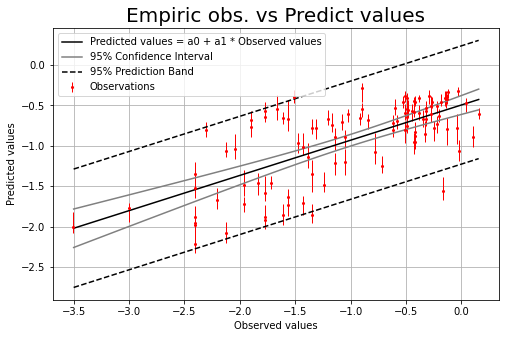

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.314, median - 0.314, CI - [0.29-0.34]

SHAP-values for: contr_g_MAX: mean - 0.058, median - 0.056, CI - [0.043-0.074]

SHAP-values for: g_MAX: mean - 0.053, median - 0.052, CI - [0.041-0.065]

SHAP-values for: mf_chm_MAX: mean - 0.068, median - 0.067, CI - [0.056-0.08]

SHAP-values for: mf_chm_MEAN: mean - 0.139, median - 0.138, CI - [0.12-0.155]



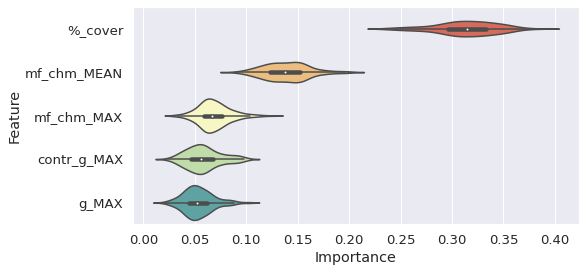

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'contr_g_MAX', 'g_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 129.79, median: 142.5,
 pred. interval (P(0.025)-P(0.975)): 72.875-150.0, 
 conf. interval (p-value=0.95): 102.313-149.273 
***
Aggregate bias statistic: 
 mean: 0.074, median: 0.054,
 pred. interval (P(0.025)-P(0.975)): -0.099-0.286, 
 conf. interval (p-value=0.95): -0.023-0.168 
***
Aggregate RMSE statistic: 
 mean: 0.58, median: 0.58, pred. interval (P(0.025)-P(0.975)): 0.417-0.752, 
 conf. interval (p-value=0.95): 0.494-0.657 
***
Aggregate MSE statistic: 
 mean: 0.344, median: 0.336, pred. interval (P(0.025)-P(0.975)): 0.174-0.566, 
 conf. interval (p-value=0.95): 0.245-0.433 
***
Aggregate R^2 statistic: 
 mean: 0.418, median: 0.44, pred. interval (P(0.025)-P(0.975)): 0.05-0.626, 
 conf. interval (p-value=0.95): 0.303-0.558 
***
Aggregate bias(%) statistic: 
 mean: -6.479, median: -5.759, pred. interval (P(0.025)-P(0.975)): -24.083-11.383, 
 conf. interval (p-value=0.95): -15.

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

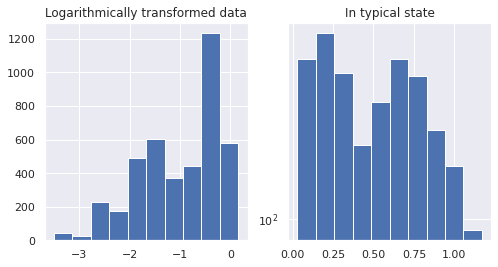

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-3, -2.5, -2, -1.5, -1, -0.5, 0])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.25, 0.5, 0.75, 1])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

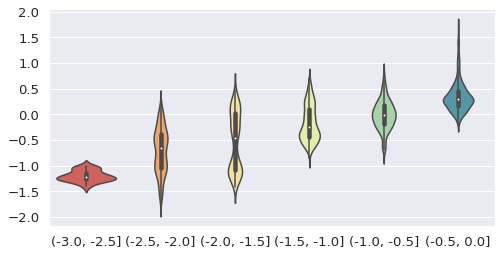

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

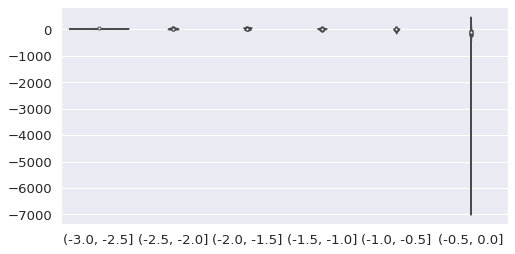

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

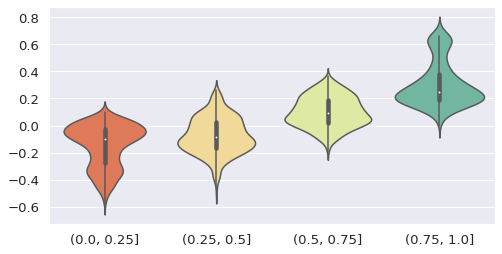

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

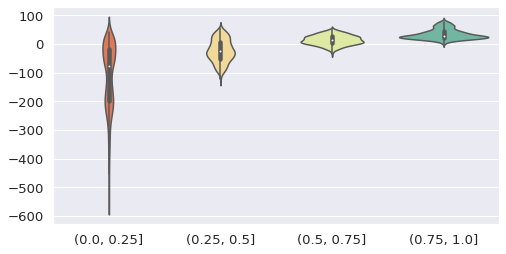

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.67248
[1]	validation_0-rmse:1.63521
[2]	validation_0-rmse:1.60038
[3]	validation_0-rmse:1.56826
[4]	validation_0-rmse:1.53288
[5]	validation_0-rmse:1.50023
[6]	validation_0-rmse:1.46718
[7]	validation_0-rmse:1.43614
[8]	validation_0-rmse:1.40816
[9]	validation_0-rmse:1.38081
[10]	validation_0-rmse:1.35212
[11]	validation_0-rmse:1.32695
[12]	validation_0-rmse:1.30152
[13]	validation_0-rmse:1.27872


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.25540
[15]	validation_0-rmse:1.23247
[16]	validation_0-rmse:1.20836
[17]	validation_0-rmse:1.18646
[18]	validation_0-rmse:1.16279
[19]	validation_0-rmse:1.14072
[20]	validation_0-rmse:1.12040
[21]	validation_0-rmse:1.09441
[22]	validation_0-rmse:1.07527
[23]	validation_0-rmse:1.05532
[24]	validation_0-rmse:1.03909
[25]	validation_0-rmse:1.02318
[26]	validation_0-rmse:1.00485
[27]	validation_0-rmse:0.99004
[28]	validation_0-rmse:0.97195
[29]	validation_0-rmse:0.95491
[30]	validation_0-rmse:0.93677
[31]	validation_0-rmse:0.92247
[32]	validation_0-rmse:0.90705
[33]	validation_0-rmse:0.89066
[34]	validation_0-rmse:0.87557
[35]	validation_0-rmse:0.85877
[36]	validation_0-rmse:0.84395
[37]	validation_0-rmse:0.83423
[38]	validation_0-rmse:0.82081
[39]	validation_0-rmse:0.80882
[40]	validation_0-rmse:0.80011
[41]	validation_0-rmse:0.78960
[42]	validation_0-rmse:0.77769
[43]	validation_0-rmse:0.76509
[44]	validation_0-rmse:0.75244
[45]	validation_0-rmse:0.74167
[46]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 150


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

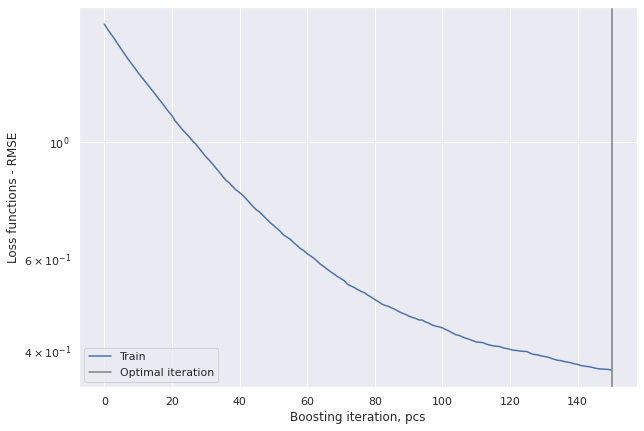

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -4.88
RMSE: 0.4
Relative RMSE(%):  -36.209
MSE: 0.1
R square: 78.6%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.824
Uncertainty
a0: -0.30+/-0.04
a1: 0.657+/-0.030


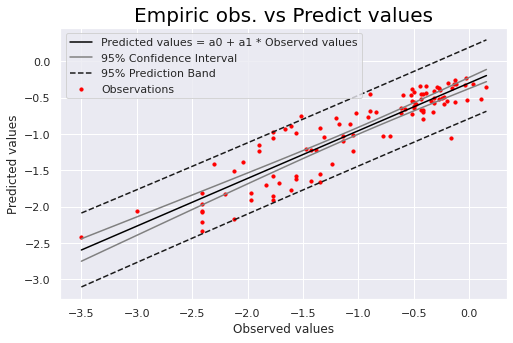

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

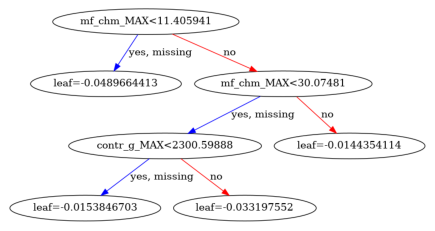

In [46]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

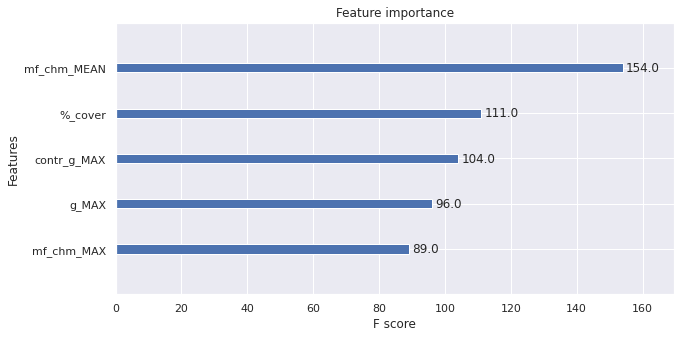

In [48]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

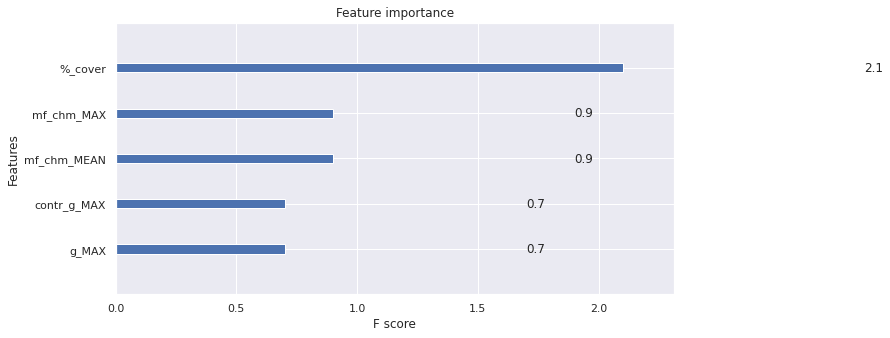

In [49]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

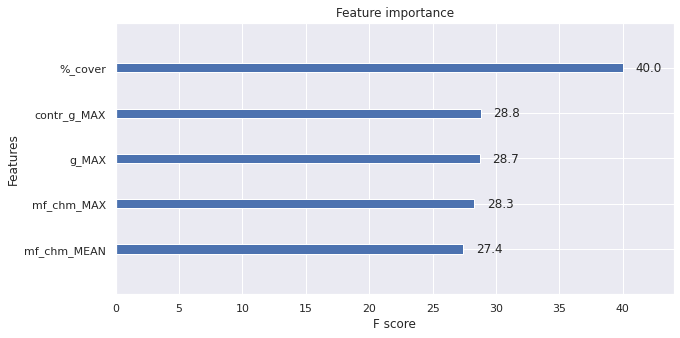

In [50]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [51]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


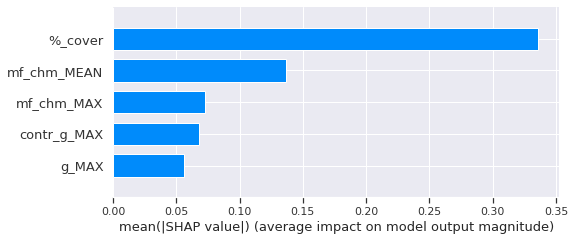

In [52]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

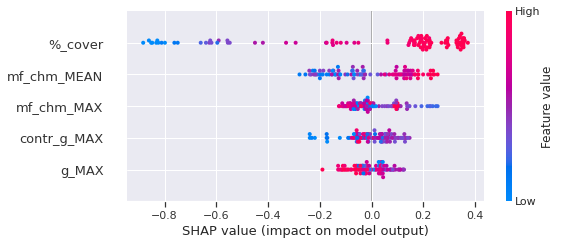

In [53]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

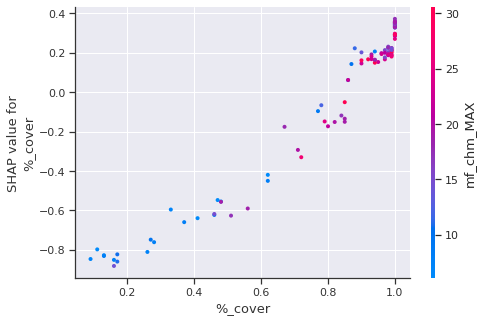

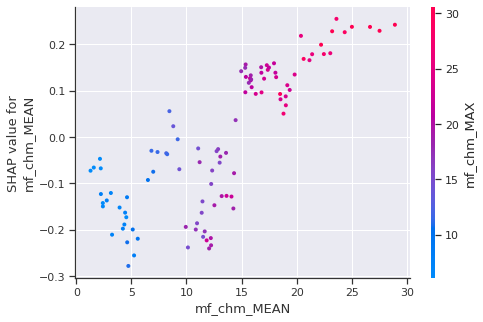

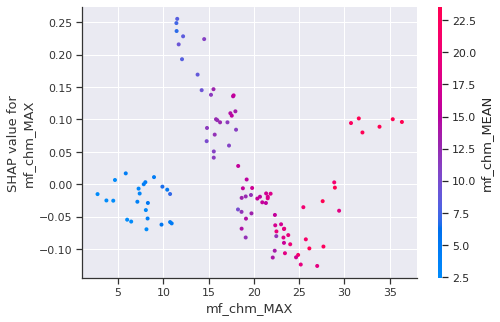

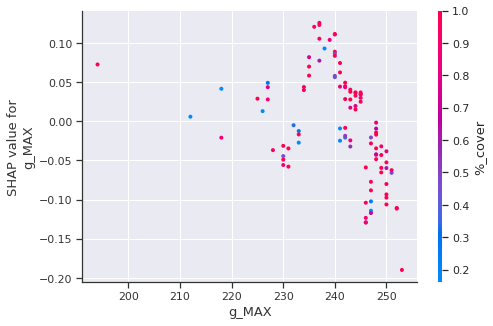

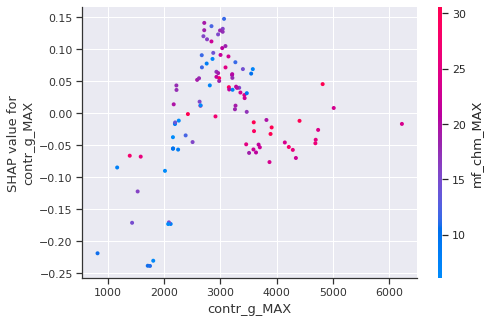

In [54]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [56]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/05_LN_Mfoliage_CHM_with_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/05_LN_Mfoliage_CHM_with_RGB_XGB_model.txt")